In [1]:
from os import listdir
from os.path import isfile, join
from os import environ
import _pickle as pkl
from metadata import Gender
import pandas as pd
from itertools import chain
from _name_classification.nametools import process_str
from _name_classification.classifyname import NC

In [2]:
train_dirpath = join(environ["ARXIV_DIR"], "data.arxiv.io", "data", "cs")
train_files = []
for y in range(1994,2019):
    file_name = join(train_dirpath, str(y) + ".txt")
    train_files.append(file_name)

In [3]:
years_data = []
for file in train_files:
    data = pd.read_csv(file, sep = "\t", header = None, 
                    names = ["id", "categories", "authors", "title", "year", "abstract"])
    years_data.append(data)
df = pd.concat(years_data)        

In [4]:
df

,id,categories,authors,title,year,abstract
0,cmp-lg/9404001,cmp-lg cs.CL,"Schabes, Yves; Shieber, Stuart M.",An Alternative Conception of Tree-Adjoining De...,1994,The precise formulation of derivation for tree...
1,cmp-lg/9404002,cmp-lg cs.CL,"Shieber, Stuart M.",Lessons from a Restricted Turing Test,1994,We report on the recent Loebner prize competit...
2,cmp-lg/9404003,cmp-lg cs.CL,"Shieber, Stuart M.",Restricting the Weak-Generative Capacity of Sy...,1994,The formalism of synchronous tree-adjoining gr...
3,cmp-lg/9404004,cmp-lg cs.CL,"Covington, Michael A.",An Empirically Motivated Reinterpretation of D...,1994,Dependency grammar is usually interpreted as e...
4,cmp-lg/9404005,cmp-lg cs.CL,"Johnson, Mark",Memoization in Constraint Logic Programming,1994,This paper shows how to apply memoization ( ca...
5,cmp-lg/9404006,cmp-lg cs.CL,"CHANDLER-BURNS, R. M.",SPANISH 1992 ( S92 ) : corpus-based analysis o...,1994,S92 research was begun in 1987 to analyze word...
6,cmp-lg/9404007,cmp-lg cs.CL,"Bouma, Gosse; van Noord, Gertjan",Constraint-Based Categorial Grammar,1994,We propose a generalization of Categorial Gram...
7,cmp-lg/9404008,cmp-lg cs.CL,"Shieber, Stuart M.; Schabes, Yves; Pereira, Fe...",Principles and Implementation of Deductive Par...,1994,We present a system for generating parsers bas...
8,cmp-lg/9404009,cmp-lg cs.CL,"Dalrymple, Mary; Lamping, John; Pereira, Ferna...",A Deductive Account of Quantification in LFG,1994,The relationship between Lexical-Functional Gr...
9,cmp-lg/9404010,cmp-lg cs.CL,"Dalrymple, Mary; Lamping, John; Pereira, Ferna...",Intensional Verbs Without Type-Raising or Lexi...,1994,We present an analysis of the semantic interpr...


In [6]:
with open(join(environ['AAN_DIR'], "save", "known_names.pkl"), "rb") as file:
            dicty = pkl.load(file)

In [7]:
dicty

{'Oard, Douglas W.': <Gender.male: 0>,
 'Henderson, James B.': <Gender.male: 0>,
 'Burstein, Jill': <Gender.female: 1>,
 'Wolska, Magdalena': <Gender.female: 1>,
 'Cmejrek, Martin': <Gender.male: 0>,
 'Curin, Jan': <Gender.male: 0>,
 'Havelka, Jiri': <Gender.male: 0>,
 'Bod, Rens': <Gender.male: 0>,
 'Smets, Martine': <Gender.female: 1>,
 'Gamon, Michael': <Gender.male: 0>,
 'Corston-Oliver, Simon H.': <Gender.male: 0>,
 'Ringger, Eric K.': <Gender.male: 0>,
 'Ueffing, Nicola': <Gender.female: 1>,
 'Ney, Hermann': <Gender.male: 0>,
 'Steedman, Mark': <Gender.male: 0>,
 'Osborne, Miles': <Gender.male: 0>,
 'Sarkar, Anoop': <Gender.male: 0>,
 'Clark, Stephen': <Gender.male: 0>,
 'Hwa, Rebecca': <Gender.female: 1>,
 'Hockenmaier, Julia': <Gender.female: 1>,
 'Ruhlen, Paul': <Gender.male: 0>,
 'Baker, Steven': <Gender.male: 0>,
 'Crim, Jeremiah': <Gender.male: 0>,
 'Clark, Alexander': <Gender.male: 0>,
 'Yasuda, Keiji': <Gender.male: 0>,
 'Sugaya, Fumiaki': <Gender.male: 0>,
 'Takezawa, To

In [9]:
all_authors = df["authors"].values

In [10]:
authors = set()
for aths in all_authors:
    split_auths = aths.split("; ")
    authors.update(split_auths)

In [21]:
#known = set()
#known_f = set()
#known_m = set()
unk = set()
for auth in authors:
    auth = auth.strip()
    if auth in known_f or auth in known_m:
        continue
    gender = dicty.get(auth, Gender.unknown)
    if gender == Gender.female:
        known.add(auth)
        known_f.add(auth)
    elif gender == Gender.male:
        gender = Gender.male
        known.add(auth)
        known_m.add(auth)
    else:
        unk.add(auth)

In [22]:
len(unk)

1857

In [25]:
len(authors)

12062

In [17]:
len(known_m)

7828

In [27]:
len(known_m)/len(authors)

0.6489802686121705

In [23]:
unk

{'Hu, Jinghe',
 'Zhang, Shaonan',
 'Bollepalli, Bajibabu',
 'Laxminarayana, M',
 'Jun, Heewoo',
 'Luo, Tianyi',
 'Wu, Huijia',
 'Zhang, Xi',
 'Oez, S.',
 'Callan, Jamie',
 'Mairesse, F.',
 'Rudra, Koustav',
 'Lee, Teng-Yok',
 'Tahirovic, E.',
 'Ruan, Guangchen',
 'Hao, Yu',
 'K, Raja.',
 'Huang, Shujian',
 'Gojenola, K.',
 'Mohapatra, Akrit',
 'Wang, Jinzhao',
 'Bose, Beepa',
 'de Silva, Nisansa',
 'Huang, Sitao',
 'Chenthamarakshan, Vijil',
 'Guo, Jiafeng',
 'Sculley, D.',
 'Bendre, S. M.',
 'Kuo, Hong-Kwang J.',
 'Ngomo, Axel-Cyrille Ngonga',
 'Zhang, Jingyuan',
 'Zhu, Danhao',
 'Ozsoy, Makbule Gulcin',
 'Huang, Po-Sen',
 'Yang, Yinchong',
 'S, Sreelekha',
 'Seo, Seungwan',
 'Zhu, Zhangbin',
 'Lee, Hwaran',
 'Kotowicz, Jean-Philippe',
 'Mitra, Rajarshee',
 'Jiang, Ke',
 'Zhang, Chengqi',
 'Kwon, Keehang',
 'Nielsen, Finn Årup',
 'Gabriel, Raefer',
 'Amine, Chennoufi',
 'Ezeiza, N.',
 'Xu, Huazhe',
 'Joo, Jungseock',
 'Liu, Ao',
 'Bing, Lidong',
 'Barbara',
 'Ziadi, Djelloul',
 'Lin, 

In [13]:
nc = NC()

In [15]:
c_d = dict()
for name in unk:
    g = nc.classify_name(name=name, bing=False)
    print(g)
    g = g[0]
    if g == Gender.female:
        known_f.add(name)
        print(name,g)
    elif g == Gender.male:
        known_m.add(name)

(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Liu, Hongyi found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Gallagher, Heather Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Jurkovitz, Claudine Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Bollepalli, Bajibabu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Leydesdorff, Loet found with GPeters')
(<Gender.female: 1>, ' know it already')
Colleoni, Elanor Gender.female
(<Gender.female: 1>, ' know it already')
Belal, Nahla A. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Oez, S.', ' too short')
(<Gender.unknown: 2>, "Callan, Jamie can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Rudra, Koustav can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Voyatzi, Stavroula Gender.female
(<Gender.female: 1>, ' know it already')
Bear, Helen L. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ying, Mingsheng found with GPeters')
Ying, Mingsheng Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Tahirovic, E.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Castellon, Irene Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Liu, Jin found with GPeters')
Liu, Jin Gender.female
(<Gender.female: 1>, ' know it already'

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "S, Sreelekha can't classify")
(<Gender.male: 0>, 'Yuichi found with gender_machine')
(<Gender.male: 0>, 'Tim found with gender_machine')
(<Gender.female: 1>, 'Ding, Tao found with GPeters')
Ding, Tao Gender.female
(<Gender.male: 0>, 'Peter found with gender_machine')
(<Gender.male: 0>, 'Cédric found with gender_machine')
(<Gender.unknown: 2>, "Mitra, Rajarshee can't classify")
(<Gender.male: 0>, 'Nathan found with gender_machine')
(<Gender.male: 0>, 'Fangyuan found with gPeters')
(<Gender.male: 0>, 'Hong, Joey found with GPeters')
(<Gender.female: 1>, 'Paula found with gender_machine')
Carroll, Paula Gender.female
(<Gender.male: 0>, 'Ahmed found with gender_machine')
(<Gender.male: 0>, 'Yushi found with gender_machine')
(<Gender.male: 0>, 'Alexander found with gender_machine')
(<Gender.female: 1>, 'Voss, Clare R found with GPeters')
Voss, Clare R Gender.female
(<Gender.unknown: 2>, "Kwon, Keehang can't classify")


ERROR:root:'ascii' codec can't encode character '\xc5' in position 36: ordinal not in range(128)


(<Gender.unknown: 2>, "Nielsen, Finn Årup can't classify")
(<Gender.male: 0>, 'Dirk found with gender_machine')
(<Gender.unknown: 2>, "Amine, Chennoufi can't classify")
(<Gender.female: 1>, 'Vicky found with gender_machine')
Zayats, Vicky Gender.female
(<Gender.male: 0>, 'Laurent found with gender_machine')
(<Gender.male: 0>, 'Bob found with gender_machine')
(<Gender.male: 0>, 'Dennis found with gender_machine')
(<Gender.female: 1>, 'Mika Viking found with gPeters')
Mäntylä, Mika Viking Gender.female
(<Gender.male: 0>, 'Fabien found with gender_machine')
(<Gender.male: 0>, 'Timothy found with gender_machine')
(<Gender.male: 0>, 'Andrés found with gender_machine')
(<Gender.male: 0>, 'Julio found with gender_machine')
(<Gender.male: 0>, 'Cristóbal found with gender_machine')
(<Gender.male: 0>, 'Robert found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Bharathi, Prof. H. N.', ' too short')
(<Gender.male: 0>, 'Alex found with gPeters')
(<Gender.unknown: 2>, "Krishnamoorthy, Mukkai can

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Xuguang can't classify")
(<Gender.male: 0>, 'Dinesh Balaji found with gPeters')
(<Gender.male: 0>, 'Minh found with gPeters')
(<Gender.male: 0>, 'Jean-Paul found with gender_machine')
(<Gender.female: 1>, 'Mónica found with gender_machine')
Marrero, Mónica Gender.female
(<Gender.unknown: 2>, "Handleman, Theodore can't classify")
(<Gender.unknown: 2>, "Han, Bohyung can't classify")
(<Gender.unknown: 2>, "Sridhara, Giriprasad can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Liao, Han-Teng can't classify")
(<Gender.male: 0>, 'Ichiro found with gender_machine')
(<Gender.unknown: 2>, "Shen, Yanyao can't classify")
(<Gender.female: 1>, 'Blaauw, Merlijn found with GPeters')
Blaauw, Merlijn Gender.female
(<Gender.male: 0>, 'Yuval found with gender_machine')
(<Gender.female: 1>, 'Leila found with gender_machine')
Arras, Leila Gender.female
(<Gender.male: 0>, 'Alexandre found with gender_machine')
(<Gender.female: 1>, 'Lipika found as in

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Zuwei can't classify")
(<Gender.unknown: 2>, "Ke, Hao-Ren can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jörg found with gender_machine')
(<Gender.male: 0>, 'Dong, Chao found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Anyu found with gPeters')
Zhou, Anyu Gender.female
(<Gender.male: 0>, 'Shizhen found with gPeters')
(<Gender.female: 1>, 'Tan, Ying found with GPeters')
Tan, Ying Gender.female
(<Gender.male: 0>, 'Umut found with gender_machine')
(<Gender.male: 0>, 'Temperley, Davy found with GPeters')
(<Gender.male: 0>, 'Pascal found with gender_machine')
(<Gender.unknown: 2>, "Li, Wentian can't classify")
(<Gender.male: 0>, 'Surendra, Martinus Raditia Sigit found with GPeters')
(<Gender.male: 0>, 'Chen, Wanfeng found with GPeters')
(<Gender.unknown: 2>, ' ', 'Sammak, A. K. Al', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yulun found with gPeters')
(<Gender.unknown: 2>, "

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kassaie, Besat can't classify")
(<Gender.unknown: 2>, "Child, Rewon can't classify")
(<Gender.male: 0>, 'Giovanni found with gender_machine')
(<Gender.male: 0>, 'Seppo found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Li, Xu', ' too short')
(<Gender.male: 0>, 'Carlos found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Su, Yu', ' too short')
(<Gender.female: 1>, 'Ding, Xiao found with GPeters')
Ding, Xiao Gender.female
(<Gender.male: 0>, 'Mihajlo found with gender_machine')
(<Gender.male: 0>, 'Gerard found with gender_machine')
(<Gender.female: 1>, 'Qian, Feng found with GPeters')
Qian, Feng Gender.female
(<Gender.male: 0>, 'Mei, Jie found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Velimir found with gender_machine')
(<Gender.male: 0>, 'Milos found with gPeters')
(<Gender.male: 0>, 'Yukio found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wang, Yujun found with GPeters')
(<Gender.male: 0>

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Zhengyou can't classify")
(<Gender.male: 0>, 'Erkki found with gender_machine')
(<Gender.female: 1>, 'Sara found with gender_machine')
Del Valle, Sara Y. Gender.female
(<Gender.unknown: 2>, "Kang, Jeon-Hyung can't classify")
(<Gender.male: 0>, 'Christian manual')
(<Gender.male: 0>, 'Beauchamp, Nick found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Bracha found with gender_machine')
Shapira, Bracha Gender.female
(<Gender.male: 0>, 'Kevin found with gender_machine')
(<Gender.female: 1>, 'Lara found with gender_machine')
Schmidt, Lara Gender.female
(<Gender.male: 0>, 'Andrij found with gender_machine')
(<Gender.unknown: 2>, "Miao, Yishu can't classify")
(<Gender.male: 0>, 'Toine found with gender_machine')
(<Gender.male: 0>, 'Michael found with gender_machine')
(<Gender.male: 0>, 'Vincent found with gender_machine')
(<Gender.male: 0>, 'Moustafa found with gender_machine')
(<Gender.male: 0>, 'Jianshu found with gPeters')
(<Gende

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zaremoodi, Poorya can't classify")
(<Gender.unknown: 2>, ' ', 'Stone, M.', ' too short')
(<Gender.female: 1>, 'Laik, Ma Nang found with GPeters')
Laik, Ma Nang Gender.female
(<Gender.female: 1>, 'Li, Tong Shu found with GPeters')
Li, Tong Shu Gender.female
(<Gender.male: 0>, 'Paulo found with gender_machine')
(<Gender.male: 0>, 'Patrick found with gender_machine')
(<Gender.female: 1>, ' know it already')
O'Horan, Helen Gender.female
(<Gender.female: 1>, 'Pan, Yan found with GPeters')
Pan, Yan Gender.female
(<Gender.male: 0>, 'Vilas found as indian')
(<Gender.male: 0>, 'Miklos, Balint found with GPeters')
(<Gender.female: 1>, 'Shen, Chia-Hao found with GPeters')
Shen, Chia-Hao Gender.female
(<Gender.male: 0>, 'Xie, Qizhe found with GPeters')
(<Gender.male: 0>, 'Juha found with gender_machine')
(<Gender.female: 1>, 'Loïs found with gPeters')
Rigouste, Loïs Gender.female
(<Gender.male: 0>, 'Xavier found with gender_machine')
(<Gender.female: 1>, 'Zora found with gen

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sinha, Koustuv can't classify")
(<Gender.male: 0>, 'Hadi found with gender_machine')
(<Gender.male: 0>, 'Ingmar found with gender_machine')
(<Gender.male: 0>, 'Shikhar Kumar found with gPeters')
(<Gender.female: 1>, 'Elaine found with gender_machine')
Tsiang, Elaine Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hrishikesh found as indian')
(<Gender.unknown: 2>, "Suárez, Ranyart R. can't classify")
(<Gender.male: 0>, 'Behrouz found with gender_machine')
(<Gender.unknown: 2>, "Zhou, Tianyi can't classify")
(<Gender.male: 0>, 'RK, Vidya Raj found with GPeters')
(<Gender.male: 0>, 'Masashi found with gender_machine')
(<Gender.male: 0>, 'Mustafa found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ding, Yanzhuo can't classify")
(<Gender.male: 0>, 'Jarosław found with gender_machine')
(<Gender.male: 0>, 'Kiros, Ryan found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jatav, Vishaal can't classify")
(<Gender.female: 1>, 'Marina found with gender_machine')
Danilevsky, Marina Gender.female
(<Gender.male: 0>, 'Ron found with gender_machine')
(<Gender.male: 0>, 'Kim, Jungsuk found with GPeters')
(<Gender.male: 0>, 'Wang, Zhe found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Sarma, Kandarpa Kumar can't classify")
(<Gender.male: 0>, 'Andrew found with gender_machine')
(<Gender.male: 0>, 'Good, Benjamin M found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Andrei found with gender_machine')
(<Gender.female: 1>, 'Esther found with gender_machine')
Vlieger, Esther Gender.female
(<Gender.unknown: 2>, "Chu, Zewei can't classify")
(<Gender.female: 1>, 'Mary Priya found with gPeters')
Sebastian, Mary Priya Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Achanta, Sivanand can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Byungsoo can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dai, Haisheng can't classify")
(<Gender.male: 0>, 'Noam found with gPeters')
(<Gender.male: 0>, 'Bagdat found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Sureka, K.', ' too short')
(<Gender.unknown: 2>, "Shimaoka, Sonse can't classify")
(<Gender.male: 0>, 'Kirill found with gender_machine')
(<Gender.male: 0>, 'Gong, Hongyu found with GPeters')
(<Gender.female: 1>, 'Vodrahalli, Kiran found with GPeters')
Vodrahalli, Kiran Gender.female
(<Gender.male: 0>, 'Minsu found with gPeters')
(<Gender.male: 0>, 'Eric found with gender_machine')
(<Gender.male: 0>, 'Huang, Shanshan found with GPeters')
(<Gender.unknown: 2>, ' ', 'Marquez, L.', ' too short')
(<Gender.male: 0>, 'Zhifeng found with gPeters')
(<Gender.female: 1>, 'Shi, Feng found with GPeters')
Shi, Feng Gender.female
(<Gender.male: 0>, 'Jose manual')
(<Gender.male: 0>, 'Arthur found with gender_machine')
(<Gender.male: 0>, 'Pranay found as indian')
(<Gender.unknown: 2>, "Kim, Hyon-Chol can't classify")
(<Ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Haoyu can't classify")
(<Gender.female: 1>, 'Wu, Xuewei found with GPeters')
Wu, Xuewei Gender.female
(<Gender.female: 1>, 'Cynthia found with gender_machine')
Matuszek, Cynthia Gender.female
(<Gender.male: 0>, 'Matías J found with gPeters')
(<Gender.male: 0>, 'Khalil Riad found with gPeters')
(<Gender.male: 0>, 'Zhou, Jie found with GPeters')
(<Gender.male: 0>, 'Vassilis found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Chen, Tao found with GPeters')
Chen, Tao Gender.female
(<Gender.female: 1>, 'Bonnie found with gPeters')
Dorr, Bonnie J. Gender.female
(<Gender.male: 0>, 'Mannor, Shie found with GPeters')
(<Gender.male: 0>, 'Derek found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Webber,, C. L.', ' too short')
(<Gender.male: 0>, 'Gaurav Singh found with gPeters')
(<Gender.unknown: 2>, ' ', 'Xiao, Bo', ' too short')
(<Gender.unknown: 2>, ' ', 'Xiong, W.', ' too short')
(<Gender.unknown: 2>, "Arnold, Taylor can't classif

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huangfu, Luwen can't classify")
(<Gender.unknown: 2>, ' ', 'Riad, A. M.', ' too short')
(<Gender.male: 0>, 'Leon found with gender_machine')
(<Gender.unknown: 2>, "Komiya, Jiyu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tanguy found with gender_machine')
(<Gender.male: 0>, 'Aman found with gender_machine')
(<Gender.female: 1>, 'Daniela found with gender_machine')
Moctezuma, Daniela Gender.female
(<Gender.male: 0>, 'Marcello found with gender_machine')
(<Gender.male: 0>, 'Greg found with gender_machine')
(<Gender.male: 0>, 'Matthew found with gender_machine')
(<Gender.female: 1>, 'Jia, Jinzhu found with GPeters')
Jia, Jinzhu Gender.female
(<Gender.female: 1>, 'Sugata found with gender_machine')
Sanyal, Sugata Gender.female
(<Gender.male: 0>, 'Marc found with gender_machine')
(<Gender.female: 1>, 'Amy manual')
Zhang, Amy X. Gender.female
(<Gender.male: 0>, 'Kidd, Cory found with GPeters')
(<Gender.female: 1>, 'Michelle found with ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Boles, Wageeh can't classify")
(<Gender.male: 0>, 'Sylvain found with gender_machine')
(<Gender.unknown: 2>, "Cheng, Yong can't classify")
(<Gender.unknown: 2>, "Zhang, Shi-Xiong can't classify")
(<Gender.male: 0>, 'Lv, Pin found with GPeters')
(<Gender.female: 1>, 'Malika found with gender_machine')
Aubakirova, Malika Gender.female
(<Gender.female: 1>, 'Natalia found with gender_machine')
Tomashenko, Natalia Gender.female
(<Gender.female: 1>, 'Nazli found with gPeters')
Farajidavar, Nazli Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Hu, Ze', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Despoina found with gender_machine')
Christou, Despoina Gender.female
(<Gender.male: 0>, 'Martin J found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Choe, Changil can't classify")
(<Gender.female: 1>, 'Zhou, Peng found with GPeters')
Zhou, Peng Gender.female
(<Gender.male: 0>, 'Sebas

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sra, Suvrit can't classify")
(<Gender.male: 0>, 'Ankit found with gender_machine')
(<Gender.female: 1>, 'Mara Chinea found with gPeters')
Rios, Mara Chinea Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Bagrow, J. P.', ' too short')
(<Gender.male: 0>, 'Liang, Junwei found with GPeters')
(<Gender.female: 1>, 'Monica found with gender_machine')
Tamariz, Monica Gender.female
(<Gender.unknown: 2>, "Kamisetty, Hetunandan can't classify")
(<Gender.male: 0>, 'Andrej found with gender_machine')
(<Gender.unknown: 2>, "Yan, Erjia can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yih, Wen-tau can't classify")
(<Gender.female: 1>, 'Ochieng, Sidney found with GPeters')
Ochieng, Sidney Gender.female
(<Gender.male: 0>, 'Wolfgang found with gender_machine')
(<Gender.male: 0>, 'Tomas found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhao, Yunxin can't classify")
(<Gender.male: 0>, 'Sanjay found with gender_machine')
(<Gender.male: 0>, 'Mohsen found with gender_machine')
(<Gender.male: 0>, 'Marcelo found with gender_machine')
(<Gender.unknown: 2>, "Taula, Thrivikrama can't classify")
(<Gender.unknown: 2>, "Kim, Taeuk can't classify")
(<Gender.male: 0>, 'Weiyi found with gPeters')
(<Gender.female: 1>, 'Shoko found with gender_machine')
Wakamiya, Shoko Gender.female
(<Gender.male: 0>, 'Akhilesh found as indian')
(<Gender.unknown: 2>, "Buk, Solomija can't classify")
(<Gender.male: 0>, 'Steffen found with gender_machine')
(<Gender.male: 0>, 'Max found with gPeters')
(<Gender.male: 0>, 'Anik found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "AL-Sharuee, Murtadha Talib can't classify")
(<Gender.male: 0>, 'Massimiliano found with gender_machine')
(<Gender.male: 0>, 'Alan found with gender_machine')
(<Gender.male: 0>, 'Blerim found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Sripada, S. G.', ' too short')
(<Gender.female: 1>, 'Hadda found with gender_machine')
Cherroun, Hadda Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Manita, Ghaith can't classify")
(<Gender.male: 0>, 'Pramod Bharadwaj found with gPeters')
(<Gender.male: 0>, 'Kārlis found with gender_machine')
(<Gender.female: 1>, 'Rose found with gender_machine')
Catherine, Rose Gender.female
(<Gender.male: 0>, 'Roman found with gender_machine')
(<Gender.male: 0>, 'Saparov, Abulhair found as Bulgarian')
(<Gender.male: 0>, 'Christoph found with gender_machine')
(<Gender.female: 1>, 'Lisa found with gender_machine')
Lee, Lisa Gender.female
(<Gender.unknown: 2>, "Huang, Chieh-Yang can't classify")
(<Gender.male: 0>, 'Uzzal Kumar found with gPeters')
(<Gender.male: 0>, 'Younès found with gPeters')
(<Gender.unknown: 2>, "Choi, Heeyoul can't classify")
(<Gender.male: 0>, 'Chunyuan found with gPeters')
(<Gender.female: 1>, 'Aldarmaki, Hanan found with GPeters')
Aldarmaki, Hanan Gender.female
(<Gender.male: 0>, 'Michal manual')
(<Gender.female: 1>, ' know it already')
Becue-Bertaut, Monica Gender.female
(<Gender.unknown: 2>, ' ', 'Th

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Linhong can't classify")
(<Gender.female: 1>, 'Janyce found with gender_machine')
Wiebe, Janyce M. Gender.female
(<Gender.male: 0>, 'Hamid Reza found with gPeters')
(<Gender.male: 0>, 'Lu, Jie found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Helge found with gPeters')
(<Gender.male: 0>, 'Wang, Quan found with GPeters')
(<Gender.male: 0>, 'Oriol found with gender_machine')
(<Gender.male: 0>, 'Jonathan found with gender_machine')
(<Gender.male: 0>, 'Larry found with gender_machine')
(<Gender.unknown: 2>, "Wang, Tianlu can't classify")
(<Gender.female: 1>, 'Wenjing found with gPeters')
Ren, Wenjing Gender.female
(<Gender.female: 1>, 'Lucia found with gender_machine')
Lam, Lucia Gender.female
(<Gender.female: 1>, 'Aggeliki found with gPeters')
Dimitromanolaki, Aggeliki Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Deliang can't classify")
(<Gender.male: 0>, 'Dhiren found as indian')
(<Gender.male: 0>, 'Ta-Chung found with gPeters')
(<Gender.unknown: 2>, "Hughes, Macduff can't classify")
(<Gender.male: 0>, 'Cesare found with gender_machine')
(<Gender.male: 0>, 'Richard found with gender_machine')
(<Gender.unknown: 2>, "Su, Tzu-Ray can't classify")
(<Gender.male: 0>, 'Ramin found with gender_machine')
(<Gender.male: 0>, 'Dane found with gender_machine')
(<Gender.female: 1>, ' know it already')
Nastasenko, Marina Gender.female
(<Gender.male: 0>, 'Cao, Bin found with GPeters')
(<Gender.female: 1>, 'Joanna found with gender_machine')
Lowry-Duda, Joanna Gender.female
(<Gender.female: 1>, 'Hacer Ezgi found with gPeters')
Karakaş, Hacer Ezgi Gender.female
(<Gender.female: 1>, 'Isabel found with gender_machine')
Kloumann, Isabel M. Gender.female
(<Gender.unknown: 2>, ' ', 'Reagan, A. J.', ' too short')
(<Gender.male: 0>, 'John found with gender_machine')
(<Gender.female: 1>, 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liang, Yingyu can't classify")
(<Gender.male: 0>, 'Khokhlov, Yuri found as Bulgarian')
(<Gender.male: 0>, 'Shigeto found with gender_machine')
(<Gender.male: 0>, 'Xinwei found with gPeters')
(<Gender.unknown: 2>, "Ramgoolam, Sanjaye can't classify")
(<Gender.male: 0>, 'Petter found with gender_machine')
(<Gender.male: 0>, 'Jeroen found with gender_machine')
(<Gender.female: 1>, 'Keiko Sophie found with gPeters')
Mori, Keiko Sophie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Alec found with gender_machine')
(<Gender.male: 0>, 'Arvind found with gender_machine')
(<Gender.female: 1>, 'Wang, Qixin found with GPeters')
Wang, Qixin Gender.female
(<Gender.male: 0>, 'Mac found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Laros, J. F. J.', ' too short')
(<Gender.unknown: 2>, ' ', 'Ausloos, M.', ' too short')
(<Gender.female: 1>, 'Tatjana found with gender_machine')
Anikina, Tatjana Gender.female
(<Gender.male: 0>, 'Dmitriy found with gend

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kottur, Satwik can't classify")
(<Gender.male: 0>, 'Mohammad Mahmoodi found with gPeters')
(<Gender.male: 0>, 'Martin found with gender_machine')
(<Gender.male: 0>, 'Ramon found with gender_machine')
(<Gender.female: 1>, 'Hélène found with gender_machine')
Pignot, Hélène Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Marcel found with gender_machine')
(<Gender.male: 0>, 'Yella, Sree Harsha found with GPeters')
(<Gender.male: 0>, 'Mike found with gPeters')
(<Gender.male: 0>, 'Qi, Jinwei found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Gao, Haoyuan can't classify")
(<Gender.male: 0>, 'Junpei found with gender_machine')
(<Gender.female: 1>, 'Zahra found with gender_machine')
Ghamchili, Zahra Gender.female
(<Gender.male: 0>, 'Alejandro found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Joshua found with gender_machine')
(<Gender.male: 0>, 'Ivan found with gender_machine')
(<Gender.male: 0>, 'Iulian found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mayeul found with gender_machine')
(<Gender.unknown: 2>, "Hu, Baotian can't classify")
(<Gender.male: 0>, 'Fabricio Olivetti found with gPeters')
(<Gender.male: 0>, 'Niraj found as indian')
(<Gender.female: 1>, 'Fereshte found with gPeters')
Khani, Fereshte Gender.female
(<Gender.male: 0>, 'Yiming found with gPeters')
(<Gender.unknown: 2>, "Yu, Seunghak can't classify")
(<Gender.male: 0>, ' know it alread

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Xiuli can't classify")
(<Gender.unknown: 2>, ' ', 'Rothenberger, T.', ' too short')
(<Gender.unknown: 2>, "Hovy, Eudard can't classify")
(<Gender.unknown: 2>, "Chiu, Tin-Shing can't classify")
(<Gender.male: 0>, 'Stephen found with gender_machine')
(<Gender.unknown: 2>, "Pavalanathan, Umashanthi can't classify")
(<Gender.unknown: 2>, ' ', 'Rumshisky, A.', ' too short')
(<Gender.female: 1>, 'Ingrid found with gender_machine')
van de Leemput, Ingrid Gender.female
(<Gender.unknown: 2>, "Yang, Haojin can't classify")
(<Gender.female: 1>, 'Roberta found with gender_machine')
Sionara, Roberta Gender.female
(<Gender.female: 1>, 'Mariia found with gPeters')
Rubtcova, Mariia V. Gender.female
(<Gender.male: 0>, 'Tony Berber found with gPeters')
(<Gender.male: 0>, 'Chenxi found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Stamatopoulos, P.', ' too short')
(<Gender.male: 0>, 'Flávio found with gender_machine')
(<Gender.male: 0>, 'Py

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, ZiYun can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dong, MeiXing can't classify")
(<Gender.female: 1>, 'Francesca found with gender_machine')
Colaiori, Francesca Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Kehai can't classify")
(<Gender.unknown: 2>, "Dai, Yinpei can't classify")
(<Gender.female: 1>, ' know it already')
Komarova, Natalia Gender.female
(<Gender.male: 0>, 'Mark found with gender_machine')
(<Gender.female: 1>, 'Effi found with gender_machine')
Levi, Effi Gender.female
(<Gender.female: 1>, 'Erin found with gPeters')
Grant, Erin Gender.female
(<Gender.male: 0>, 'Ali, Bilel Ben found with GPeters')
(<Gender.male: 0>, 'Krishnan found with gender_machine')
(<Gender.male: 0>, 'Shen, Wenqi found with GPeters')


ERROR:root:'ascii' codec can't encode character '\xed' in position 40: ordinal not in range(128)


(<Gender.unknown: 2>, "Bustamante, Flora Ramírez can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sanchan, Nattapong can't classify")
(<Gender.male: 0>, 'Sameer found with gender_machine')
(<Gender.unknown: 2>, "Suleman, Kaheer can't classify")
(<Gender.male: 0>, 'Petr found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Kiana Jafari found with gPeters')
Meimandi, Kiana Jafari Gender.female
(<Gender.unknown: 2>, "Wang, Yongkun can't classify")
(<Gender.male: 0>, 'Tanmay found as indian')
(<Gender.female: 1>, 'Marilyn A found with gPeters')
Walker, Marilyn A Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pedro found with gender_machine')
(<Gender.female: 1>, 'Renu found with gender_machine')
Mudgal, Renu Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Kate found with gender_machine')
Bland, Kate Gender.female
(<Gender.male: 0>, 'Kostantinos found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Inigo Ja

ERROR:root:'ascii' codec can't encode character '\xeb' in position 33: ordinal not in range(128)


(<Gender.unknown: 2>, "Claes, Maëlick can't classify")
(<Gender.male: 0>, 'Jiajun found with gPeters')
(<Gender.male: 0>, 'Fethi found with gender_machine')
(<Gender.male: 0>, 'Zhou, Qingyu found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Upadhyay, Prajna can't classify")
(<Gender.male: 0>, 'Amir found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Nair, Surag can't classify")
(<Gender.female: 1>, 'Dawn found with gender_machine')
Chen, Dawn Gender.female
(<Gender.male: 0>, 'Uwe found with gender_machine')
(<Gender.male: 0>, 'Ján found with gender_machine')
(<Gender.female: 1>, 'Dannélls, Dana found with GPeters')
Dannélls, Dana Gender.female
(<Gender.unknown: 2>, ' ', 'Kakusho, K.', ' too short')
(<Gender.male: 0>, 'Panchapagesan, Sankaran found with GPeters')
(<Gender.male: 0>, 'Vinod Kumar found with gPeters')
(<Gender.female: 1>, 'Fleur found with gPeters')
Mougin, Fleur Gender.female
(<Gender.male: 0>, 'Simon found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mathieu found with gender_machine')
(<Gender.male: 0>, 'Choi, Yunho found with GPeters')
(<Gender.male: 0>, 'Tian, Ran found with GPeters')


ERROR:root:'ascii' codec can't encode character '\xe1' in position 41: ordinal not in range(128)


(<Gender.unknown: 2>, "León, Fernando Sánchez can't classify")
(<Gender.female: 1>, 'Teresa found with gender_machine')
Solias, Teresa Gender.female
(<Gender.female: 1>, 'Yin, Jun found with GPeters')
Yin, Jun Gender.female
(<Gender.male: 0>, 'Knut found with gender_machine')
(<Gender.female: 1>, 'Jessica found with gender_machine')
Corona-Cox, Jessica Gender.female
(<Gender.male: 0>, 'Santhosh found with gPeters')
(<Gender.male: 0>, 'Kazuhiro found with gender_machine')
(<Gender.unknown: 2>, "Wiriyathammabhum, Peratham can't classify")
(<Gender.female: 1>, 'Potapova, Rodmonga found as Bulgarian')
Potapova, Rodmonga Gender.female
(<Gender.male: 0>, 'Magnus found with gender_machine')
(<Gender.male: 0>, 'Kenan found with gender_machine')
(<Gender.unknown: 2>, "Balasuriya, Lakshika can't classify")
(<Gender.female: 1>, 'Koh found with gPeters')
Kakusho, Koh Gender.female
(<Gender.male: 0>, 'Jason found with gender_machine')
(<Gender.male: 0>, 'Fadl Mutaher found with gPeters')
(<Gender.m

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Deng, Yuntian can't classify")
(<Gender.female: 1>, 'Jinfeng found with gPeters')
Yi, Jinfeng Gender.female
(<Gender.male: 0>, 'Andros found with gPeters')
(<Gender.female: 1>, 'Emily found with gender_machine')
Collins, Emily C. Gender.female
(<Gender.male: 0>, 'Arjun found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Anselm found with gender_machine')
(<Gender.male: 0>, 'Chen, Yanqing found with GPeters')
(<Gender.unknown: 2>, "Im, Jinbae can't classify")
(<Gender.male: 0>, 'Dan manual')
(<Gender.unknown: 2>, ' ', 'De Oliveira, H. M.', ' too short')
(<Gender.male: 0>, 'Lior found with gender_machine')
(<Gender.male: 0>, 'Philippe found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Georgios found with gender_machine')
(<Gender.male: 0>, 'Michał found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Field, Anjalie can't classify")
(<Gender.male: 0>, 'Oswaldo found with gender_machine')
(<Gender.unknown: 2>, "Fernando, Basura can't classify")
(<Gender.female: 1>, 'Shu, Lei found with GPeters')
Shu, Lei Gender.female
(<Gender.female: 1>, 'Liliya found with gender_machine')
Akhtyamova, Liliya Gender.female
(<Gender.male: 0>, 'Hal found with gender_machine')
(<Gender.male: 0>, 'Hassan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Wu, Lin found with GPeters')
Wu, Lin Gender.female
(<Gender.female: 1>, 'Ming, Yao found with GPeters')
Ming, Yao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Isabella found with gender_machine')
Reger, Isabella Gender.female
(<Gender.female: 1>, 'Madhavi found with gender_machine')
Perera, Madhavi Gender.female
(<Gender.female: 1>, 'Rupali found as indian')
KaPatel, Rupali Gender.female
(<Gender.male: 0>, 'Potard, Blaise found with GPeters')
(<Gender.male: 0>, 'Ei

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Faghri, Fartash can't classify")
(<Gender.male: 0>, 'Bjorn found with gender_machine')
(<Gender.male: 0>, 'Jakob found with gender_machine')
(<Gender.female: 1>, 'Hanna found with gender_machine')
Makaruk, Hanna E. Gender.female
(<Gender.male: 0>, 'Prem found as indian')
(<Gender.male: 0>, 'Gunnar found with gender_machine')
(<Gender.male: 0>, 'Manouchehr found with gender_machine')
(<Gender.male: 0>, 'Dhiraj found as indian')
(<Gender.male: 0>, 'Ajay found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yonatan found with gender_machine')
(<Gender.male: 0>, 'Edward found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Mohammed, N.', ' too short')
(<Gender.male: 0>, 'Natheer found with gPeters')
(<Gender.male: 0>, 'Harshit found as indian')
(<Gender.female: 1>, 'Pozzani, Gabriele found with GPeters')
Pozzani, Gabriele Gender.female
(<Gender.male: 0>, 'Youichi found with gender_machine')
(<G

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Zhaowen can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Raj found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Yongjian can't classify")
(<Gender.unknown: 2>, "Jin, Guan-Tao can't classify")
(<Gender.male: 0>, 'Gerardo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chan, Chee Seng found with GPeters')
(<Gender.male: 0>, 'Ananda Theertha found with gPeters')
(<Gender.male: 0>, 'Olivier found with gender_machine')
(<Gender.male: 0>, 'Igor found with gender_machine')
(<Gender.female: 1>, 'Yu, Tao found with GPeters')
Yu, Tao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bennett found with gender_machine')
(<Gender.male: 0>, 'Guillaume found with gender_machine')
(<Gender.male: 0>, 'Masoud found with gender_machine')
(<Gender.male: 0>, 'Xing, Chao found with GPeters')
(<Gender.male: 0>, 'Tom found with gender_machine')
(<Gender.unknown: 2>, "Zhu, Peiyan can't classify")
(<Gender.male: 0>, 'Samson found with gender_machine')
(<Gender.male: 0>, 'Qin, Kechen found with G

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Guoyin can't classify")
(<Gender.female: 1>, 'Christine found with gender_machine')
Thielen, Christine Gender.female
(<Gender.male: 0>, 'Stepan found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Tianyang can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yamada, Ikuya can't classify")
(<Gender.male: 0>, 'Zhenyu found with gPeters')
(<Gender.male: 0>, 'Wang, Ziyu found with GPeters')
(<Gender.male: 0>, 'Marek found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Jo, Hwiyeol can't classify")
(<Gender.unknown: 2>, "Zhou, Hai-Jun can't classify")
(<Gender.male: 0>, 'Ruxin found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ramakanth found with gPeters')
(<Gender.male: 0>, 'Babu, Korra Sathya found with GPeters')
(<Gender.unknown: 2>, "Lee, Minho can't classify")
(<Gender.female: 1>, 'Ji, Yan found with GPeters')
Ji, Yan Gender.female
(<Gender.male: 0>, 'Alexey found with gender_machine')
(<Gender.male: 0>, 'Li, Fei found with GPeters')
(<Gender.unknown: 2>, "Mo, Kaixiang can't classify")
(<Gender.male: 0>, 'Zhou, Long found with GPeters')
(<Gender.female: 1>, 'Neenu K found with gPeters')
Sasi, Neenu K Gender.female
(<Gender.male: 0>, 'Mijail found with 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Luo, Jiebo can't classify")
(<Gender.male: 0>, 'Griffiths, Sascha found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Julian found with gender_machine')
(<Gender.unknown: 2>, "Yuan, Xingdi can't classify")
(<Gender.female: 1>, 'Marcia found with gender_machine')
Muñoz, Marcia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jean-Pierre found with gender_machine')
(<Gender.male: 0>, 'Sébastien found with gender_machine')
(<Gender.unknown: 2>, "Bedi, Harsimran can't classify")
(<Gender.male: 0>, 'Cao, Xuan Nga found with GPeters')
(<Gender.female: 1>, ' know it already')
Schneider, Stéphane Gender.female
(<Gender.male: 0>, 'Allen found with gender_machine')
(<Gender.female: 1>, 'Janet found with gender_machine')
Sung, Janet Y. Gender.female
(<Gender.unknown: 2>, "Zilly, Julian Georg can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Petar found with gender_machine')
(<Gender.male: 0>, 'Arn

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tan, Zhixing can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Emre found with gender_machine')
(<Gender.male: 0>, 'Ondřej found with gender_machine')
(<Gender.male: 0>, 'Gayo found with gPeters')
(<Gender.unknown: 2>, ' ', 'Robertson, R.', ' too short')
(<Gender.male: 0>, 'Frank, Ray found with GPeters')
(<Gender.unknown: 2>, ' ', 'Deepak, P.', ' too short')
(<Gender.unknown: 2>, "Card, Dallas can't classify")
(<Gender.male: 0>, 'Wang, Yanqing found with GPeters')
(<Gender.female: 1>, ' know it already')
Yong, Esther Gender.female
(<Gender.male: 0>, 'Jia, Ran found with GPeters')
(<Gender.male: 0>, 'Stefanos found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Zaidan, B. B', ' too short')
(<Gender.female: 1>, 'Vanessa found with gender_machine')
Evers, Vanessa Gender.female
(<Gender.male: 0>, 'Constantinos found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Park, Sungjoon can't classify")
(<Gender.female: 1>, 'Lina found with gender_machine')
Rojas-Barahona, Lina M. Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kumar, Parteek can't classify")
(<Gender.male: 0>, 'Francesco found with gender_machine')
(<Gender.female: 1>, 'Santhy found with gPeters')
Viswam, Santhy Gender.female
(<Gender.male: 0>, 'Sergio found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sandesh found with gPeters')
(<Gender.unknown: 2>, ' ', 'Lang, Bo', ' too short')
(<Gender.male: 0>, 'Yves found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Xu, Xinnuo can't classify")
(<Gender.male: 0>, 'Šćepanović, Sanja found with GPeters')
(<Gender.male: 0>, 'Amit found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shlomo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lazaros found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Arenas, A.', ' too short')
(<Gender.male: 0>, 'Lingeman, Jesse M found with GPeters')
(<Gender.male: 

ERROR:root:'ascii' codec can't encode character '\xe9' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Stuchi, José Augusto can't classify")
(<Gender.male: 0>, 'Tharindu found with gPeters')
(<Gender.female: 1>, 'Irina found with gender_machine')
Illina, Irina Gender.female
(<Gender.female: 1>, 'Miao, Yajie found with GPeters')
Miao, Yajie Gender.female
(<Gender.male: 0>, 'Santosh found as indian')
(<Gender.male: 0>, 'Chris found with gPeters')
(<Gender.unknown: 2>, ' ', 'Zhou, Li', ' too short')
(<Gender.male: 0>, 'Viraj found as indian')
(<Gender.unknown: 2>, "Kown, O-Chol can't classify")
(<Gender.unknown: 2>, "Dai, Dengxin can't classify")
(<Gender.unknown: 2>, ' ', 'Benjumea, J.', ' too short')
(<Gender.unknown: 2>, "Huang, Wei-Jie can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Silvestr found with gender_machine')
(<Gender.male: 0>, 'Min, Sewon found with GPeters')
(<Gender.male: 0>, 'Rohan found with gender_machine')
(<Gender.male: 0>, 'Harry found with gender_machine')
(<Gender.male: 0>, 'Mickael found with gender_machine')
(<Ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Chenhao can't classify")
(<Gender.female: 1>, 'Iwona found with gender_machine')
Grabska-Gradzińska, Iwona Gender.female
(<Gender.female: 1>, 'Dai, Lirong found with GPeters')
Dai, Lirong Gender.female
(<Gender.male: 0>, 'Howard found with gender_machine')
(<Gender.female: 1>, 'Eduarda Mendes found with gPeters')
Rodrigues, Eduarda Mendes Gender.female
(<Gender.unknown: 2>, "Hicham, Gueddah can't classify")
(<Gender.unknown: 2>, "Lopes, Alneu de Andrade can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Taehwan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Xiao, Catherine Gender.female
(<Gender.unknown: 2>, "Song, Shuangyong can't classify")
(<Gender.female: 1>, 'Mareike found with gender_machine')
Hartmann, Mareike Gender.female
(<Gender.male: 0>, 'Norbert found with gender_machine')
(<Gender.male: 0>, 'Javier Arias found with gPeters')
(<Gender.female: 1>, 'Wang, Hongmin found with GPeters')
Wang, Hongmin Gender.female
(<Gender.male: 0>, 'Johan found with gender_machine')
(<Gender.unknown: 2>, "Lee, Seungji can't classify")
(<Gender.male: 0>, 'Abhijit found as indian')
(<Gender.male: 0>, 'Serge found with gender_machine')
(<Gender.male: 0>, 'Brou, Konan Marcellin found with GPeters')
(<Gender.female: 1>, 'Raja, S. V. Kasmir found with GPeters')
Raja, S. V. Kasmir Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Harrison, Vrindavan can't classify")
(<Gender.male: 0>, 'Mohamed Ben

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yu, Yanshu can't classify")
(<Gender.male: 0>, 'Raman found as indian')
(<Gender.female: 1>, 'Olga found with gender_machine')
Gureenkova, Olga Gender.female
(<Gender.male: 0>, 'Neil found with gender_machine')
(<Gender.male: 0>, 'Alexandros found with gender_machine')
(<Gender.male: 0>, 'Cuong Xuan found with gPeters')
(<Gender.female: 1>, 'Frédérique found with gender_machine')
Segond, Frédérique Gender.female
(<Gender.unknown: 2>, "Choi, Jeung-Yoon can't classify")
(<Gender.female: 1>, ' know it already')
Wallach, Hanna Gender.female
(<Gender.female: 1>, 'Wang, Yu-Hsuan found with GPeters')
Wang, Yu-Hsuan Gender.female
(<Gender.male: 0>, 'Nils found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chen, Wei-Fan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wong found with gPeters')
(<Gender.male: 0>, 'Ye, Zheng found with GPeters')
(<Gender.male: 0>, 'Mathew found with gender_machine')
(<Gender.

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Peidong can't classify")
(<Gender.unknown: 2>, "Luan, Huanbo can't classify")
(<Gender.male: 0>, 'Paramveer found with gPeters')
(<Gender.male: 0>, 'Gus found with gender_machine')
(<Gender.male: 0>, 'Serguei found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nataliya found with gender_machine')
Sokolovska, Nataliya Gender.female
(<Gender.unknown: 2>, "Kumar, Vishwajeet can't classify")
(<Gender.female: 1>, 'Maria Cristina Ferreira found with gPeters')
de Oliveira, Maria Cristina Ferreira Gender.female
(<Gender.male: 0>, 'Ahmad found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Sanda found with gender_machine')
Martinčić-Ipšić, Sanda Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chaudhary, Anshit can't classify")
(<Gender.female: 1>, 'Valérie found with gender_machine')
Delavigne, Valérie Gender.female
(<Gender.mal

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Jingzhou can't classify")
(<Gender.male: 0>, 'Xuan, Junyu found with GPeters')
(<Gender.unknown: 2>, "Shi, Xingjian can't classify")
(<Gender.female: 1>, 'Wang, Peng found with GPeters')
Wang, Peng Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gérard found with gender_machine')
(<Gender.female: 1>, 'Ye, Yajie found with GPeters')
Ye, Yajie Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chowdhury, Soumyadeb can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jacob found with gender_machine')
(<Gender.male: 0>, 'Alberto found with gender_machine')
(<Gender.male: 0>, 'Guy found with gender_machine')
(<Gender.unknown: 2>, "Singh, Mittul can't classify")
(<Gender.female: 1>, 'Maribel found with gender_machine')
Acosta, Maribel Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mukherjee, Subhabrata can't classify")
(<Gender.male: 0>, 'Paliouras, George found with GPeters')
(<Gender.unknown: 2>, "Goutham, Kushwanth N. can't classify")
(<Gender.female: 1>, 'Zheng, Kai found with GPeters')
Zheng, Kai Gender.female
(<Gender.unknown: 2>, ' ', 'Rajendran, S.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dufour-Lussier, Valmi can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Anand, Avishek can't classify")
(<Gender.male: 0>, 'Hartmann, Nathan Siegle found with GPeters')
(<Gender.unknown: 2>, "Sun, Chonglin can't classify")
(<Gender.male: 0>, 'Adrian manual')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jesus manual')
(<Gender.male: 0>, 'Kamil found with gender_machine')
(<Gender.unknown: 2>, "Shah, Pararth can't classify")
(<Gender.female: 1>, 'Md Johirul found with gPeters')
Islam, Md Johirul Gender.female
(<Gender.male: 0>, 'Bhaskar found with gender_machine')
(<Gender.male: 0>, 'Huang, Zhen found with GPeters')
(<Gender.unknown: 2>, "Nidhi, Vagisha can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Lee, Myungin can't classify")
(<Gender.female: 1>, 'Simone found with gPeters')
Ponzetto, Simone P. Gender.female
(<Gender.male: 0>, 'Eita found with gPeters')
(<Gender.male: 0>, 'Saeed Shiry found with gPeters')
(<Gender.unknown: 2>, ' ', 'Walter, K.', ' t

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Che-Wei can't classify")
(<Gender.unknown: 2>, ' ', 'Chenfour, N.', ' too short')
(<Gender.unknown: 2>, "Liu, Hairong can't classify")
(<Gender.female: 1>, 'Lieber, Jean found with GPeters')
Lieber, Jean Gender.female
(<Gender.female: 1>, 'Qiyue found with gPeters')
Yin, Qiyue Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Jinyun found with gPeters')
KE, Jinyun Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yehoshua found with gender_machine')
(<Gender.female: 1>, 'Javiera found with gender_machine')
Born, Javiera Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Licia found with gender_machine')
Capra, Licia Gender.female
(<Gender.male: 0>, 'Xie, Xing found with GPeters')
(<Gender.male: 0>, 'Bryan found with gender_machine')
(<Gender.female: 1>, 'Mrinal found with gender_machine')
Das, Mrinal Gender.female
(<Gender.female: 1>, ' know it already')
Webber, Bonnie Gender.female
(<

ERROR:root:'ascii' codec can't encode character '\xe9' in position 35: ordinal not in range(128)


(<Gender.unknown: 2>, "Brakel, Philémon can't classify")
(<Gender.unknown: 2>, ' ', 'He, Yi', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ashutosh found with gender_machine')
(<Gender.male: 0>, 'Mario found with gender_machine')
(<Gender.unknown: 2>, "Popescul, Alexandrin can't classify")
(<Gender.male: 0>, 'Rupesh found as indian')
(<Gender.male: 0>, 'Pierre found with gender_machine')
(<Gender.male: 0>, 'Dahl, George E. found with GPeters')
(<Gender.female: 1>, 'Elisenda found with gender_machine')
Ortiz, Elisenda Gender.female
(<Gender.unknown: 2>, "Sarkar, Koushiki can't classify")
(<Gender.female: 1>, 'Dieuwke found with gender_machine')
Hupkes, Dieuwke Gender.female
(<Gender.male: 0>, 'Konstantinos found with gender_machine')
(<Gender.unknown: 2>, "Huang, Yi-Yao can't classify")
(<Gender.male: 0>, 'Oleg found with gender_machine')
(<Gender.male: 0>, 'Lawrence found with gender_machine')
(<Gender.unknown: 2>, "Benjumea, Juan can't classify")
(<Gender.m

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Zhaocheng can't classify")
(<Gender.female: 1>, 'Corinne found with gender_machine')
Jones, Corinne L. Gender.female
(<Gender.male: 0>, 'Daan found with gender_machine')
(<Gender.unknown: 2>, "Rahman, Md. Mijanur can't classify")
(<Gender.male: 0>, 'Vahid found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Maria Chiara found with gPeters')
Caschera, Maria Chiara Gender.female
(<Gender.male: 0>, 'Xiaocheng found with gPeters')
(<Gender.male: 0>, 'Takanori found with gender_machine')
(<Gender.unknown: 2>, "Yi, Zibo can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'El-Shishtawy, T.', ' too short')
(<Gender.unknown: 2>, "Bhuiyan, Mansurul can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Konstantin found with gender_machine')
(<Gender.female: 1>, 'Chen, Lijiang found with GPeters')
Chen, Lijiang Gender.female
(<Gender.male: 0>, 'Muhammad found with gender_machine')
(

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Zhuoran can't classify")
(<Gender.unknown: 2>, ' ', 'Yi, Li', ' too short')
(<Gender.male: 0>, 'Rustem found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Ji, Shuiwang can't classify")
(<Gender.female: 1>, 'Wang, Yunhong found with GPeters')
Wang, Yunhong Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Laura found with gender_machine')
Benitez, Laura Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Siamak found with gPeters')
(<Gender.male: 0>, 'He, Xuming found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Qingfu can't classify")
(<Gender.unknown: 2>, ' ', 'Borge, J.', ' too short')
(<Gender.female: 1>, 'Elizabeth found with gender_machine')
Sklar, Elizabeth Gender.female
(<Gender.female: 1>, 'Camille found with gPeters')
Pradel, Camille Gender.female
(<Gender.male: 0>, 'Justin found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Zanon-Boito, M.', ' too short')
(<Gender.male: 0>, 'Altay found with gender_machine')
(<Gender.unknown: 2>, "Cao, Shaozu can't classify")
(<Gender.female: 1>, 'Ornat, S. Lopez found with GPeters')
Ornat, S. Lopez Gender.female
(<Gender.male: 0>, 'Deepak manual')
(<Gender.unknown: 2>, ' ', 'Chen, Xu', ' too short')
(<Gender.male: 0>, 'Hongzhi found with gPeters')
(<Gender.male: 0>, 'Mojtaba found with gender_machine')
(<Gender.female: 1>, 'Lu, Yao found with GPeters')
Lu, Yao Gender.female
(<Gender.male: 0>, 'Mao, Weiguang found with GPeters')
(<Gender.male: 0>, 'Lehal, Gurpreet Singh found with GPeters')
(<Gender.male: 0>, ' know i

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Ruqing can't classify")
(<Gender.male: 0>, 'Shiuan, Peh Li found with GPeters')
(<Gender.male: 0>, 'Mohamed found with gender_machine')
(<Gender.male: 0>, 'Güngör, Tunga found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Andréa Carneiro found with gPeters')
Linhares, Andréa Carneiro Gender.female
(<Gender.male: 0>, 'Denis found with gender_machine')
(<Gender.unknown: 2>, "Yoo, Hwiyeon can't classify")
(<Gender.male: 0>, 'Savchenko, George found with GPeters')
(<Gender.female: 1>, 'Yuan-Fang found with gPeters')
Wang, Yuan-Fang Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yan, Weipeng P. can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Belyaeva, Jenya found with GPeters')
Belyaeva, Jenya Gender.female
(<Gender.female: 1>, 'Karen found with gPeters')
Payne, Karen Gender.female
(<Gender.male: 0>, 'Mohammad, Saif M found with GPeters')
(<Gender.male: 0>, 'Serban, Iulian Vlad found with GPeters')
(<Gender.unknown: 2>, "Pradhan, Sabeek can't classify")
(<Gender.female: 1>, 'Megha found with gender_machine')
Rughani, Megha Gender.female
(<Gender.male: 0>, 'Diego found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, DeLiang can't classify")
(<Gender.male: 0>, 'Dieter found with gender_machine')
(<Gender.male: 0>, 'Zhang, Zixing found with GPeters')
(<Gender.male: 0>, 'Fitsum found with gPeters')
(<Gender.female: 1>, 'Rebecca found with gender_machine')
Wright, Rebecca N. Gender.female
(<Gender.female: 1>, ' know it already')
Mays, Kate K. Gender.female
(<Gender.unknown: 2>, "Huo, Zhao can't classify")
(<Gender.female: 1>, 'Shruti found with gender_machine')
Palaskar, Shruti Gender.female
(<Gender.female: 1>, ' know it already')
Ikizler-Cinbis, Nazli Gender.female
(<Gender.unknown: 2>, "Zhang, Xingxing can't classify")
(<Gender.unknown: 2>, ' ', 'Deng, W. B.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Su, Jiang found with GPeters')
Su, Jiang Gender.female
(<Gender.male: 0>, 'Lu, Shuai found with GPeters')
(<Gender.male: 0>, 'Sikandar found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Li, Tianyu found with GPet

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Yanpeng can't classify")
(<Gender.male: 0>, 'Nicolai found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Montse found with gender_machine')
Civit, Montse Gender.female
(<Gender.unknown: 2>, "R, Kanagavalli V can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Manuel found with gender_machine')
(<Gender.male: 0>, 'Jia, Robin found with GPeters')
(<Gender.male: 0>, 'Mortaza found with gPeters')
(<Gender.male: 0>, 'Ayman found with gender_machine')
(<Gender.female: 1>, 'Rikta found with gPeters')
Sen, Rikta Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Josh found with gender_machine')
(<Gender.unknown: 2>, "Ding, Weicong can't classify")
(<Gender.male: 0>, 'Stefano found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tomáš found with gender_machine')
(<Gender.male: 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sadi, A. B. M. Shamsuzzaman can't classify")
(<Gender.unknown: 2>, "Ellouze, Nouerddine can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hassan, Naeemul can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Jiannan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Diane found with gender_machine')
Litman, Diane Gender.female
(<Gender.female: 1>, 'Sukriti found as indian')
Verma, Sukriti Gender.female
(<Gender.male: 0>, 'Santanu Kumar found with gPeters')
(<Gender.male: 0>, 'Chuan found with gPeters')
(<Gender.unknown: 2>, "Liu, Peilei can't classify")
(<Gender.male: 0>, 'Timothy Andrew found with gPeters')
(<Gender.female: 1>, 'Helena found with gender_machine')
Galhardas, Helena Gender.female


ERROR:root:'ascii' codec can't encode character '\xe2' in position 37: ordinal not in range(128)


(<Gender.unknown: 2>, "Dinh, Erik-Lân Do can't classify")
(<Gender.female: 1>, ' know it already')
Lefevre, Alexandra Gender.female
(<Gender.male: 0>, 'Fergus found with gender_machine')
(<Gender.male: 0>, 'Ilija found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Weinan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zhang, Aiqi can't classify")
(<Gender.male: 0>, 'Stefanov, Kalin found as Bulgarian')
(<Gender.unknown: 2>, ' ', 'Castano, J.', ' too short')
(<Gender.male: 0>, 'Ossama found with gender_machine')
(<Gender.male: 0>, 'Peyman found with gender_machine')
(<Gender.female: 1>, 'Li, Yimeng found with GPeters')
Li, Yimeng Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Weichao can't classify")
(<Gender.male: 0>, 'Zhenguo found with gPeters')
(<Gender.male: 0>, 'Shailesh found as indian')
(<Gender.female: 1>, ' know it already')
Nsoesie, Elaine O. Gender.female
(<Gender.female: 1>, 'Mariam found with gender_machine')
Adedoyin-Olowe, Mariam Gender.female
(<Gender.male: 0>, 'Onur found with gender_machine')
(<Gender.male: 0>, 'Mykola found with gender_machine')
(<Gender.male: 0>, 'Hyeong In found with gPeters')
(<Gender.male: 0>, 'Jacopo found with gender_machine')
(<Gender.female: 1>, 'Sperança-Criscuolo, Ana Carolina found with GPeters')
Sperança-Criscuolo, Ana Carolina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Ghalandari, Demian Gholipour can't classify")
(<Gender.female: 1>, 'Yun-Hsuan found with gPeters')
Sung, Yun-hsuan Gender.female
(<Gender.male: 0>, 'Nicolas found with gender_machine')
(<Gender.male: 0>, 'Giordano found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ahn, Sungjin can't classify")
(<Gender.male: 0>, 'Maciej found with gender_machine')
(<Gender.female: 1>, 'Centre, Rank Xerox Research found with GPeters')
Centre, Rank Xerox Research Gender.female
(<Gender.male: 0>, 'Claudio Delli found with gPeters')
(<Gender.unknown: 2>, ' ', 'Orphanos, G.', ' too short')
(<Gender.male: 0>, 'Rámon found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Radha found with gender_machine')
Chitta, Radha Gender.female
(<Gender.male: 0>, 'Tamim found with gender_machine')
(<Gender.female: 1>, 'Michela found with gender_machine')
Fazzolari, Michela Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Modaresi, Pashutan can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Kejun can't classify")
(<Gender.male: 0>, 'Andrew J found with gPeters')
(<Gender.unknown: 2>, "Hijawi, Wadi' can't classify")
(<Gender.male: 0>, 'Bernt found with gender_machine')
(<Gender.unknown: 2>, "Jayawardana, Vindula can't classify")
(<Gender.male: 0>, 'Jon found with gender_machine')
(<Gender.male: 0>, 'Maurice found with gender_machine')
(<Gender.male: 0>, 'Vivek found with gender_machine')
(<Gender.male: 0>, 'Sungho found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Fahimeh found with gPeters')
Bahmaninezhad, Fahimeh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Miikka found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhao, Jialiang can't classify")
(<Gender.unknown: 2>, "Chintala, Soumith can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "He, Xuanli can't classify")
(<Gender.female: 1>, 'Lina  Rojas found with gPeters')
Barahona, Lina M. Rojas Gender.female
(<Gender.male: 0>, 'Subham found with gPeters')
(<Gender.male: 0>, 'Nishal Pradeepkumar found with gPeters')
(<Gender.unknown: 2>, "Lai, Jianhuang can't classify")
(<Gender.female: 1>, 'Warmsley, Dana found with GPeters')
Warmsley, Dana Gender.female
(<Gender.male: 0>, 'Fabrício found with gPeters')
(<Gender.female: 1>, 'Renan found with gender_machine')
Souza, Renan Gender.female
(<Gender.female: 1>, 'Margherita found with gender_machine')
Zorzi, Margherita Gender.female
(<Gender.male: 0>, 'Qiang found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Haufler, Amy Gender.female
(<Gender.female: 1>, 'Marie found with gPeters')
Barking, Marie Gender.female
(<Gender.male: 0>, 'Geng, Yuanli found with GPeters')
(<Gender.unknown: 2>, "Li, Bofang can't classify")
(<Gender.unknown: 2>, ' ', 'Coccaro, N.', 

ERROR:root:could not convert string to float: '7,290.000'
ERROR:root:could not convert string to float: '7,290.000'


(<Gender.unknown: 2>, "Li, Yuanxi can't classify")
(<Gender.male: 0>, 'Zhihao found with gPeters')
(<Gender.male: 0>, 'Lu, Qian found with GPeters')
(<Gender.male: 0>, 'Iñigo found with gPeters')
(<Gender.male: 0>, 'Mehul found as indian')
(<Gender.male: 0>, 'Pim found with gender_machine')
(<Gender.male: 0>, 'Franck found with gender_machine')
(<Gender.male: 0>, 'Du, Jiayu found with GPeters')
(<Gender.male: 0>, 'Chau, Duen Horng "Polo" found with GPeters')
(<Gender.male: 0>, 'Payam found with gender_machine')
(<Gender.male: 0>, 'Kazuya found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Magali Sanches found with gPeters')
Duran, Magali Sanches Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Phan, Xuan Hieu found with GPeters')
(<Gender.male: 0>, 'Donald found with gender_machine')
(<Gender.male: 0>, 'Andre found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kang, Yongguo can't classify")
(<Gender.male: 0>, 'Maurizio found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Seo, Minjoon can't classify")
(<Gender.unknown: 2>, "Huang, Liang-Kang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Filippos found with gender_machine')
(<Gender.male: 0>, 'Maxime found with gPeters')
(<Gender.unknown: 2>, "Nguyen, Tuan-Anh can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vladimir found with gender_machine')
(<Gender.male: 0>, 'Guillermo found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhao, Haizhou can't classify")
(<Gender.male: 0>, 'Zhu, Xiaoning found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Klaus found with gender_machine')
(<Gender.male: 0>, 'Anuj found as indian')
(<Gender.male: 0>, 'Adam found with gender_machine')
(<Gender.female: 1>, 'Rudraneel found with gPeters')
Chakraboty, Rudraneel Gender.female
(<Gender.female: 1>, 'Imène found with gPeters')
Guellil, Imène Gender.female
(<Gender.male: 0>, 'Wang, Song found with GPeters')
(<Gender.unknown: 2>, ' ', 'Sarasola, K.', ' too short')
(<Gender.male: 0>, 'Duan, Lixin found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gordon found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Zhongliang can't classify")
(<Gender.unknown: 2>, "Chen, Chien-Ying can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Naoya found with gender_machine')
(<Gender.unknown: 2>, "Chen, Yang-De can't classify")
(<Gender.male: 0>, 'Giuseppe found with gender_machine')
(<Gender.male: 0>, 'Prajit found as indian')
(<Gender.female: 1>, 'Émeline found with gPeters')
Lecuit, Émeline Gender.female
(<Gender.female: 1>, 'Ning found with gPeters')
Chen, Ning Gender.female
(<Gender.female: 1>, 'Delia Irazú Hernández found with gPeters')
Farías, Delia Irazú Hernández Gender.female
(<Gender.male: 0>, 'Zhong, Teng found with GPeters')
(<Gender.female: 1>, 'Beth found with gender_machine')
Millar, Beth Gender.female
(<Gender.unknown: 2>, ' ', 'Taboada, J.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nematzadeh, Azadeh found with GPeters')
Nematzadeh, Azadeh Gender.female
(<Gender.mal

ERROR:root:could not convert string to float: '18,972.500'
ERROR:root:could not convert string to float: '18,972.500'


(<Gender.unknown: 2>, "Bulat, Luana can't classify")
(<Gender.male: 0>, 'Sinnathamby found with gender_machine')
(<Gender.female: 1>, 'Mihaiela found with gender_machine')
Lupea, Mihaiela Gender.female
(<Gender.male: 0>, 'Jean-Gabriel found with gPeters')
(<Gender.male: 0>, 'Frederick found with gender_machine')
(<Gender.unknown: 2>, "Jubayer, Fazla Elahi Md can't classify")
(<Gender.unknown: 2>, ' ', 'Sun, Yu', ' too short')
(<Gender.female: 1>, 'Rawlins, Kyle found with GPeters')
Rawlins, Kyle Gender.female
(<Gender.male: 0>, 'Jiaming found with gPeters')
(<Gender.male: 0>, 'Omid found with gPeters')
(<Gender.male: 0>, 'Joydeep found with gPeters')
(<Gender.male: 0>, 'Gonçalo found with gender_machine')
(<Gender.male: 0>, 'Murathan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Xiang, Luojie can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yuan, Yuxin found with GPeters')
(<Gender.male: 0>, 'Michalis found with gen

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chan, GuangYong Leonard can't classify")
(<Gender.female: 1>, 'Mallidi, Sri Harish found with GPeters')
Mallidi, Sri Harish Gender.female
(<Gender.female: 1>, 'Rao, Anyi found with GPeters')
Rao, Anyi Gender.female
(<Gender.female: 1>, 'Zhang, Zhiqi found with GPeters')
Zhang, Zhiqi Gender.female
(<Gender.unknown: 2>, ' ', 'Padro, L.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Angela found with gender_machine')
Lin, Angela Gender.female
(<Gender.male: 0>, 'Jesper found with gender_machine')
(<Gender.female: 1>, 'Gorman, Kyle found with GPeters')
Gorman, Kyle Gender.female
(<Gender.male: 0>, 'Jaroslav found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Frank found with gender_machine')
(<Gender.male: 0>, 'Rajveer found with gPeters')
(<Gender.male: 0>, 'Nguyen, Vu Dung found with GPeters')
(<Gender.male: 0>, 'Christopher E found with gPeters')
(<Gender.female: 1>, 'Jocelyn found with gender_machin

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Zeyu can't classify")
(<Gender.male: 0>, 'Akira found with gPeters')
(<Gender.unknown: 2>, "Bo, Liefeng can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Morales, Gianmarco De Francisci can't classify")
(<Gender.male: 0>, 'Jiliang found with gPeters')
(<Gender.male: 0>, 'Ondrej found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Rialland, A.', ' too short')
(<Gender.male: 0>, 'Semih found with gender_machine')
(<Gender.male: 0>, 'Sriraman found with gPeters')
(<Gender.female: 1>, ' know it already')
Sun, Ruoyu Gender.female
(<Gender.female: 1>, 'Nabiha found with gender_machine')
Asghar, Nabiha Gender.female
(<Gender.male: 0>, 'Yury found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Ferrero, J.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Czesław found with gender_machine')
(<Gender.male: 0>, 'Wu, Yen-Chen found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Ananthapadmanabha, T. V.', ' too short')
(<Gender.male: 0>, 'Ni, Jian found with GPeters')
(<Gender.male: 0>, 'Huang, Chin-Wei found with GPeters')

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yan, Xinru can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Cecchini, Flavio Massimiliano found with GPeters')
(<Gender.male: 0>, 'Ma, Hao found with GPeters')
(<Gender.male: 0>, 'R., Sai Krishna found with GPeters')
(<Gender.female: 1>, 'Gabrielle found with gender_machine')
Turner-McGrievy, Gabrielle Gender.female
(<Gender.male: 0>, 'Abdulaziz found with gPeters')
(<Gender.male: 0>, 'Cheol Jung found with gPeters')
(<Gender.male: 0>, 'Mahesh found with gender_machine')
(<Gender.female: 1>, 'Shuming found with gPeters')
Ma, Shuming Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chien, Tran Xuan found with GPeters')
(<Gender.male: 0>, 'Tomaž found with gender_machine')
(<Gender.unknown: 2>, "Hu, Zhiting can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zeng, Xiangyu found with GPeters')
(<Gender.female: 1>, 'Clara manual')
Vania, Clara Gender.female
(<Gender.male: 0>, 'Jianwei found wi

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kolchinsky, Artemy can't classify")
(<Gender.female: 1>, 'Aditi found with gender_machine')
Aggarwal, Aditi Gender.female
(<Gender.male: 0>, 'Ronald found with gender_machine')
(<Gender.male: 0>, 'Matthias found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Wen, Ji', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rafiqul found with gPeters')
(<Gender.male: 0>, 'Yoshihisa found with gender_machine')
(<Gender.male: 0>, 'Johannes found with gender_machine')
(<Gender.female: 1>, 'Yeran found with gPeters')
Li, Yeran Gender.female
(<Gender.male: 0>, 'Héctor found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Srini found with gender_machine')
(<Gender.female: 1>, 'Kulkarni, Amba P found with GPeters')
Kulkarni, Amba P Gender.female
(<Gender.male: 0>, 'Hoey, Jesse found with GPeters')
(<Gender.male: 0>, 'Cédrick found with gender_machine')
(<Gender.male: 0>, 'Phil fou

ERROR:root:'ascii' codec can't encode character '\xe9' in position 40: ordinal not in range(128)


(<Gender.unknown: 2>, "Kaffee, Lucie-Aimée can't classify")
(<Gender.male: 0>, 'Winarko, Edi found with GPeters')
(<Gender.male: 0>, 'Xiong, Kun found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mihir found as indian')
(<Gender.unknown: 2>, "Chandramohan, Mahinthan can't classify")
(<Gender.female: 1>, 'Nicole found with gender_machine')
Beckage, Nicole M. Gender.female
(<Gender.male: 0>, 'Theofanis found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Tang, Bo', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Agrawal, Kumar Krishna found with GPeters')
Agrawal, Kumar Krishna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Piotr found with gender_machine')
(<Gender.female: 1>, 'Reshma found with gender_machine')
Prasad, Reshma Gender.female
(<Gender.female: 1>, 'Wu, Zhizheng found with GPeters')
Wu, Zhizheng Gender.female
(<Gender.unknown: 2>, ' ', 'Sun, Ni', ' too short')
(<Gender.male: 0>, ' know it a

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Guoguo can't classify")
(<Gender.male: 0>, 'Muhammad Mahbubur found with gPeters')
(<Gender.male: 0>, 'Tian, Yingli found with GPeters')
(<Gender.unknown: 2>, "Tan, Ruiyang can't classify")
(<Gender.male: 0>, 'Heinrich found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Juliang can't classify")
(<Gender.female: 1>, 'Du, Xinya found with GPeters')
Du, Xinya Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Seide, F.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ackerman, Robin found with GPeters')
(<Gender.unknown: 2>, "Zhao, Shenjian can't classify")
(<Gender.female: 1>, 'Dorota found with gender_machine')
Lipowska, Dorota Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mao, Huina can't classify")
(<Gender.male: 0>, 'Mohammed Alaeddine found with gPeters')
(<Gender.male: 0>, 'Huang, Yi Yao found with GPeters')
(<Gender.female: 1>, ' know it already')
Kirina-Lilinskaya, Elizabeth Gender.female
(<Gender.male: 0>, 'Alon found with gender_machine')
(<Gender.female: 1>, 'Duan, Hong found with GPeters')
Duan, Hong Gender.female
(<Gender.male: 0>, 'Ali found as indian')
(<Gender.unknown: 2>, "Peters, Shanan E. can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rémi found with gender_machine')
(<Gender.female: 1>, 'Wu, Lan found with GPeters')
Wu, Lan Gender.female
(<Gender.unknown: 2>, "Zheng, Daqi can't classify")
(<Gender.unknown: 2>, "Do, Phong-Khac can't classify")
(<Gender.male: 0>, 'Pawel found with gender_machine')
(<Gender.female: 1>, 'Roxana found with gender_machine')
Teodorescu, Roxana Gender.female
(<Gender.male: 0>, 'Jedidiah found with gender_machine')
(<Gend

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Park, Gyu-tae can't classify")
(<Gender.female: 1>, 'Valeria found with gender_machine')
de Paiva, Valeria Gender.female
(<Gender.female: 1>, ' know it already')
Cottrell, Marie Gender.female
(<Gender.male: 0>, 'Jerom found with gender_machine')
(<Gender.male: 0>, 'Nicholas found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Salman found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cha, Meeyoung can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Bajaj, Goonmeet can't classify")
(<Gender.unknown: 2>, "Ma, Xiaokong can't classify")
(<Gender.female: 1>, 'Mahsa found with gender_machine')
Baktashmotlagh, Mahsa Gender.female
(<Gender.female: 1>, 'Monika found with gender_machine')
Gope, Monika Gender.female
(<Gender.unknown: 2>, "Lahiri, Shibamouli can't classify")
(<Gender.female: 1>, 'Xiao, Ying found with GPeters')
Xiao, Ying Gender.female
(<Gender.female: 1>, 'Abigail found with gender_machine')
See, Abigail Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Balasubramanian found with gPeters')
(<Gender.female: 1>, 'Harshita found with gender_machine')
Jhavar, Harshita Gender.female
(<Gender.male: 0>, 'Aaron Q found with gPeters')
(<Gender.unknown: 2>, ' ', 'Sadreddini, M. H.', ' too short')
(<Gender.male: 0>, 'Thiago found with gPeters')
(<Gender.male: 0>, 'Peng, Jian found with GPeters')
(<

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shen, Haichen can't classify")
(<Gender.male: 0>, 'Antoine found with gender_machine')
(<Gender.male: 0>, 'Erik found with gender_machine')
(<Gender.male: 0>, 'Raphael found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bhuwan found with gPeters')
(<Gender.male: 0>, 'Desmond Upton found with gPeters')
(<Gender.male: 0>, 'Guillem found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Maimuna found with gPeters')
Majumder, Maimuna S. Gender.female


ERROR:root:'ascii' codec can't encode character '\xe9' in position 33: ordinal not in range(128)


(<Gender.unknown: 2>, "Godin, Fréderic can't classify")
(<Gender.male: 0>, 'Sato, Motoki found with GPeters')
(<Gender.female: 1>, 'Tan, Ying Hua found with GPeters')
Tan, Ying Hua Gender.female
(<Gender.male: 0>, 'Björn found with gender_machine')
(<Gender.male: 0>, 'Iñaki San found with gPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Zhiqian can't classify")
(<Gender.female: 1>, 'Zhou, Zhong found with GPeters')
Zhou, Zhong Gender.female
(<Gender.male: 0>, 'Georgi found with gender_machine')
(<Gender.male: 0>, 'Xiong, Zhang found with GPeters')
(<Gender.female: 1>, 'Zhang, Xiao found with GPeters')
Zhang, Xiao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Souleymane found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "El-salam, Shimaa M. Abd can't classify")
(<Gender.male: 0>, 'Vikas found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Panagiotis found with gender_machine')
(<Gender.male: 0>, 'Ping, Qing found with GPeters')
(<Gender.male: 0>, 'Walid found with gender_machine')
(<Gender.female: 1>, 'Yang, Xiao found with GPeters')
Yang, Xiao Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Zhiqian can't classify")
(<Gender.male: 0>, 'Lasse found with gender_machine')
(<Gender.female: 1>, 'Charlotte found with gender_machine')
Laclau, Charlotte Gender.female
(<Gender.male: 0>, 'Duy found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Dohare, Shibhansh can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Abinash found with gPeters')
(<Gender.female: 1>, 'Megan found with gender_machine')
Bingham-Walker, Megan Gender.female
(<Gender.male: 0>, 'Saul found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Hsieh, Meng-Juei can't classify")
(<Gender.male: 0>, 'Brendan found with gPeters')
(<Gender.female: 1>, 'Yuan found with gPeters')
Wang, Yuan Gender.female
(<Gender.unknown: 2>, "Shen, Dinghan can't classify")
(<Gender.unknown: 2>, ' ', 'Yao, Li', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' kn

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Jiyuan can't classify")
(<Gender.female: 1>, 'Vaishali found with gender_machine')
Gupta, Vaishali Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Kolchyna, Olga Gender.female
(<Gender.female: 1>, 'Mitsufuji, Yuki found with GPeters')
Mitsufuji, Yuki Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ling, Huan found with GPeters')
(<Gender.male: 0>, 'Uday Singh found with gPeters')
(<Gender.male: 0>, 'Tayfun found with gender_machine')
(<Gender.male: 0>, 'Antoni found with gender_machine')
(<Gender.female: 1>, 'Weng, Shitao found with GPeters')
Weng, Shitao Gender.female
(<Gender.female: 1>, 'Chen, Gang found with GPeters')
Chen, Gang Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nawal found with gender_machine')
Ould-Amer, Nawal Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Masahiro found with gender_machine')
(<Gender.male: 0>, ' k

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bölücü, Necva can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Guanhua found with gPeters')
(<Gender.male: 0>, 'Mohammed found with gender_machine')
(<Gender.male: 0>, 'Maximilian found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Daille, B.', ' too short')
(<Gender.male: 0>, 'Mutharasan, R Kannan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tai, Kah Yee found with GPeters')
(<Gender.male: 0>, 'Jeong, Jaeyun found with GPeters')
(<Gender.male: 0>, 'Zheng, Xin found with GPeters')
(<Gender.male: 0>, 'Shiv found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Umang found as indian')
(<Gender.male: 0>, 'Samet found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Doğan found with gender_machine')
(<Gender.female: 1>, 'Alessia found with gender_machine')
Amelio

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Xinbing can't classify")
(<Gender.unknown: 2>, "LI, Hang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Fernanda found with gender_machine')
Viégas, Fernanda Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Winfried found with gender_machine')
(<Gender.male: 0>, 'Erick found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Waseem, Zeerak can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Alfio found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Josef found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Hayate found with gPeters')
Iso, Hayate Gender.female
(<Gender.female: 1>, 'Cao, Kai found with GPeters')
Cao, Kai Gender.female
(<Gender.male: 0>, 'Ricardo found with gender_machine')
(<Gender.male: 0>, 'Mourad found with gender_machine')
(<Gender.male: 0>, 'Arif found with g

ERROR:root:'ascii' codec can't encode character '\xe8' in position 39: ordinal not in range(128)


(<Gender.unknown: 2>, "Cossu, Jean-Valère can't classify")
(<Gender.unknown: 2>, ' ', 'Neumann, G.', ' too short')
(<Gender.female: 1>, 'Julia found with gender_machine')
Mendelsohn, Julia Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Nam, Jinseok can't classify")
(<Gender.male: 0>, 'Hervé found with gender_machine')
(<Gender.male: 0>, 'Ross found with gender_machine')
(<Gender.female: 1>, 'Chen, Minmin found with GPeters')
Chen, Minmin Gender.female
(<Gender.male: 0>, 'Oleksii found with gender_machine')
(<Gender.female: 1>, 'Ayşegül found with gender_machine')
Pekel, Ayşegül Gender.female
(<Gender.unknown: 2>, "Lai, Guokun can't classify")
(<Gender.male: 0>, 'Julien found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yadav, Himank can't classify")
(<Gender.female: 1>, ' know it already')
Hanchar, Anna Gender.female
(<Gender.unknown: 2>, ' ', 'Frank, A.', ' too short')
(<Gender.unknown: 2>, ' ', 'Lascarides, A.', ' too short')
(<Gender.female: 1>, 'Houda found with gender_machine')
Amraoui, Houda Gender.female
(<Gender.male: 0>, 'Cesar Laurent Yoshua found with gPeters')
(<Gender.male: 0>, 'Yu, Nan found with GPeters')
(<Gender.female: 1>, 'Viktoriya found with gender_machine')
Krakovna, Viktoriya Gender.female
(<Gender.female: 1>, ' know it already')
Bernd, Julia Gender.female
(<Gender.unknown: 2>, ' ', 'Sun, Xu', ' too short')
(<Gender.female: 1>, 'Matina found with gender_machine')
Halkia, Matina Gender.female
(<Gender.male: 0>, 'Abdelaziz found with gPeters')
(<Gender.female: 1>, 'Wu, Liang found with GPeters')
Wu, Liang Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tang, Ruiming can't classify")
(<Gender.male: 0>, 'Giovanni Luca found with gPeters')
(<Gender.male: 0>, 'Ehsan Zare found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Mcevoy, C.', ' too short')
(<Gender.unknown: 2>, ' ', 'Lopes, A.', ' too short')
(<Gender.unknown: 2>, "Boureau, Y-Lan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhengyi found with gPeters')
(<Gender.male: 0>, 'Opitz, Juri found with GPeters')
(<Gender.male: 0>, 'Dimitris found with gender_machine')
(<Gender.male: 0>, 'Cosmin found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Haohui can't classify")
(<Gender.female: 1>, 'Zhao, Shunan found with GPeters')
Zhao, Shunan Gender.female
(<Gender.male: 0>, 'Brum, Henrico Bertini found with GPeters')
(<Gender.male: 0>, 'Jiang, Siyuan found with GPeters')
(<Gender.male: 0>, 'Fries, Jason Alan found with GPeters')
(<Gender.male: 0>, 'Idan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Abchir, M. -A.', ' too short')
(<Gender.male: 0>, 'Shyam found with gender_machine')
(<Gender.male: 0>, 'Gustav Eje found with gPeters')
(<Gender.unknown: 2>, "He, Zhengqiu can't classify")


ERROR:root:'ascii' codec can't encode character '\xf6' in position 35: ordinal not in range(128)


(<Gender.unknown: 2>, "Sundberg, Gunlög can't classify")
(<Gender.unknown: 2>, "Sun, Shangdi can't classify")
(<Gender.female: 1>, 'Chen, Xinlei found with GPeters')
Chen, Xinlei Gender.female
(<Gender.female: 1>, 'Lena found with gender_machine')
Reed, Lena I. Gender.female
(<Gender.unknown: 2>, "Singh, Moirangthem Dennis can't classify")
(<Gender.male: 0>, 'Nebojsa found with gPeters')
(<Gender.male: 0>, 'Aniket found as indian')
(<Gender.male: 0>, 'Kim, Sun found with GPeters')
(<Gender.male: 0>, 'Koray found with gender_machine')
(<Gender.male: 0>, 'Naveen found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Maarten found with gender_machine')
(<Gender.male: 0>, 'Satoshi found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Srinivas, B.', ' too short')
(<Gender.male: 0>, 'Mykhaylo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it alre

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Yongdong can't classify")
(<Gender.male: 0>, 'Bharathan found with gPeters')
(<Gender.unknown: 2>, "Buk, Solomija N. can't classify")
(<Gender.female: 1>, 'Maya found with gender_machine')
Abtahian, Maya Gender.female
(<Gender.unknown: 2>, "Xia, Yingce can't classify")
(<Gender.female: 1>, 'Liu, Deng found with GPeters')
Liu, Deng Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tanay Kumar found with gPeters')
(<Gender.unknown: 2>, "Zhou, Lianqiang can't classify")
(<Gender.male: 0>, 'Trung found with gPeters')
(<Gender.male: 0>, 'Ferit found with gender_machine')
(<Gender.male: 0>, 'Alexei found with gender_machine')
(<Gender.female: 1>, ' know it already')
Doura, Irene Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Dessalles, Jean-Louis can't classify")
(<Gender.male: 0>, 'Art found with gender_machine')
(<Gender.male: 0>, 'Christoper found with gPeters')
(<Gender.female: 1>, 'Hongyan found with gPete

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hsu, Jui-Yang can't classify")
(<Gender.male: 0>, 'Yates, Alexander Pieter found with GPeters')
(<Gender.male: 0>, 'Luke found with gender_machine')
(<Gender.male: 0>, 'Savelie found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shrikant found with gPeters')
(<Gender.unknown: 2>, ' ', 'Snarskii, A.', ' too short')
(<Gender.female: 1>, 'Wu, Lei found with GPeters')
Wu, Lei Gender.female
(<Gender.male: 0>, 'Nie, Yixin found with GPeters')
(<Gender.male: 0>, 'Lorenzo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gavin found with gender_machine')
(<Gender.female: 1>, 'Dai, Wei found with GPeters')
Dai, Wei Gender.female
(<Gender.unknown: 2>, ' ', 'Laporte, E.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Joseph Chee found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Liu, Jiahao found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Jitong can't classify")
(<Gender.male: 0>, 'Chih How found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hannes found with gender_machine')
(<Gender.male: 0>, 'Thomsen, Mads Rosendahl found with GPeters')
(<Gender.unknown: 2>, ' ', 'Kapetanios, E.', ' too short')
(<Gender.female: 1>, ' know it already')
Papadopoulou, Olga Gender.female
(<Gender.unknown: 2>, "Munkhdalai, Tsendsuren can't classify")
(<Gender.male: 0>, 'Frieder found with gender_machine')
(<Gender.male: 0>, 'Dimitri found with gender_machine')
(<Gender.male: 0>, 'Phillip found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Cihan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Weijian found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Agustin found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sano, Shumpei can't classify")
(<Gender.unknown: 2>, "Zha, Daochen can't classify")
(<Gender.female: 1>, 'Madhumita found with gender_machine')
Sushil, Madhumita Gender.female
(<Gender.male: 0>, 'Tadele found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chen, Ruey-Cheng can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Giuliani, A.', ' too short')
(<Gender.unknown: 2>, "Vu, Xuan-Son can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Anne manual')
Baillot, Anne Gender.female
(<Gender.female: 1>, 'Lyubov found with gender_machine')
Ivanova, Lyubov Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Suslov, I. M.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Singla, Mausam can't classify")
(<Gender.male: 0>, 'Yann found with gender_machine')
(<Gender.unknown: 2>, "Wu, Zhengyang can't classify")
(<Gender.male: 0>, 'Sumit found with gender_machine')
(<Gender.unknown: 2>, "Ghazvininejad, Marjan can't classify")
(<Gender.male: 0>, 'Fazekas, George found with GPeters')
(<Gender.unknown: 2>, "Ghosh, Satanu can't classify")
(<Gender.male: 0>, 'Clint found with gender_machine')
(<Gender.male: 0>, 'He, Song found with GPeters')
(<Gender.male: 0>, 'Brenden found with gender_machine')
(<Gender.male: 0>, 'Murat found with gender_machine')
(<Gender.male: 0>, 'Sotiris found with gPeters')
(<Gender.male: 0>, 'Manjunath found with gPeters')
(<Gender.male: 0>, 'Anuraag found as indian')
(<Gender.male: 0>, 'Varol found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Carolyn Penstien found with gPeters')
Rose', Carolyn Penstien Gender.female
(<Gender.male: 0>, 'Frank, Morgan R. found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Choi, Keunwoo can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Cui, Qing found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ignacio found with gender_machine')
(<Gender.female: 1>, 'Aurélie found with gender_machine')
Herbelot, Aurélie Gender.female
(<Gender.male: 0>, 'Emad Fawzi found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Jia, Xianyan can't classify")
(<Gender.male: 0>, 'Stanislau found with gender_machine')
(<Gender.male: 0>, 'Mayank found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Abdelhak, Lakhouaja can't classify")
(<Gender.female: 1>, 'Daisy found with gender_machine')
Yoo, Daisy Gender.female
(<Gender.female: 1>, 'Hazlina found with gPeters')
Haron, Hazlina Gender.female
(<Gender.male: 0>, 'Clive found with gender_machine')
(<Gender.male: 0>, 'Yiannis foun

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cho, Pyeong Whan can't classify")
(<Gender.unknown: 2>, "Yang, Seong-Gyu can't classify")
(<Gender.female: 1>, 'Sharmistha found with gender_machine')
Dey, Sharmistha Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Reuben found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mohamed Monier found with gPeters')
(<Gender.unknown: 2>, "Lin, Yiou can't classify")
(<Gender.male: 0>, 'Aaron found with gender_machine')
(<Gender.male: 0>, 'Andrey found with gender_machine')
(<Gender.male: 0>, 'Yuxiang found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lawson found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Deepti found with gender_machine')
Chopra, Deepti Gender.female
(<Gender.female: 1>, 'Kübra found with gender_machine')
Cıngıllı, Kübra Gender.female
(<Gender.male: 0>, 'Frezza-buet, Herve found with GPeters')
(<Gender.unknown: 2>, ' ', 'Laxmin

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Huijia can't classify")
(<Gender.male: 0>, 'Peter Beim found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sergi found with gender_machine')
(<Gender.male: 0>, 'Tomoaki found with gender_machine')
(<Gender.male: 0>, 'Xiong, Shufeng found with GPeters')
(<Gender.unknown: 2>, "Lee, Teng-Yok can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bi, Bin found with GPeters')
(<Gender.female: 1>, ' know it already')
Fedorenko, Evelina Gender.female
(<Gender.male: 0>, 'Abdul found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Hao, Yu', ' too short')
(<Gender.male: 0>, 'Gaurav found as indian')
(<Gender.female: 1>, ' know it already')
Bogomolov, Marina Gender.female
(<Gender.male: 0>, 'Goldman, Roger Eric found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Shujian can't classify")
(<Gender.male: 0>, 'Manoel found with gender_machine')
(<Gender.male: 0>, 'Selvakumar found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Tuula found with gender_machine')
Pääkkönen, Tuula Gender.female
(<Gender.unknown: 2>, "Chenthamarakshan, Vijil can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Guo, Jiafeng can't classify")
(<Gender.male: 0>, 'Takuo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shobhit found with gPeters')
(<Gender.unknown: 2>, ' ', 'Sculley, D.', ' too short')
(<Gender.unknown: 2>, ' ', 'Bendre, S. M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Pope, French found with GPeters')
Pope, French Gender.female
(<Gender.female: 1>, 'Hagit found with gender_machine')
Shatkay, Hagit Gender.female
(<Gender.male: 0>, 'Ao, Chia-Wei found with GPeters')
(<Gender.male: 0>, 'Lav found as indian')
(<Gender.unknown: 2>, "Zhu, Danhao can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ozsoy, Makbule Gulcin can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Maisa found with gender_machine')
Duarte, Maisa C. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Potapenko, Anna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Corneli, Miriam Gender.female
(<Gender.male: 0>, 'Summerville, Adam James found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Rachel found with gender_machine')
Bawden, Rachel Gender.female
(<Gender.male: 0>, 'Hussein found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Libby found with gPeters')
Lin, Libby Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Baiyang can't classify")
(<Gender.male: 0>, 'Egor found with gender_machine')
(<Gender.male: 0>, 'Maksims found with gender_machine')
(<Gender.unknown: 2>, "Chen, Zhenxiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Laprie, Y.', ' too short')
(<Gender.female: 1>, ' know it already')
Löfberg, Laura Gender.female
(<Gender.male: 0>, 'Mohamed Achraf Ben found with gPeters')
(<Gender.male: 0>, 'Stavros found with gender_machine')
(<Gender.female: 1>, 'Johanna found with gender_machine')
Geiß, Johanna Gender.female


ERROR:root:'ascii' codec can't encode character '\xef' in position 33: ordinal not in range(128)


(<Gender.unknown: 2>, "Ouatik, Saïd EL Alaoui can't classify")
(<Gender.male: 0>, 'Ali Taylan found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Müller, Klaus-Robert can't classify")
(<Gender.male: 0>, 'Raghavendra found as indian')
(<Gender.male: 0>, 'Ali Akbar found with gender_machine')
(<Gender.male: 0>, 'Ibrahim Ahmed found with gPeters')
(<Gender.unknown: 2>, ' ', 'Mcmahon, M. T.', ' too short')
(<Gender.male: 0>, 'Tobias found with gender_machine')
(<Gender.male: 0>, 'Oisín found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Choudhary, Samridhi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Xu, Zhen found with GPeters')
(<Gender.male: 0>, 'Katsuyoshi found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Szymon found with gender_machine')
(<Gender.male: 0>, 'Kazem found with gender_machine')
(<Gender.female: 1>, 'Oana found with gender_machine')
Popa, Oana Gender.female
(<Gender.unknown: 2>, "Jiang, Jingchi can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kayi, Efsun Sarioglu can't classify")
(<Gender.male: 0>, 'Augustin found with gender_machine')
(<Gender.male: 0>, 'Aditya found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Vagelatos, A.', ' too short')
(<Gender.female: 1>, 'Tian, Tian found with GPeters')
Tian, Tian Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Riccardo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Devendra Singh found with gPeters')
(<Gender.male: 0>, 'Marcus found with gender_machine')
(<Gender.male: 0>, 'Yong-Il found with gPeters')
(<Gender.unknown: 2>, "Liu, Da-Rong can't classify")
(<Gender.male: 0>, 'Puneet Singh found with gPeters')
(<Gender.male: 0>, 'Hoseini, Seyed Mojtaba found with GPeters')
(<Gender.male: 0>, 'Serkan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unkn

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Rajvel, Keerthika can't classify")
(<Gender.female: 1>, 'Diksha found as indian')
Khurana, Diksha Gender.female
(<Gender.male: 0>, 'Stanisław found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sahil found as indian')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mirrokni, Vahab can't classify")
(<Gender.male: 0>, 'Jiao, Yunhao found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Darío found with gender_machine')
(<Gender.male: 0>, 'Yiwei found with gPeters')
(<Gender.male: 0>, 'Mitesh found as indian')
(<Gender.unknown: 2>, "Singh, Ritambhara can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Petro found with gender_machine')
(<Gender.male: 0>, 'Makarand found as indian')
(<Gender.female: 1>, 'Take found with gPeters')
Yo, Take Gender.female
(<Gender.female: 1>, 'Andrea Webb found with gPeters')
Luangrath, Andrea Webb Gender.female
(<Gender.female: 1>, 'Williams, Jake Ryland found with GPeters')
Williams, Jake Ryland Gender.female
(<Gender.unknown: 2>, "Huang, Xiaolei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Abhyuday found with gPeters')
(<Gender.male: 0>, 'S

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Paul, Suvankar can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pranjal Protim found with gPeters')
(<Gender.unknown: 2>, "Liu, Tie-Yan can't classify")
(<Gender.male: 0>, 'Weixin found with gPeters')
(<Gender.unknown: 2>, "Lee, Hongrae can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yerebakan, Halid Ziya can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Sunghun can't classify")
(<Gender.unknown: 2>, "Peng, Haoruo can't classify")
(<Gender.male: 0>, 'Jerry found with gPeters')
(<Gender.female: 1>, 'Katarzyna found with gender_machine')
Bazarnik, Katarzyna Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ge, Zhenhao can't classify")
(<Gender.female: 1>, ' know it already')
Poux-Berthe, Marie Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cheng, Dezhi can't classify")
(<Gender.male: 0>, 'John Maclaren found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhang, Miao found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Davoodi, Elnaz can't classify")
(<Gender.male: 0>, 'Ponton, Claude found with GPeters')
(<Gender.male: 0>, 'Felix found with gender_machine')
(<Gender.male: 0>, 'Ionut found with gender_machine')
(<Gender.female: 1>, 'Munmun found with gPeters')
De Choudhury, Munmun Gender.female
(<Gender.female: 1>, 'A N found with gPeters')
Akshatha, A N Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pietro found with gender_machine')
(<Gender.unknown: 2>, "Hsu, Wen-Lien can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Emma found with gender_machine')
Brunskill, Emma Gender.female
(<Gender.unknown: 2>, "Salant, Shimi can't classify")
(<Gender.unknown: 2>, "Ahn, Ae-Lim can't classify")
(<Gender.unknown: 2>, ' ', 'Satori, H.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Wang, Zhengkui can't classify")
(<Gender.male: 0>, 'Biswajit found with gPeters')
(<Gender.male: 0>, 'Haeusler, Edward Hermann

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cai, Tianxi can't classify")
(<Gender.female: 1>, 'Werling, Keenon found with GPeters')
Werling, Keenon Gender.female
(<Gender.female: 1>, 'Rosanna found with gender_machine')
Milner, Rosanna Gender.female
(<Gender.male: 0>, 'Massimiliano Sassoli found with gPeters')
(<Gender.female: 1>, 'Jun, Billy found with GPeters')
Jun, Billy Gender.female
(<Gender.unknown: 2>, ' ', 'Sharma, A. K.', ' too short')
(<Gender.female: 1>, 'Patricia found with gender_machine')
Lichtenstein, Patricia Gender.female
(<Gender.male: 0>, 'Nico found with gender_machine')
(<Gender.female: 1>, 'Sadia Tasnim found with gPeters')
Swarna, Sadia Tasnim Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Earl found with gender_machine')
(<Gender.female: 1>, 'Marilyn found with gender_machine')
Walker, Marilyn Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Anabel found with gender_machine')
Rebollo, Anabel Gender.female
(<Gender.male: 0>, 'Nakul 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lyu, Yajuan can't classify")
(<Gender.female: 1>, 'Lorena found with gender_machine')
Llozhi, Lorena Gender.female
(<Gender.male: 0>, 'Othman found with gender_machine')
(<Gender.unknown: 2>, "Dubey, Avinava can't classify")
(<Gender.unknown: 2>, ' ', 'Rajitha, V', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Francois found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ayoub found with gender_machine')
(<Gender.male: 0>, 'Shen, Heng Tao found with GPeters')
(<Gender.male: 0>, 'Besnik found with gender_machine')
(<Gender.male: 0>, 'Er, Meng Joo found with GPeters')
(<Gender.male: 0>, 'Gerald found with gender_machine')
(<Gender.female: 1>, 'Anita found with gender_machine')
Vero, Anita L. Gender.female
(<Gender.male: 0>, 'Massimiliano Dal found with gPeters')
(<Gender.female: 1>, 'Aishwarya found as indian')
Agrawal, Aishwarya Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kannan, Anjuli can't classify")
(<Gender.female: 1>, 'Lidia found with gender_machine')
Corde, Lidia Gender.female
(<Gender.male: 0>, 'Xing, Chen found with GPeters')
(<Gender.male: 0>, 'Michael Kai found with gPeters')
(<Gender.female: 1>, 'Romy found with gender_machine')
Lorenz, Romy Gender.female
(<Gender.male: 0>, 'Madan Gopal found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Dendi found with gPeters')
(<Gender.male: 0>, 'Xuefeng found with gPeters')
(<Gender.female: 1>, 'Linda Bauman found with gPeters')
Peto, Linda Bauman Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ma, Wentao can't classify")
(<Gender.male: 0>, 'Menon, Vijay Krishna found with GPeters')
(<Gender.male: 0>, 'Eytan found with gender_machine')
(<Gender.male: 0>, 'David Martins found with gPeters')
(<Gender.male: 0>, 'Ji, Geng found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Hussain, Sibt ul can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tang, Difei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Yang, Shuang-Hong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lopes, Jose Gabriel found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ernesto found with gender_machine')
(<Gender.female: 1>, 'Andreea found with gender_machine')
Salinca, Andreea Gender.female
(<Gender.female: 1>, 'Jennifer found with gender_machine')
Holbrook, Jennifer K. Gender.female
(<Gender.male: 0>, 'Ahmet found with gender_machine')
(<Gender.male: 0>, 'Yantao found with gPeters')
(<Gender.female: 1>, 'Huang, Yan found with GPeters')
Huang, Yan Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Park, Jaehong can't classify")
(<Gender.male: 0>, 'Luís found with gender_machine')
(<Gender.male: 0>, 'Lee, Joon found with GPeters')
(<Gender.female: 1>, 'Amber found with gender_machine')
Nigam, Amber Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nadia found with gender_machine')
Derbas, Nadia Gender.female
(<Gender.female: 1>, 'Wang, Sida I. found with GPeters')
Wang, Sida I. Gender.female
(<Gender.unknown: 2>, "Xu, Mingbin can't classify")
(<Gender.unknown: 2>, "Yu, Boya can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Shaonan can't classify")
(<Gender.unknown: 2>, "Al-Mehairi, Yaared can't classify")
(<Gender.female: 1>, 'Sudha found with gender_machine')
Rao, Sudha Gender.female
(<Gender.unknown: 2>, "Tang, Buzhou can't classify")
(<Gender.unknown: 2>, ' ', 'Della Pietra, S.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Masafumi found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ian found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Van Ess-Dykema, C.', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Varghese, Blesson can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Massimo found with gender_machine')
(<Gender.male: 0>, 'Shiliang found with gPeters')
(<Gender.unknown: 2>, "Lee, Kong Aik can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Jingen can't classify")
(<Gender.male: 0>, 'Quiroz, Lautaro found with GPeters')
(<Gender.female: 1>, 'Weini found with gPeters')
Zhang, Weini Gender.female
(<Gender.female: 1>, 'Voss, Clare found with GPeters')
Voss, Clare Gender.female
(<Gender.male: 0>, 'Bowen found with gender_machine')
(<Gender.male: 0>, 'Gergely found with gender_machine')
(<Gender.male: 0>, 'Alípio found with gender_machine')
(<Gender.male: 0>, 'Radosław found with gender_machine')
(<Gender.male: 0>, 'Barry found with gPeters')
(<Gender.unknown: 2>, "Xiao, Chunyang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Wong, Derek Fai can't classify")
(<Gender.male: 0>, 'Virgile found with gender_machine')
(<Gender.male: 0>, 'Shahdad found with gPeters')
(<Gender.unknown: 2>, ' ', 'Sadykov, T. M.', ' too short')
(<Gender.male: 0>, 'Haotian found with gPeters')
(<Gender.male: 0>, 'Neal found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Paun, D.', ' too shor

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shen, Yelong can't classify")
(<Gender.male: 0>, 'Hasim found with gender_machine')
(<Gender.female: 1>, 'Geetha found with gender_machine')
T, Geetha Gender.female
(<Gender.male: 0>, 'Darran found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Pahuja, Vardaan can't classify")
(<Gender.male: 0>, 'Ladislau found with gender_machine')
(<Gender.female: 1>, ' know it already')
Cardier, Beth Gender.female
(<Gender.female: 1>, 'Simona found with gender_machine')
Olivieri, Simona Gender.female
(<Gender.female: 1>, 'Julie found with gender_machine')
Sauvage-Vincent, Julie Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jiang, Youxuan can't classify")
(<Gender.unknown: 2>, "Du, Shujing can't classify")
(<Gender.male: 0>, 'Aghasadeghi, Amir Pouya found with GPeters')
(<Gender.male: 0>, 'Niels Dalum found with gPeters')
(<Gender.unknown: 2>, "Ehsan, Upol can't classify")
(<Gender.male: 0>, 'Jong Hyuk found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Martins, Leidiana can't classify")
(<Gender.male: 0>, 'Kais found with gender_machine')
(<Gender.male: 0>, 'Gilles found with gender_machine')
(<Gender.male: 0>, 'Miroslav found with gender_machine')
(<Gender.male: 0>, 'Guang found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Margrit found with gender_machine')
Betke, Margrit Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Tegan found with gPeters')
Maharaj, Tegan Gender.female
(<Gender.female: 1>, 'Smriti Kumar found with gPeters')
Sinha, Smriti Kumar Gende

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Nizamee, Renesa can't classify")
(<Gender.male: 0>, 'Phan, Tien found with GPeters')
(<Gender.male: 0>, 'Tianjun found with gPeters')
(<Gender.male: 0>, 'Ricky Ho Yin found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Dietmar found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Philipe found with gPeters')
(<Gender.female: 1>, 'Yuxuan found with gPeters')
Lan, Yuxuan Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chao, Wenhan can't classify")
(<Gender.female: 1>, 'Yang, Xiaopeng found with GPeters')
Yang, Xiaopeng Gender.female
(<Gender.male: 0>, "Diego Moll'A found with gPeters")
(<Gender.female: 1>, ' know it already')
Pettinari, Valeria Gender.female
(<Gender.unknown: 2>, "Agrawal, Amritanshu can't classify")
(<Gender.male: 0>, 'Wilson found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jagfeld, Glorianna can't classify")
(<Gender.unknown: 2>, "Zhao, Kexin can't classify")
(<Gender.male: 0>, 'Faizan found with gPeters')
(<Gender.female: 1>, 'Samia found with gender_machine')
Maddouri, Samia Gender.female
(<Gender.female: 1>, 'May found with gender_machine')
Lim, May T. Gender.female
(<Gender.male: 0>, 'Ofir found with gender_machine')
(<Gender.unknown: 2>, "Takenobu, Takunaga can't classify")
(<Gender.male: 0>, 'Siddhartha found as indian')
(<Gender.female: 1>, 'Ayşe Hande found with gPeters')
Karatay, Ayşe Hande Gender.female
(<Gender.male: 0>, 'Obeid, Elias Khazen found with GPeters')
(<Gender.female: 1>, 'Tonia found with gender_machine')
Bleam, Tonia Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mello, Heliana can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Chunxi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Brent found with gender_machine')
(<Gender.female: 1>, 'Huang, Jun found with GPeters')
Huang, Jun Gender.female
(<Gender.female: 1>, 'Ashwini found as indian')
Purkar, Ashwini Gender.female
(<Gender.male: 0>, 'Vito found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pawlowski, Nick found with GPeters')
(<Gender.male: 0>, 'Gan, Zhe found with GPeters')
(<Gender.unknown: 2>, ' ', 'Marcotte, O.', ' too short')
(<Gender.female: 1>, ' know it already')
Savenkova, Olga A. Gender.female
(<Gender.male: 0>, 'Veysel found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cao, Mengyun can't classify")
(<Gender.female: 1>, ' know it already')
Fazel-Zarandi, Maryam Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Gerow, A.', ' too short')
(<Gender.female: 1>, 'Layla El found with gPeters')
Asri, Layla El Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zen, Heiga can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Craswell, Nick found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Haluk found with gender_machine')
(<Gender.unknown: 2>, "Ye, Yunan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Damon found with gender_machine')
(<Gender.female: 1>, 'Trang found with gPeters')
Tran, Trang Gender.female
(<Gender.male: 0>, 'Bahadir found with gPeters')
(<Gender.male: 0>, 'Khai found with gPeters')
(<Gender.male: 0>, 'Dmitry found with gender_machine')
(<Gender.fe

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Zitao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Boros, M.', ' too short')
(<Gender.male: 0>, 'Ion found with gender_machine')
(<Gender.male: 0>, 'Zakary found with gender_machine')
(<Gender.male: 0>, 'Barthélémy found with gender_machine')
(<Gender.unknown: 2>, "Su, Hang can't classify")
(<Gender.female: 1>, 'Lu, Yujie found with GPeters')
Lu, Yujie Gender.female
(<Gender.unknown: 2>, "Pushp, Pushpankar Kumar can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhou, Chunting can't classify")
(<Gender.unknown: 2>, "Tan, Wang-Chiew can't classify")
(<Gender.female: 1>, 'Francoise found with gPeters')
Rigat, Francoise Gender.female
(<Gender.female: 1>, 'Otsuka, Jun found with GPeters')
Otsuka, Jun Gender.female
(<Gender.unknown: 2>, ' ', 'Ferrer-I-Cancho, R.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Hyemin found with gPeters')
Ahn, Hyemin Gender.female
(<Gender.unknown: 2>, "Wang, Ziteng can't classify")
(<Gender.female: 1>, 'Amal Shehan found with gPeters')
Perera, Amal Shehan Gender.female
(<Gender.male: 0>, 'Emile found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Tur, G.', ' too short')
(<Gender.male: 0>, 'Jørgen found with gender_machine')
(<Gender.unknown: 2>, "Kim, Geunbae Lee Jong-Hyeok Lee Kyunghee can't classify")
(<Gender.unknown: 2>, ' ', 'Pagel, V.', ' too short')
(<Gender.male: 0>, 'Günther found with gender_machine')
(<Gender.mal

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lamba, Hemank can't classify")
(<Gender.unknown: 2>, "Meng, Yuanliang can't classify")
(<Gender.male: 0>, 'Ugur found with gPeters')
(<Gender.unknown: 2>, "Deng, Xuejiao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shahriar found with gender_machine')
(<Gender.female: 1>, 'Xiaoxiao found with gPeters')
Guo, Xiaoxiao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Christoforos found with gender_machine')
(<Gender.male: 0>, 'Iñaki found with gender_machine')
(<Gender.male: 0>, 'Gurvan found with gender_machine')
(<Gender.unknown: 2>, "Caicedo, Juan C. can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Gallier, Jean found with GPeters')
Gallier, Jean Gender.female
(<Gender.male: 0>, 'Nicu found with gender_machine')
(<Gender.male: 0>, 'Schwartz, Andy found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Uldis found with gender_machine')
(<Gender.unknown: 2>, 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ling, Mingyang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chen, Shizhe can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Krishnan, Abhinandan can't classify")
(<Gender.male: 0>, 'Dheeraj found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Cetoli, A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Nithyanand, Rishab can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Dusko found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Qin, Yumeng found with GPeters')
Qin, Yumeng Gender.female
(<Gender.unknown: 2>, "Lu, Chang-Tien can't classify")
(<Gender.female: 1>, 'Nikki found with gPeters')
McNeil, Nikki Gender.female
(<Gender.male: 0>, 'Anupam found with gender_machine')
(<Gender.female: 1>, 'Melody found with gender_machine')
Guan, Melody Y. Gender.female
(<Gender.female: 1>, 'Dunja found with gender_machine')
Mladenić, Dunja Gender.female
(<Gender.male: 0>, 'Vasyl found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Maritxalar, M.', ' too short')
(<Gender.male: 0>, 'Edwin found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Das, Debanjan can't classify")
(<Gender.male: 0>, 'Jiawei found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lan, Wuwei found with GPeters')
(<Gender.male: 0>, 'Alexandre Blondin found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Viresh found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vamshi found with gPeters')
(<Gender.unknown: 2>, "Nguyen, Gia-Hung can't classify")
(<Gender.female: 1>, 'Bu, Hui found with GPeters')
Bu, Hui Gender.female
(<Gender.male: 0>, 'Suggu, Sai Praneeth found with GPeters')
(<Gender.male: 0>, 'Mikuláš found with gender_machine')
(<Gender.male: 0>, 'Hans found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yang, Zichao can't classify")
(<Gender.male: 0>, 'Tian, Jiao found with GPeters')
(<Gender.female: 1>, 'Angel Mario Castro found with gPeters')
Martinez, Angel Mario Castro Gender.female
(<Gender.unknown: 2>, "Meelu, Kshitijh can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Sviatlana found with gender_machine')
Danilava, Sviatlana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wu, Yu-Hsueh found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Goldie, Anna Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Zhichao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Lin, Xixun can't classify")
(<Gender.unknown: 2>, "Pu, Jianghuai can't classify")
(<Gender.male: 0>, 'Sekhon, Arshdeep found with GPeters')
(<Gender.unknown: 2>, "Rahmani, Rouhollah can't classify")
(<Gender.female: 1>, 'Fohr, Dominique found with GPeters')
Fohr, Dominique Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Caley found with gPeters')
(<Gender.male: 0>, 'Pritam found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Hakkani-Tur, Dilek Gender.female
(<Gender.male: 0>, 'Kazi Zakia found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Chaturvedi, Iti Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sinh, Vu Trong found with GPeters')
(<Gender.

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Orife, Iroro can't classify")
(<Gender.male: 0>, 'Hu, Hai found with GPeters')
(<Gender.male: 0>, 'Yacine found with gender_machine')
(<Gender.male: 0>, 'Lenka, Pabitra found with GPeters')
(<Gender.male: 0>, 'Iasonas found with gender_machine')
(<Gender.male: 0>, 'Nam Tran found with gPeters')
(<Gender.unknown: 2>, "Lei, Hang can't classify")
(<Gender.male: 0>, 'Matt found with gender_machine')
(<Gender.male: 0>, 'Sarigiannidis, George found with GPeters')
(<Gender.male: 0>, 'Ahmed El found with gPeters')
(<Gender.unknown: 2>, "Ma, Nianzu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Barisevičius, G.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Desislava found with gender_machine')
Bankova, Desislava Gender.female
(<Gender.unknown: 2>, ' ', 'Singh, P. D.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Miñarro-Giménez, Jose Anton

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhou, Xianda can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'santos, Cicero Nogueira dos found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Jin, Guantao can't classify")
(<Gender.male: 0>, 'Jianfeng found with gPeters')
(<Gender.female: 1>, 'Chloé found with gender_machine')
Pou-Prom, Chloé Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xie, Lexing can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Balaraman, Vevake can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tang, Gongbo can't classify")
(<Gender.female: 1>, 'Yvonne found with gender_machine')
Roff, Yvonne Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Randhawa, Ramandeep S found with GPeters')
(<Gender.male: 0>, 'Matteo found with gender_machine')
(<Gender.female: 1>, 'Xia, Yandi found with GPeters')
Xia, Yandi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Han, Wenjuan can't classify")
(<Gender.unknown: 2>, "Bouneffouf, Djallel can't classify")
(<Gender.female: 1>, 'Wang, Ruimin found with GPeters')
Wang, Ruimin Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Feng, Andy found with GPeters')
(<Gender.male: 0>, 'Boris found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Kwak, K. S.', ' too short')
(<Gender.female: 1>, 'Meng, Zhong found with GPeters')
Meng, Zhong Gender.female
(<Gender.male: 0>, 'Ramesh found with gender_machine')
(<Gender.female: 1>, ' know it already')
Rohrbach, Anna Gender.female
(<Gender.male: 0>, 'Mubarak found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mohammad Saniee found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Tianran can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Erik Tjong Kim found with gPeters')
(<Gender.unknown: 2>, "Afantenos, Stergos D. can't classify")
(<Gender.male: 0>, 'Emery found with gender_machine')
(<Gender.male: 0>, 'Pádraig found with gender_machine')
(<Gender.female: 1>, 'Fatima found with gender_machine')
Moncada, Fatima M. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Byron, Donna Gender.female
(<Gender.male: 0>, 'Nawab Yousuf found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Keren, Gil found with GPeters')
Keren, Gil Gender.female
(<Gender.unknown: 2>, "Zheng, Zhongguang can't classify")
(<Gender.female: 1>, 'Pillai, B Prabhulla Chandran found with GPeters')
Pillai, B Prabhulla Chandran Gender.female
(<Gender.male: 0>, 'Jindřich found with gender_machine')
(<Gender.male: 0>, 'Labetoulle, Tristan fou

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sobhani, Parinaz can't classify")
(<Gender.male: 0>, 'Sean found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Huang, Heyan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Dorit found with gender_machine')
Abusch, Dorit Gender.female
(<Gender.female: 1>, 'Deepali found with gender_machine')
Virmani, Deepali Gender.female
(<Gender.unknown: 2>, "Kim, Suyoun can't classify")
(<Gender.male: 0>, 'Salvador found with gender_machine')
(<Gender.female: 1>, ' know it already')
Cabarrão, Vera Gender.female
(<Gender.unknown: 2>, "Fu, King-wa can't classify")
(<Gender.male: 0>, 'János found with gender_machine')
(<Gender.female: 1>, 'Nguyen, Thi Luong found with GPeters')
Nguyen, Thi Luong Gender.female
(<Gender.male: 0>, 'Sunil Kumar found with gPeters')
(<Gender.male: 0>, 'Stefano Crespi found with gPeters')
(<Gender.male: 0>, 'Jaskolsk

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhou, Dengyong can't classify")
(<Gender.female: 1>, 'Pang, Liang found with GPeters')
Pang, Liang Gender.female
(<Gender.female: 1>, 'Liu, Huiting found with GPeters')
Liu, Huiting Gender.female
(<Gender.female: 1>, 'Rimah found with gender_machine')
Amami, Rimah Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Huadong found with gPeters')
(<Gender.female: 1>, 'Josine found with gender_machine')
Rawee, Josine Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Obradovich, Nick found with GPeters')
(<Gender.female: 1>, 'Casey found with gPeters')
Barackman, Casey Gender.female
(<Gender.unknown: 2>, ' ', 'Traag, V. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Zhang, Ye', ' too short')
(<Gender.male: 0>, 'Amrith found with gPeters')
(<Gender.male: 0>, 'Pasumarthi, Rama Kumar found with GPeters')
(<Gender

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Deng, Weibing can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Chenguang can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Wenpeng can't classify")
(<Gender.unknown: 2>, ' ', 'Bates, R.', ' too short')
(<Gender.male: 0>, 'Lee, Jay Yoon found with GPeters')
(<Gender.unknown: 2>, "Ren, Yong can't classify")
(<Gender.female: 1>, 'Lei, Tao found with GPeters')
Lei, Tao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mirna found with gender_machine')
Adriani, Mirna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Rekimoto, Jun found with GPeters')
Rekimoto, Jun Gender.female
(<Gender.female: 1>, 'Sarika found with gender_machine')
Hegde, Sarika Gender.female
(<Gender.male: 0>, 'Feng, Xiaoyue found with GPeters')
(<Gender.female: 1>, 'Rahma found with gPeters')
Chaabouni, Rahma Gender.female
(<Gender.unknown: 2>, "Lai, Liangzhen can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hari Krishna found with gPeters')
(<Gender.female: 1>, 'Sibel found with gender_machine')
Adali, Sibel Gender.female
(<Gender.male: 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hashimoto, Tatsunori B. can't classify")
(<Gender.male: 0>, 'Berry, George found with GPeters')
(<Gender.male: 0>, 'Mohammed Rokibul Alam found with gPeters')
(<Gender.male: 0>, 'Ansgar found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nikola found with gPeters')
(<Gender.male: 0>, 'Balazs found with gPeters')
(<Gender.male: 0>, 'Rajesh found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Qian, Tao found with GPeters')
Qian, Tao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ling, Wang found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Xintao can't classify")
(<Gender.male: 0>, 'Mahdi found with gender_machine')
(<Gender.unknown: 2>, "Zhu, Fangze can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Castellón, Irene Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Keet, C. Maria Gender.female
(<Gender.male: 0>, 'Zhijian found with gPeters')
(<Gender.male: 0>, 'Sanjeev found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yunfei found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sutton, Logan found with GPeters')
(<Gender.female: 1>, 'Bhavana found with gender_machine')
Dalvi, Bhavana Gender.female
(<Gender.female: 1>, ' know it already')
Sansone, Sabrina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vinay found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Udaya Raj found with gPete

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Prasad, Niranjani can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ramakrishna found as indian')
(<Gender.male: 0>, 'Symeon found with gender_machine')
(<Gender.female: 1>, 'Amanda found with gender_machine')
Sharkey, Amanda J. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Sun, Yueming found with GPeters')
Sun, Yueming Gender.female
(<Gender.male: 0>, 'Noureddine found with gPeters')
(<Gender.male: 0>, 'Samarth found as indian')
(<Gender.male: 0>, 'Anh, Vu Le found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Wang, Yi', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Han, Shuchu can't classify")
(<Gender.male: 0>, 'Jyrki found with gender_machine')
(<Gender.male: 0>, 'Ole found with gender_machine')
(<Gender.male: 0>, 'Ognjen found with gender_machine')
(<Gender.male:

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yao, Kaisheng can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Seyed found with gender_machine')
(<Gender.male: 0>, 'Yaniv found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Malakar, Mancha Jyoti can't classify")
(<Gender.male: 0>, 'Jack found with gender_machine')
(<Gender.unknown: 2>, "Chuang, Kun-Ta can't classify")
(<Gender.female: 1>, 'Caroline found with gender_machine')
Suen, Caroline Gender.female
(<Gender.male: 0>, 'Rama found as indian')
(<Gender.male: 0>, 'Senthil found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'KP, Soman found with GPeters')
(<Gender.female: 1>, 'María manual')
Pereda, María Gender.female
(<Gender.female: 1>, 'Saadat found with gender_machine')
Anwar, Saadat Gender.female
(<Gender.unknown: 2>, ' ', 'Kitto, K.', ' too short')
(<Gender.female: 1>, ' know it already

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Shijin can't classify")
(<Gender.unknown: 2>, ' ', 'Vyas, O. P.', ' too short')
(<Gender.male: 0>, 'Cuong Anh found with gPeters')
(<Gender.male: 0>, 'Xing, Kun found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Gaëlle found with gender_machine')
Lortal, Gaëlle Gender.female
(<Gender.male: 0>, 'Gerhard found with gender_machine')
(<Gender.female: 1>, ' know it already')
Barrière, Caroline Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yizhong found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Darko found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Srinivasagan, K. G.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Zhou, Mi', ' too short')
(<Gender.unknown: 2>, ' ', 'Zhu, Qi', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Amini, Massih-Reza can't classify")
(<Gender.female: 1>, 'Park, Dong Huk found with

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lala, Chiraag can't classify")
(<Gender.unknown: 2>, "Cao, Rongyu can't classify")
(<Gender.female: 1>, 'Nadezhda found with gender_machine')
Borisova, Nadezhda Gender.female
(<Gender.male: 0>, 'Christopher Dane found with gPeters')
(<Gender.male: 0>, 'Nasir found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Ahmed, Rasyan can't classify")
(<Gender.female: 1>, ' know it already')
Hsu, Anne S. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Rijhwani, Shruti Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Farhana Ferdousi found with gPeters')
Liza, Farhana Ferdousi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chafik found with gPeters')
(<Gender.male: 0>, 'Mohit found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Belen Diaz found with gPeters')
Agudo, Belen Diaz Gender.female
(<Gender.male: 0>, 'Marian

ERROR:root:'ascii' codec can't encode character '\xe9' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Campos, José Creissac can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jared found with gender_machine')
(<Gender.unknown: 2>, "Addo, Prince Clement can't classify")
(<Gender.male: 0>, 'Alberto Morón found with gPeters')
(<Gender.male: 0>, 'Jeremie found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Buddhi found with gPeters')
(<Gender.female: 1>, 'Kumiko found with gender_machine')
TANAKA, Kumiko Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Chizuru found with gender_machine')
Hosokawa, Chizuru Gender.female
(<Gender.unknown: 2>, ' ', 'Hashem, M. M. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shijie found with gPeters')
(<Gender.male: 0>, 'Koki found with gender_machine')
(<Gender.female: 1>, 'Kexiang found with gPeters')
Wang, Kexiang Gender.female
(<Gender.male: 0>, 'Varad found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gen

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lei, Jinhao can't classify")
(<Gender.female: 1>, 'Jooyeon found with gPeters')
Kim, Jooyeon Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Huang, Ying found with GPeters')
Huang, Ying Gender.female
(<Gender.male: 0>, 'Zhao, Ran found with GPeters')
(<Gender.male: 0>, 'Edoardo M found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Ting-Hao Kenneth can't classify")
(<Gender.male: 0>, 'Fabo, Pablo Ruiz found with GPeters')
(<Gender.female: 1>, 'Kabita found with gPeters')
Baral, Kabita Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Takahashi, Shuntaro can't classify")
(<Gender.female: 1>, 'Nicola found with gPeters')
Perra, Nicola Gender.female
(<Gender.unknown: 2>, ' ', 'Sonawane, Prof. Sheetal.', ' too short')
(<Gender.female: 1>, 'Wei, Bolin found with GPeters')
Wei, Bolin Gender.female
(<Gender.male: 0>, 'Motter, Adilson E. found with GPeters')
(<Gender.female: 1>, 'Chen, Tong found with GPeters')
Chen, Tong Gender.female
(<Gender.unknown: 2>, ' ', 'Sarkar, A. K.', ' too short')
(<Gender.male: 0>, 'Dhruv found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Abdelkader found with gPeters')
(<Gender.unknown: 2>, ' ', 'Yu, D.', ' too short')
(<Gender.male: 0>, 'Arnab found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Prasad, T. V.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Narayanam, Ramasuri can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.u

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Qadir, Ashequl can't classify")
(<Gender.male: 0>, 'Bernd found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Montse Gonzalez found with gPeters')
Arenas, Montse Gonzalez Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pradeep found as indian')
(<Gender.female: 1>, 'Kanchan found with gender_machine')
Khurad, Kanchan Gender.female
(<Gender.male: 0>, 'Ryder, Robin found with GPeters')
(<Gender.male: 0>, 'Saied found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yan, Jie found with GPeters')
(<Gender.female: 1>, 'Cao, Yujie found with GPeters')
Cao, Yujie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mina found with gender_machine')
Rhee, Mina Gender.female
(<Gender.male: 0>, 'Saroj found as indian')
(<Gender.male: 0>, 'Yassir found with gender_machine')
(<Gender.male: 0>, 'Dong, Bin found with GPeters'

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Baruah, Kalyanee Kanchan can't classify")
(<Gender.female: 1>, 'Ji Young found with gender_machine')
Lee, Ji Young Gender.female
(<Gender.male: 0>, 'Xiang found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kohli, Pushmeet can't classify")
(<Gender.male: 0>, 'Krupal found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yang, Lee found with GPeters')
(<Gender.female: 1>, 'Gong, Boqing found with GPeters')
Gong, Boqing Gender.female
(<Gender.male: 0>, 'Jibran found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "St-Onge, Pier-Luc can't classify")
(<Gender.unknown: 2>, "Sun, Haoze can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Boyang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Hyejin found with gPeters')
Youn, Hyejin Gender.female
(<Gender.male: 0>, 'Sheng found with gPeters')
(<Gender.male: 0>, 'Karthik Bangalore found with gPeters')
(<Gender.unknown: 2>, ' ', 'Gargouri, Y.', ' too short')
(<Gender.female: 1>, 'Sun, Tong found with GPeters')
Sun, Tong Gender.female
(<Gender.unknown: 2>, "Ho, Qirong can't classify")
(<Gender.female: 1>, 'Einat found with gender_machine')
Naaman, Einat Gender.female
(<Gender.unknown: 2>, ' ', 'Yvon, F.', ' too short')
(<Gender.male: 0>, 'Balakrishnan found with gPeters')
(<Gender.female: 1>, 'Rekha found with gender_machine')
Jain, Rekha Gender.female
(<Gender.male: 0>, 'Mikel found with gender_machine')
(<Gender.unknown: 2>, "Mysore, Sheshera can't classify")
(<Gender.unknown: 2>, "Shi, Tianze can't classify")
(<Gender.male: 0>, 'Youssef found with gender_machine')
(<Gender.male: 0>, 'Weicheng found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Yaliang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Liang, Yanchun can't classify")
(<Gender.female: 1>, ' know it already')
Martínez-Sempere, Isabel Gender.female
(<Gender.unknown: 2>, ' ', 'Enguehard, C.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nguyen, Ngoc Mai found with GPeters')
Nguyen, Ngoc Mai Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hamed found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jin, Yaohui can't classify")
(<Gender.unknown: 2>, "Shin, Joongbo can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Clopper, Cynthia Gender.female
(<Gender.female: 1>, ' know it already')
Strubell, Emma Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Anis found with gender_machine')
(<Gender.male: 0>, 'Cristopher found with gender_machine')
(<Gender.male: 0>, 'Gustavo found with gender_machine')
(<Gender.female: 1>, 'Elysia found with gPeters')
Wells, Elysia Gender.female
(<Gender.male: 0>, 'Taku found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Trabelsi, Imen found with GPeters')
Trabelsi, Imen Gender.female
(<Gender.unknown: 2>, ' ', 'Ramakrishnan, A. G.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Reinanda, R.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shaw, George found with GPeter

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xu, Huijuan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Wafa found with gender_machine')
Bdour, Wafa N. Gender.female
(<Gender.male: 0>, 'Oscar found with gender_machine')
(<Gender.female: 1>, ' know it already')
Portnoff, Rebecca S. Gender.female
(<Gender.female: 1>, 'Masha Allah Abbasi found with gPeters')
dezfuli, Masha allah abbasi Gender.female
(<Gender.unknown: 2>, ' ', 'Adda-Decker, M.', ' too short')
(<Gender.female: 1>, 'Athira found with gPeters')
M., Athira P. Gender.female
(<Gender.unknown: 2>, "Rajaram, Subburam can't classify")
(<Gender.male: 0>, 'Raymond found with gender_machine')
(<Gender.male: 0>, 'Chen, Fang found with GPeters')
(<Gender.female: 1>, 'Amanda Cercas found with gPeters')
Curry, Amanda Cercas Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mehrez found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ruedi foun

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Vats, Divyanshu can't classify")
(<Gender.male: 0>, 'Baoyu found with gPeters')
(<Gender.female: 1>, 'Sophie found with gender_machine')
Clavier, Sophie Gender.female
(<Gender.male: 0>, 'Nakandala, Supun found with GPeters')
(<Gender.female: 1>, 'Lucila found with gender_machine')
Ohno-Machado, Lucila Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Kirchmeier-Andersen,', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rojas, Sergio Ortiz found with GPeters')
(<Gender.male: 0>, 'Uri found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nasrin found with gender_machine')
Mostafazadeh, Nasrin Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Akshay found as indian')
(<Gender.unknown: 2>, ' ', 'Lande, D.', ' too short')
(<Gender.male: 0>, 'Chaganty, Arun Tejasvi found with GPeters')
(<Gender.male: 0>, 'Prasenjit fo

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Ruixiang can't classify")
(<Gender.male: 0>, 'Mohnish found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Pengyuan can't classify")
(<Gender.unknown: 2>, "Shehnepoor, Saeedreza can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Yang, Jinbiao can't classify")
(<Gender.female: 1>, 'Neha found with gender_machine')
Sinha, Neha Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Minghao can't classify")
(<Gender.male: 0>, 'Majid found with gender_machine')
(<Gender.male: 0>, 'Cem found with gender_machine')
(<Gender.male: 0>, 'Ashwin found as indian')
(<Gender.male: 0>, 'Wang, Xiaohong found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dasu, Shival can't classify")
(<Gender.male: 0>, 'Mitsuru found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Renders, Jean Michel found with GPeters')
Renders, Jean Michel Gender.female
(<Gender.male: 0>, 'Jiří found with gender_machine')
(<Gender.unknown: 2>, "Cui, Tianyi can't classify")
(<Gender.female: 1>, 'Sakshi found as indian')
Gupta, Sakshi Gender.female
(<Gender.male: 0>, 'Traian found with gender_machine')
(<Gender.male: 0>, 'Lambert found with gender_machine')
(<Gender.female: 1>, 'Karla found with gender_machine')
Stepanova, Karla Gender.female
(<Gender.unknown: 2>, "Cai, Ruichu can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Singh, Shivang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Pham, Thai-Hoang can't classify")
(<Gender.unknown: 2>, "Mangalam, Karttikeya can't classify")
(<Gender.female: 1>, 'Tanaya found as indian')
Guha, Tanaya Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Venkatesh, Svetha can't classify")
(<Gender.male: 0>, 'Damián found with gender_machine')
(<Gender.male: 0>, 'Rasmus Berg found with gPeters')
(<Gender.male: 0>, 'Fan, Xing found with GPeters')
(<Gender.unknown: 2>, "Taylor, Jherez can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Varun found as indian')
(<Gender.female: 1>, 'Zhang, Han found with GPeters')
Zhang, Han Gender.female
(<Gender.male: 0>, 'Juergen found with gPeters')
(<Gender.male: 0>, 'Kuang, Shaohui found with GPeters')
(<Gender.female: 1>, 'Iina found with gender_machine')
Hellsten, Iina Gender.female
(<Gender.male

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Shu-Jian can't classify")
(<Gender.unknown: 2>, ' ', 'Hu, Ye', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Banerjee, Debayan can't classify")
(<Gender.female: 1>, 'Hila Lifshitz found with gPeters')
Assaf, Hila Lifshitz Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sengupta, Shubho can't classify")
(<Gender.male: 0>, 'Alban found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Anssi found with gender_machine')
(<Gender.male: 0>, 'Charalambos found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Gao, Sijia can't classify")
(<Gender.female: 1>, 'Theodora found with gender_machine')
Varvarigou, Theodora Gender.female
(<Gender.female: 1>, 'Cerra, Daniele found with GPeters')
Cerra, Daniele Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Saurav found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Jinhee found with gPeters')
Yoo, JinHee Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Su, Huey-Jen can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Anush found with gender_machine')
Sankaran, Anush Gender.female
(<Gender.male: 0>, 'Joël found with gender_machine')
(<Gender.female: 1>, 'Suzanne found with gender_machine')
Flynn, Suzanne Gender.female
(<Gender.male: 0>, 'Zarrieß, Sina found with GPeters')
(<Gender.male: 0>, 'Miltiadis found with gender_machine')
(<Gender.male: 0>, 'Oded found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Huang, Lu', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yao, Song found with GPeters')
(<Gender.unknown: 2>, "Manin, Yuri can't classify")
(<Gender.male: 0>, 'Michihiko found with gender_machine')
(<Gender.male: 0>, 'François found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ceyda found with gender_machine')
Sanli, Ceyda Gender.female
(<Gender.unknown: 2>, "de Gispert, Adri`a can't classify")
(<Gender.male: 0>, ' kno

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Fuxiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Sharma, A. K', ' too short')
(<Gender.male: 0>, 'Cai, Liwei found with GPeters')
(<Gender.male: 0>, 'Davis, Andy found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Faulkner, Joey found with GPeters')
(<Gender.male: 0>, 'Barun found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yang, Dejian can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Karsten found with gender_machine')
(<Gender.male: 0>, 'Rajarshi found as indian')
(<Gender.male: 0>, 'Arihant found as indian')
(<Gender.male: 0>, 'Raschkowski, Willi found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Jinglan can't classify")
(<Gender.female: 1>, 'Atlas, Les found with GPeters')
Atlas, Les Gender.female
(<Gender.male: 0>, 'Noriaki found with gender_machine')
(<Gender.male: 0>, 'Zihao found with gPeters')
(<Gender.male: 0>, 'Lin, Nan found with GPeters')
(<Gender.male: 0>, 'Henryk found with gender_machine')
(<Gender.male: 0>, 'Shi, Yue found with GPeters')
(<Gender.male: 0>, 'Wang, Mingwen found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Engel, Jesse found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yi, Xiaoyuan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Androutsopoulos, I.', ' too short')
(<Gender.male: 0>, 'Gagan found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ruede, Robin found with GPeters')
(<Gender.u

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tabassum, Jeniya can't classify")
(<Gender.female: 1>, ' know it already')
Legg, Catherine Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Jlailaty, Diana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Wolff, J Gerard can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Navdeep found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Harris, K. D.', ' too short')
(<Gender.unknown: 2>, ' ', 'Lüdeling, A.', ' too short')
(<Gender.male: 0>, 'Tommy found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bruck, Jehoshua can't classify")
(<Gender.unknown: 2>, "Cheng, Wen-Huei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Ge, Qi', ' too short')
(<Gender.male: 0>, 'Eamon found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Vázquez, Silvia Gender.female
(<Gender.female: 1>, 'Xiao, Han found with GPeters')
Xiao, Han Gender.female
(<Gender.male: 0>, 'Karthik found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Volokitin, Anna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Harsha found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yavor Angelov found with gPeters')
(<Gender.male: 0>, 'Iván found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Wenhan can't classify")
(<Gender.female: 1>, 'Luong, Ha Quy-Tinh found with GPeters')
Luong, Ha Quy-Tinh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Rose, Doori can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Braichevsky, S.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Ban, Kristina Gender.female
(<Gender.female: 1>, ' know it already')
Beaufays, Francoise Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Qiang, Jipeng can't classify")
(<Gender.male: 0>, 'Gustavo Henrique found with gPeters')
(<Gender.male: 0>, 'Vitaliy found with gender_machine')
(<Gender.male: 0>, 'Irfan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Emilio found with gender_machine')
(<Gender.unknown: 2>, "Li, Piji can't classify")
(<Gender.female: 1>, ' know it already')
Randall, Beth Gender.female
(<Gender.male: 0>, 'Zhao, Zhe found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Abhilasha found with gender_machine')
Ravichander, Abhilasha Gender.female
(<Gender.unknown: 2>, "Ren, Xuancheng can't classify")
(<Gender.male: 0>, 'Flavio found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Joerg found with gPeters')
(<Gender.male: 0>, 'Huang, Zheng found with GPeters')
(<Gender.unknown: 2>, "Li, Chenliang can't classify")
(<Gender.unknown: 2>, "Jahan, MAC Ak

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shin, Sanghyun can't classify")
(<Gender.unknown: 2>, ' ', 'Seltzer, M.', ' too short')
(<Gender.female: 1>, 'Lamia Hadrich found with gPeters')
Belguith, Lamia Hadrich Gender.female
(<Gender.male: 0>, 'Bann, Eugene Yuta found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zheng, Ronghuo can't classify")
(<Gender.male: 0>, 'Zied found with gender_machine')
(<Gender.male: 0>, 'Yan, Xifeng found with GPeters')
(<Gender.female: 1>, 'Aikaterini found with gender_machine')
Iliakopoulou, Aikaterini Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yang, Daylen can't classify")
(<Gender.male: 0>, 'Faiçal found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bodo found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Fei-Fei, Li', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sameki, Mehrnoosh can't classify")
(<Gender.unknown: 2>, "Bhoopchand, Avishkar can't classify")
(<Gender.male: 0>, 'Suhil, Mahamad found with GPeters')
(<Gender.male: 0>, 'Ma, Chao found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:could not convert string to float: '1,113.953'
ERROR:root:could not convert string to float: '1,113.953'


(<Gender.unknown: 2>, "Mandal, Ashis Kumar can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhou, Xiaoqiang can't classify")
(<Gender.unknown: 2>, "Chen, Wenhu can't classify")
(<Gender.female: 1>, 'Shanta found with gender_machine')
Phani, Shanta Gender.female
(<Gender.female: 1>, ' know it already')
Seiffe, Laura Gender.female
(<Gender.male: 0>, 'Gao, Lee found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Victoria C found with gPeters')
Barclay, Victoria C Gender.female
(<Gender.unknown: 2>, "Ma, Tengyu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wang, Liwei found with GPeters')
(<Gender.unknown: 2>, "Chen, Xinyun can't classify")
(<Gender.male: 0>, 'Piedeleu, Robin found with GPeters')
(<Gender.male: 0>, 'Junfeng found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yixing found with gPeters')
(<Gender.female: 1>, 'Rhoda found with gender_machine')
Au, Rhoda Gender.female
(<Gender.unknown: 2>, ' ', 'Hess, M.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Luo, Hongliang can't classify")
(<Gender.male: 0>, 'Nidal found with gPeters')
(<Gender.male: 0>, 'Zhibin found with gPeters')
(<Gender.female: 1>, 'Lee, Mun Wai found with GPeters')
Lee, Mun Wai Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:'ascii' codec can't encode character '\xe9' in position 36: ordinal not in range(128)


(<Gender.unknown: 2>, "Brantley, Kianté can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Jang, Chung-Hyok can't classify")
(<Gender.male: 0>, 'Kurt found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kikui, Gen-ichiro can't classify")
(<Gender.unknown: 2>, ' ', 'Petrov, V. K.', ' too short')
(<Gender.male: 0>, 'Torsten found with gender_machine')
(<Gender.male: 0>, 'Qian, Qiao found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mohamad Ivan found with gPeters')
(<Gender.male: 0>, 'Abbas found with gender_machine')
(<Gender.female: 1>, 'Zhou, Qingqing found with GPeters')
Zhou, Qingqing Gender.female
(<Gender.unknown: 2>, "Ji, Zongcheng can't classify")
(<Gender.female: 1>, ' know it already')
Mpouli, Suzanne Gender.female
(<Gender.female: 1>, 'Kristen found with gPeters')
Grauman, Kristen Gender.female
(<Gender.unknown: 2>, ' ', 'Paxton, A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Hundman, Kyle found with GPeters')
Hundman, Kyle Gender.female
(<Gender.male: 0>, 'Ramón Fernandez found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'S

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Song, Inchul can't classify")
(<Gender.female: 1>, 'Hsu, Wei-Ning found with GPeters')
Hsu, Wei-Ning Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Iyad found with gender_machine')
(<Gender.male: 0>, 'Ranjay found with gPeters')
(<Gender.unknown: 2>, "Sandouk, Ubai can't classify")
(<Gender.female: 1>, 'Zsófia found with gender_machine')
Kallus, Zsófia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chu-Ting found with gPeters')
(<Gender.female: 1>, 'Xiao, Min found with GPeters')
Xiao, Min Gender.female
(<Gender.male: 0>, 'Shivesh found as indian')
(<Gender.male: 0>, 'He, Shizhu found with GPeters')
(<Gender.female: 1>, ' know it already')
Ye, Ning Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Azzeddine, Mazroui can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Massey, Noel foun

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Yi-Pei can't classify")
(<Gender.female: 1>, 'Wang, Shuhan found with GPeters')
Wang, Shuhan Gender.female
(<Gender.unknown: 2>, "Gattu, Mahanandeeshwar can't classify")
(<Gender.female: 1>, ' know it already')
Peersman, Claudia Gender.female
(<Gender.male: 0>, 'Nguyen, Khanh found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Qu, Meng found with GPeters')
(<Gender.male: 0>, 'Pradyot found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mathew Magimai found with gPeters')
(<Gender.male: 0>, 'Hao, Yuexing found with GPeters')
(<Gender.male: 0>, 'Vladyslav found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Black, A.', ' too short')
(<Gender.unknown: 2>, "Sun, Jiasong can't classify")
(<Gender.male: 0>, 'Wael found with gender_machine')
(<Gender.female: 1>, 'Afsaneh found with gender_machine')
Asaei, Afsaneh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Omer found with gPeters')

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Zichao can't classify")
(<Gender.male: 0>, 'Raza, Agha Ali found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Allan found with gender_machine')
(<Gender.male: 0>, 'Li, Zhen found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Puglisi, Andrea Gender.female
(<Gender.unknown: 2>, "Nguyen, Minh-Tien can't classify")
(<Gender.unknown: 2>, "Nguyen, Thuy-vy Thi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rao, Siwei found with GPeters')
(<Gender.unknown: 2>, "Ye, Zhenxu can't classify")
(<Gender.unknown: 2>, "Real-Coelho, Livy-Maria can't classify")
(<Gender.unknown: 2>, "Gordienko, Yuri can't classify")
(<Gender.unknown: 2>, "Hussain, M. Asdaque can't classify")
(<Gender.female: 1>, 'Zhang, Zhan found with GPeters')
Zhang, Zhan Gender.female
(<Gender.female: 1>, ' know it already')
Redi, Miriam Gender.female
(<Gender.mal

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Wenpeng can't classify")
(<Gender.unknown: 2>, ' ', 'Skerry-Ryan, Rj', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Fu, Gengshen can't classify")
(<Gender.male: 0>, 'Gungor, Tunga found with GPeters')
(<Gender.female: 1>, 'Shen, Lei found with GPeters')
Shen, Lei Gender.female
(<Gender.male: 0>, 'Andriy found with gender_machine')
(<Gender.female: 1>, 'Orna found with gender_machine')
Almogi, Orna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zhang, Honglun can't classify")
(<Gender.unknown: 2>, ' ', 'Barro, S.', ' too short')
(<Gender.male: 0>, 'Li, Luyang found with GPeters')
(<Gender.female: 1>, ' know it already')
Li, Irene Gender.female
(<Gender.male: 0>, 'Basaruddin, Chan found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chang, Joon-Hyuk can't classify")
(<Gender.male: 0>, 'Levent found with gender_machine')
(<Gender.female: 1>, 'Lisa Seung-Yeon found with gPeters')
Lee, Lisa Seung-Yeon Gender.female
(<Gender.unknown: 2>, "Li, Xiao-li can't classify")
(<Gender.unknown: 2>, "Nguyen, Dang-Minh can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhang, Qian found with GPeters')
(<Gender.male: 0>, 'Hengel, Anton van den found with GPeters')
(<Gender.unknown: 2>, ' ', 'Marcu, D.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Teng, Xue found with GPeters')
(<Gender.female: 1>, 'Bai, Guangdong found with GPeters')
Bai, Guangdong Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Yannan found with gPeters')
Bai, Yannan Gender.female
(<Gender.female: 1>, 'Zeinab found with gender_machine')
Noorian, Zeinab Gender.female
(<Gender.male: 0>,

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Park, Juyong can't classify")
(<Gender.male: 0>, 'Kartik manual')
(<Gender.male: 0>, 'Ted found with gender_machine')
(<Gender.unknown: 2>, "Yang, Zongheng can't classify")
(<Gender.unknown: 2>, "He, Yanzhang can't classify")
(<Gender.unknown: 2>, ' ', 'Padró, L.', ' too short')


ERROR:root:'ascii' codec can't encode character '\u0131' in position 36: ordinal not in range(128)
ERROR:root:'ascii' codec can't encode character '\u0131' in position 36: ordinal not in range(128)


(<Gender.male: 0>, 'Diego Gabriel found with gPeters')
(<Gender.unknown: 2>, "Aydın, Cem Rıfkı can't classify")
(<Gender.female: 1>, 'Franziska found with gender_machine')
Horn, Franziska Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Venkata Subba found with gPeters')
(<Gender.unknown: 2>, "Bernardy, Jean-Philippe can't classify")
(<Gender.female: 1>, ' know it already')
Mathur, Shruti Gender.female
(<Gender.female: 1>, 'Hang, Chung-Wei found with GPeters')
Hang, Chung-Wei Gender.female
(<Gender.male: 0>, 'Fred found with gender_machine')
(<Gender.female: 1>, 'Jon, Kim Song found with GPeters')
Jon, Kim Song Gender.female
(<Gender.male: 0>, 'Shahab found with gender_machine')
(<Gender.male: 0>, 'Yiding found with gPeters')
(<Gender.male: 0>, 'Venkata Ravinder found with gPeters')
(<Gender.female: 1>, 'Corley, Court D. found with GPeters')
Corley, Court D. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tsai, Yao-Hung Hubert can't classify")
(<Gender.female: 1>, 'Katrina found with gender_machine')
Evtimova, Katrina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Abraham, Bibia found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jonas found with gender_machine')
(<Gender.male: 0>, 'Xiaokui found with gPeters')
(<Gender.unknown: 2>, "Zhang, Yong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tiziano found with gender_machine')
(<Gender.female: 1>, 'Liu, Gang found with GPeters')
Liu, Gang Gender.female
(<Gender.unknown: 2>, ' ', 'Springmann, U.', ' too short')
(<Gender.male: 0>, 'Eiso found with gPeters')
(<Gender.male: 0>, 'Chuck found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xie, Pengtao can't classify")
(<Gender.unknown: 2>, "Sambuli, Nanjira can't classify")
(<Gender.female: 1>, 'Carolyn found with gender_machine')
Spadine, Carolyn Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:'ascii' codec can't encode character '\xe0' in position 35: ordinal not in range(128)


(<Gender.unknown: 2>, "de Gispert, Adrià can't classify")
(<Gender.unknown: 2>, "Yang, Rongqin can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lu, Chun-Ta can't classify")
(<Gender.male: 0>, 'Rami found with gender_machine')
(<Gender.female: 1>, 'Mishra, Neema found with GPeters')
Mishra, Neema Gender.female
(<Gender.female: 1>, 'Frederique found with gPeters')
Laforest, Frederique Gender.female
(<Gender.male: 0>, 'Rowan found with gPeters')
(<Gender.female: 1>, 'Song, Ruihua found with GPeters')
Song, Ruihua Gender.female
(<Gender.female: 1>, 'Genevieve found with gender_machine')
Fried, Genevieve Gender.female
(<Gender.male: 0>, 'Jakub found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Strom, Nikko can't classify")
(<Gender.female: 1>, 'Anastasia found with gender_machine')
Giachanou, Anastasia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Fu, Wei found with GPeters')
Fu, Wei Gender.female
(<Gender.unknown: 2>, "Xu, Xiaoyao can't classify")
(<Gender.female: 1>, 'Md Izhar found with gPeters')
Ashraf, Md Izhar Gender.female
(<Gender.mal

ERROR:root:'ascii' codec can't encode character '\xe0' in position 35: ordinal not in range(128)


(<Gender.unknown: 2>, "Kruszewski, Germàn can't classify")
(<Gender.male: 0>, 'Rasmus found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Silva, Filipi N. found with GPeters')
Silva, Filipi N. Gender.female
(<Gender.female: 1>, 'Hansen, Jonas Meinertz found with GPeters')
Hansen, Jonas Meinertz Gender.female
(<Gender.female: 1>, 'Liu, Qingjie found with GPeters')
Liu, Qingjie Gender.female
(<Gender.male: 0>, 'Esteban found with gender_machine')
(<Gender.male: 0>, 'Bernard found with gender_machine')
(<Gender.male: 0>, 'Florent found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Ting-Hao 'Kenneth' can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "He, Junxian can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Marko found with gender_machine')
(<Gender.male: 0>, 'Dhananjay found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Rahman, Mirzanur can't classify")
(<Gender.female: 1>, 'Chunyan found with gPeters')
Qu, Chunyan Gender.female
(<Gender.unknown: 2>, "Chen, Enhong can't classify")
(<Gender.unknown: 2>, "Hyon, Gyong-Il can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Eduard found with gender_machine')
(<Gender.male: 0>, 'Xia, Long found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Qi, Hang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Siniscalchi,

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dhuliawala, Shehzaad can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:'ascii' codec can't encode character '\xe7' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Herdağdelen, Amaç can't classify")
(<Gender.male: 0>, 'Brunsting, Shawn found with GPeters')
(<Gender.male: 0>, 'Zhi Lin found with gPeters')
(<Gender.male: 0>, 'Yasser found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Djamel Eddine found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Sabbir, A. K. M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Liu, Song found with GPeters')
(<Gender.unknown: 2>, "Beheshti, Seyed-Mehdi-Reza can't classify")
(<Gender.male: 0>, 'Yurij found with gender_machine')
(<Gender.female: 1>, 'Le, Hoa T. found with GPeters')
Le, Hoa T. Gender.female
(<Gender.unknown: 2>, "Varpeb, Amarsinh can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pei, Wenjie found with GPeters')
(<Gender.male: 0>, 'Erhardt fo

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shin, Jaeho can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhan, Yiqiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Grégoire, Francis found with GPeters')
(<Gender.unknown: 2>, ' ', 'El-Shishtawy, T. A.', ' too short')
(<Gender.male: 0>, 'Samik found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Victoria found with gender_machine')
Zayats, Victoria Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kenny found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chen, Yuting found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Wu, Lijun found with GPeters')
Wu, Lijun Gender.female
(<Gender.female: 1>, ' know it already')
Condamines, Anne Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Urmila found with gender_machine')
Shrawankar, Urmila Ge

ERROR:root:'ascii' codec can't encode character '\xed' in position 41: ordinal not in range(128)


(<Gender.unknown: 2>, "Treviso, Marcos Vinícius can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Xiao, Yanghua can't classify")
(<Gender.male: 0>, 'Sushant found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Halder, Kishaloy can't classify")
(<Gender.male: 0>, 'Kalyani, Joshi found with GPeters')
(<Gender.unknown: 2>, ' ', 'Becker, M.', ' too short')
(<Gender.male: 0>, 'Malcolm found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Thanisch, P.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Taylor, Julia M. Gender.female
(<Gender.male: 0>, 'Yingjie found with gPeters')
(<Gender.unknown: 2>, ' ', 'Kwak, D.', ' too short')
(<Gender.male: 0>, 'Pham, Hieu found with GPeters')
(<Gender.female: 1>, 'Katharina found with gender_machine')
Kann, Katharina Gender.female
(<Gender.male: 0>, 'Sanjaya found as indian')
(<Gender.male: 0>, 'Alemi, Alexander A found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Medvedeva, Maria Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pham, Quan

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Shaonan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Esperanza found with gender_machine')
Albacete, Esperanza Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mehwish found with gPeters')
Aziz, Mehwish Gender.female
(<Gender.unknown: 2>, ' ', 'Zhang, Xi', ' too short')
(<Gender.female: 1>, 'Uhde, Conny found with GPeters')
Uhde, Conny Gender.female
(<Gender.male: 0>, 'Cheng-Yu found with gPeters')
(<Gender.female: 1>, 'Zhang, Xuewei found with GPeters')
Zhang, Xuewei Gender.female
(<Gender.male: 0>, 'Shamil found with gender_machine')
(<Gender.female: 1>, 'Lucía found with gender_machine')
Loureiro-Porto, Lucía Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ishwar found as indian')
(<Gender.female: 1>, 'Chen, I-Fan found with GPeters')
Chen, I-Fan Gender.female
(<Gender.male: 0>, 'Emmanuel found with gender_machine')
(<Gender.male: 0>, 'Bèze, Marc El found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Chengqi can't classify")
(<Gender.female: 1>, ' know it already')
Meng, Helen Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Gabriel, Raefer can't classify")
(<Gender.male: 0>, 'Weihua found with gPeters')
(<Gender.male: 0>, 'Ferreira, Charles Henrique Porto found with GPeters')
(<Gender.female: 1>, ' know it already')
Lee, Susan Gender.female
(<Gender.female: 1>, 'Melanie found with gender_machine')
Hingle, Melanie Gender.female
(<Gender.male: 0>, 'Arnav found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ryuta found with gPeters')
(<Gender.male: 0>, 'Dimosthenis found with gender_machine')
(<Gender.female: 1>, 'Yang, Han found with GPeters')
Yang, Han Gender.female
(<Gender.male: 0>, 'Loris found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Amarappa, S.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Silverstei

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Chengkai can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Li, Haoxiang can't classify")
(<Gender.female: 1>, 'Truong, Khiet P. found with GPeters')
Truong, Khiet P. Gender.female
(<Gender.unknown: 2>, "Tsai, Chia-Chi can't classify")
(<Gender.female: 1>, 'Lan, Yanyan found with GPeters')
Lan, Yanyan Gender.female
(<Gender.female: 1>, ' know it already')
Ide, Nancy Gender.female
(<Gender.male: 0>, 'Zhang, BinBin found with GPeters')
(<Gender.female: 1>, 'Lyneth found with gPeters')
Beltran, Lyneth Gender.female
(<Gender.unknown: 2>, "Wang, Suhang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Salapata, Maria Gender.female
(<Gender.female: 1>, 'Fatma found with gender_machine')
El-Ghannam, Fatma Gender.female
(<Gender.male: 0>, 'Venkatesh found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shan, Changhao can't classify")
(<Gender.male: 0>, 'Hendrik found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Saon, George found with GPeters')
(<Gender.male: 0>, 'Will manual')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shahrul Azman Mohd found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Kamakshi found as indian')
Prasad, V. Kamakshi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Yixiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Cho, Sungzoon can't classify")
(<Gender.female: 1>, ' know it already')
Graesser, Laura Gender.female
(<Gender.male: 0>, 'Badie found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Lee, Soo-young Gender.female
(<Gender.female: 1>, 'Cui, Anqi found with GPeters')
Cui, Anqi Gender.female
(<Gender.female: 1>, 'Lakshmi found with gender_machine')
Vikraman, Lakshmi Gender.female
(<Gender.male: 0>, 'Demis found with gender_machine')
(<Gender.male: 0>, 'Liao, Q Vera found with GPeters')
(<Gender.unknown: 2>, "Khan, Sazid Zaman can't classify")
(<Gender.female: 1>, 'Elaheh found with gender_machine')
ShafieiBavani, Elaheh Gender.female
(<Gender.female: 1>, ' know it already')
Sassi, Manuela Gender.female
(<Gender.female: 1>, 'Kristina Lisa found with gPeters')
Shalizi, Kristina Lisa Gender.female
(<Gender.male: 0>, 'Qingfeng found w

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Azzoug, Wassila can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Cathrine found with gender_machine')
Stadsnes, Cathrine Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Míša found with gPeters')
Hejná, Míša Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ansari, Salman Ahmad found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Juliette found with gender_machine')
Waals, Juliette Gender.female
(<Gender.unknown: 2>, "Manuel, Rebuschi can't classify")
(<Gender.male: 0>, 'Shen, Chunhua found with GPeters')
(<Gender.male: 0>, 'Wang, Tai found with GPeters')
(<Gender.unknown: 2>, "Lachkar, Abdelmonaime can't classify")
(<Gender.unknown: 2>, "Rahul, Patchigolla V S S can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Rosa found with gender_machine')
Wachenchauzer, Rosa Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male:

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Gulrajani, Ishaan can't classify")
(<Gender.male: 0>, 'Gábor found with gender_machine')
(<Gender.male: 0>, 'Werner found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Kim, Jonggu can't classify")
(<Gender.unknown: 2>, ' ', 'Zhu, Su', ' too short')
(<Gender.male: 0>, 'Soham found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Uma found with gender_machine')
Maheswari, Uma Gender.female
(<Gender.unknown: 2>, "Pratama, Mahardhika can't classify")
(<Gender.unknown: 2>, "Vo, Bao-Khanh Ho can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Miao, Chunyan Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Ueberla, J. P.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sherif M found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it alrea

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dai, Zeyu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jaydeep found with gPeters')
(<Gender.unknown: 2>, ' ', 'Manjari, M.', ' too short')
(<Gender.female: 1>, 'Shasha found with gPeters')
Xia, Shasha Gender.female
(<Gender.female: 1>, 'Annice found with gPeters')
Kim, Annice Gender.female
(<Gender.male: 0>, 'Erfan found with gender_machine')
(<Gender.female: 1>, 'Stephanie found with gender_machine')
Lukin, Stephanie M. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vikramjit found with gPeters')
(<Gender.female: 1>, 'Adina found with gender_machine')
Williams, Adina Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lachkar, Abdelmonaim can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Junjie found with gPeters')
(<Gender.female: 1>, 'April found with gender_machine')
Pu, April Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shinji found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ribeiro, Sidarta can't classify")
(<Gender.male: 0>, 'Naveen Reddy found with gPeters')
(<Gender.unknown: 2>, "Song, Yangqiu can't classify")
(<Gender.female: 1>, 'Eva found with gender_machine')
Rosdiana, Eva Gender.female
(<Gender.female: 1>, 'Md Main Uddin found with gPeters')
Rony, Md Main Uddin Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hou, JianPeng can't classify")
(<Gender.female: 1>, 'Norita Md found with gPeters')
Norwawi, Norita Md Gender.female
(<Gender.male: 0>, 'Mateusz found with gender_machine')
(<Gender.male: 0>, 'Santiago found with gender_machine')
(<Gender.male: 0>, 'Zeeshan found with gender_machine')
(<Gender.female: 1>, ' know it already')
Faron-Zucker, Catherine Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Dilip found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Ferrandez, A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kyoji found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Aluisio, Sandra M. Gender.female
(<Gender.male: 0>, 'Kampis, George found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Anshuman found as indian')
(<Gender.male: 0>, 'Witold found wi

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhao, Tiancheng can't classify")
(<Gender.female: 1>, 'Debora Maria Rossi found with gPeters')
de Medeiros, Debora Maria Rossi Gender.female
(<Gender.male: 0>, 'Emrah found with gender_machine')
(<Gender.unknown: 2>, "Le, Van-Duyet can't classify")
(<Gender.male: 0>, 'Lemke, Robin found with GPeters')
(<Gender.female: 1>, 'Izbassarova, Akzharkyn found as Bulgarian')
Izbassarova, Akzharkyn Gender.female
(<Gender.unknown: 2>, ' ', 'Tsalidis, C.', ' too short')
(<Gender.female: 1>, 'Wang, Jing Xian found with GPeters')
Wang, Jing Xian Gender.female
(<Gender.male: 0>, 'Talaat found with gender_machine')
(<Gender.male: 0>, 'Rishabh found as indian')
(<Gender.male: 0>, 'Giampaolo found with gender_machine')
(<Gender.female: 1>, 'Reing, Kyle found with GPeters')
Reing, Kyle Gender.female
(<Gender.unknown: 2>, "Lee, Geunbae can't classify")
(<Gender.male: 0>, 'Szabo, Zoltan found with GPeters')
(<Gender.female: 1>, ' know it already')
Papagiannopoulou, Eirini Gender.fema

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Gunhee can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Yifa can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kasper found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Eu-Gene found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Carole found with gender_machine')
Mathelin, Carole Gender.female
(<Gender.unknown: 2>, "Alzhrani, Khudran can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhang, Cheng found with GPeters')
(<Gender.male: 0>, 'Zheng-Hua found with gPeters')
(<Gender.female: 1>, 'Nguyen, Tri found with GPeters')
Nguyen, Tri Gender.female
(<Gender.male: 0>, 'Morteza found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Eren Erdal found with gPeters')
(<Gender.male: 0>, 'Seyyed Saeed found with gPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Oruganty, Krishnadev can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Chu, Wei found with GPeters')
Chu, Wei Gender.female
(<Gender.male: 0>, 'Wesley found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Derry found with gPeters')
(<Gender.male: 0>, 'Enrique found with gender_machine')
(<Gender.male: 0>, 'Henri found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jinshan found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Archana found with gender_machine')
Shukla, Archana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nikita found as indian')
Smetanin, Nikita Gender.female
(<Gender.unknown: 2>, ' ', 'Sharmiladevi, V.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bartolo found with gender_machine')
(<Gender.male: 0>, 'Shaw, Jr. George found with

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Frentiu, Militon can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Nema, Preksha can't classify")
(<Gender.male: 0>, 'Hakan found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Chandak, Dr. M. B.', ' too short')
(<Gender.female: 1>, 'Luciana found with gender_machine')
Garbayo, Luciana Gender.female
(<Gender.unknown: 2>, ' ', 'Paijmans, J. J.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liao, Yi-Hsiu can't classify")
(<Gender.male: 0>, 'Luis Nieto found with gPeters')
(<Gender.female: 1>, ' know it already')
Koc-Michalska, Karolina Gender.female
(<Gender.male: 0>, 'Rasoul found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dai, Zihang can't classify")
(<Gender.unknown: 2>, ' ', 'Gilkey, P.', ' too short')
(<Gender.unknown: 2>, "Liu, Jiayi can't classify")
(<Gender.male: 0>, 'Jean-Marc found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Yu, Lei found with GPeters')
Yu, Lei Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Ni, Ke', ' too short')
(<Gender.male: 0>, 'Luciano Da found with gPeters')
(<Gender.male: 0>, 'Sun, Hao found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Elsa found with gender_machine')
Tolone, Elsa Gender.female
(<Gender.female: 1>, 'Yulan found with gPeters')
Liu, Yulan Gender.female
(<Gender.male: 0>, 'Armand found with gender_machine')
(<Gender.male: 0>, 'Brandon found with gender_machine')
(<Gender.male: 0>, 'Rukshan found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Smith, F. J.', ' too short

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Qingbo can't classify")
(<Gender.female: 1>, ' know it already')
Rish, Irina Gender.female
(<Gender.male: 0>, 'Hayes, Cory J. found with GPeters')
(<Gender.male: 0>, 'Sujan found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Zijian can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Giacobello, Daniele found with GPeters')
Giacobello, Daniele Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Hanani, Abualsoud can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tran, Hung Nghiep found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Gao, Shuyang can't classify")
(<Gender.male: 0>, 'Giancarlo found with gender_machine')
(<Gender.unknown: 2>, "Oh, Songhwai can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shengliang found with gPeters')
(<Gender.male: 0>, 'Zhang, Shanshan found with GPeters')
(<Gender.male: 0>, 'Kentaro found with gender_machine')
(<Gender.male: 0>, 'Chinmay found as indian')
(<Gender.male: 0>, 'Edgar found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jasper found with gender_machine')
(<Gender.male: 0>, 'Eliyahu found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Hanchuan can't classify")
(<Gender.male: 0>, 'Kamran found with gender_machine')
(<Gender.unknown: 2>, "Wu, Joy T. can't classify")
(<Gender.unknown: 2>, ' ', 'Azad, A. K. A.', ' too short')
(<Gender.unknown: 2>, ' ', "O'Harney, A. D.", ' too short')
(<Gender.female: 1>, 'Jasmina found with gender_machine')
Smailovic, Jasmina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Shah, Sanjiv. J.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yao, Wenlin found with GPeters')
(<Gender.male: 0>, 'Rajdeep found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Alfredo found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Guangsen can't classify")
(<Gender.male: 0>, 'Visser, Dale found with GPeters')
(<Gender.unknown: 2>, ' ', 'Narahari, Y.', ' too short')
(<Gender.female: 1>, 'Meng, Peng found with GPeters')
Meng, Peng Gender.female
(<Gender.unknown: 2>, ' ', 'Wei, Si', ' too short')
(<Gender.male: 0>, 'Hideyuki found with gender_machine')
(<Gender.unknown: 2>, ' ', 'He, Ji', ' too short')
(<Gender.female: 1>, 'Mika found with gPeters')
Mäntylä, Mika V. Gender.female
(<Gender.unknown: 2>, "Guo, Jiaxian can't classify")
(<Gender.female: 1>, 'Wan, Yan found with GPeters')
Wan, Yan Gender.female
(<Gender.male: 0>, 'Asad Ali found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Simard, Patrice found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Yiran can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Minh Hiep found with gPeters')
(<Gender.unknown: 2>, "Chen, Pin-Jung can't classify")
(<Gender.female: 1>, 'Marium E found with gPeters')
Jannat, Marium E Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cao, Donglin can't classify")
(<Gender.male: 0>, 'Hamidreza found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Guo, Ruiqi can't classify")
(<Gender.unknown: 2>, "Noh, Hyeonwoo can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Park, Gilchan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Morrison, Hannah Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Babita found with gender_machine')
Majhi, Babita Gender.female
(<Gender.unknown: 2>, "Lee, Moontae can't classify")
(<Gender.male: 0>, 'Corominas-Murtra, Bernat found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "She, Qiaoqiao can't classify")
(<Gender.unknown: 2>, "Nasution, Mahyuddin K. M. can't classify")
(<Gender.male: 0>, 'Haşim found with gender_machine')
(<Gender.male: 0>, 'Manish found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' kno

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Mengke can't classify")
(<Gender.male: 0>, 'Kawaoka, Tsukasa found with GPeters')
(<Gender.unknown: 2>, "Zhang, Saizheng can't classify")
(<Gender.female: 1>, 'Shaffer, Kyle found with GPeters')
Shaffer, Kyle Gender.female
(<Gender.male: 0>, 'Puneet found as indian')
(<Gender.unknown: 2>, "Bruno, Odemir M. can't classify")
(<Gender.unknown: 2>, "Yu, Lang-Chi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bauer, Ryan found with GPeters')
(<Gender.unknown: 2>, "Wang, Beilun can't classify")
(<Gender.female: 1>, ' know it already')
Choromanska, Anna Gender.female
(<Gender.female: 1>, ' know it already')
Senina, Anna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xu, Yichong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Velin found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Peng, Yuxing found with GPeters')
Peng, Yuxing Gender.female
(<Gender.unknown: 2>, "Di, Zengru can't classify")
(<Gender.male: 0>, 'Lewinsohn, Ofek Luis found with GPeters')
(<Gender.female: 1>, 'Yu, Tong found with GPeters')
Yu, Tong Gender.female
(<Gender.female: 1>, ' know it already')
Sharp, Rebecca Gender.female
(<Gender.male: 0>, 'Lionel found with gender_machine')
(<Gender.male: 0>, 'Singh, Shashi Pal found with GPeters')
(<Gender.male: 0>, 'Damir found with gender_machine')
(<Gender.female: 1>, 'Angel Deborah found with gPeters')
S, Angel Deborah Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Moghaddam, Samaneh can't classify")
(<Gender.male: 0>, 'Clayton found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Mengxue can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Islam, S. M. Riazul can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zhai, Shuangfei can't classify")
(<Gender.female: 1>, 'Vered found with gender_machine')
Shwartz, Vered Gender.female
(<Gender.female: 1>, 'Duvenhage, Bernardt found with GPeters')
Duvenhage, Bernardt Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ozgur found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Seol, Jinseok can't classify")
(<Gender.male: 0>, 'Falgun found with gPeters')
(<Gender.unknown: 2>, ' ', 'Jiffriya, M. A. C.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Liu, Ming found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mengjie found with gPeters')
Guo, Mengjie Gender.female
(<Gender.male: 0>, 'Oliver found with gender_machine')
(<Gender.unknown: 2>, "Saha, Dipaloke can't classify")
(<Gender.unknown: 2>, "Qiu, Siyu can't classify")
(<Gender.unknown: 2>, "Karyakin, Yuri can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Kenney, Jessica Gender.female
(<Gender.female: 1>, 'Ella found with gender_machine')
Rabinovich, Ella Gender.female
(<Gender.male: 0>, 'Ehud found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jürgen found with gender_machine')
(<Gender.male: 0>, 'Wu, Zhe found with GPeters')
(<Gender.male: 0>, ' 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Zinan can't classify")
(<Gender.female: 1>, 'Marieke found with gender_machine')
Lycke, Marieke Gender.female
(<Gender.unknown: 2>, "Zhuo, Hankz Hankui can't classify")
(<Gender.unknown: 2>, "Longpre, Shayne can't classify")
(<Gender.male: 0>, 'Matsuo, Junki found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Machicao, Jeaneth can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Yao-Zhong can't classify")
(<Gender.unknown: 2>, ' ', 'Chi, Yu', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Isis found with gender_machine')
Truck, Isis Gender.female
(<Gender.male: 0>, 'Pascual found with gender_machine')
(<Gender.male: 0>, 'Raveesh found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kehat, Gitit can't classify")
(<Gender.male: 0>, 'Abdelrahim A found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jacques Menezo Equipe found with gPeters')
(<Gender.male: 0>, 'Aristides found with gender_machine')
(<Gender.male: 0>, 'Liu, Quan found with GPeters')
(<Gender.female: 1>, 'Lieke found with gender_machine')
Gelderloos, Lieke Gender.female
(<Gender.male: 0>, 'Afshin found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jeremiah found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dash, Niladri Sekhar can't classify")
(<Gender.unknown: 2>, "Peled, Lotem can't classify")
(<Gender.unknown: 2>, "Sanket, Suthar can't classify")
(<Gender.male: 0>, 'Ajinkya found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Aries, Abdelkrime can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Luo, Xiangfeng found with GPeters')
(<Gender.male: 0>, 'Wang, Cheng found with GPeters')
(<Gender.male: 0>, 'Lifeng found with gPeters')
(<Gender.unknown: 2>, "Vo, Duc-Thuan can't classify")
(<Gender.female: 1>, 'Coralie found with gender_machine')
Reutenauer, Coralie Gender.female
(<Gender.male: 0>, 'Andrzej found with gender_machine')
(<Gender.unknown: 2>, "Kim, Chang-Sin can't classify")
(<Gender.female: 1>, 'RM, Vinodhini G Chandrasekaran found with GPeters')
RM, Vinodhini G Chandrasekaran Gender.female
(<Gender.male: 0>, 'Damiano found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Niu, Li-Qiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Minh Pham Quang found with gPeters')
(<Gender.male: 0>, 'Ke, Nan Rosemary found with GPeters')
(<Gender.male: 0>, 'Amin found with gender_machine')
(<Gender.male:

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sun, Yizhou can't classify")
(<Gender.male: 0>, 'Hu, Xiaohua found with GPeters')
(<Gender.female: 1>, 'Maryvonne found with gender_machine')
Holzem, Maryvonne Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bujok, Maksymilian can't classify")
(<Gender.unknown: 2>, "Li, Shuangyin can't classify")
(<Gender.unknown: 2>, "Peng, Nanyun can't classify")
(<Gender.male: 0>, 'Heri found with gPeters')
(<Gender.male: 0>, 'Masato found with gender_machine')
(<Gender.male: 0>, 'Rik found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Prabhumoye, Shrimai can't classify")
(<Gender.female: 1>, 'Yilin found with gPeters')
Zhang, Yilin Gender.female
(<Gender.female: 1>, 'Haruka found with gPeters')
Oikawa, Haruka Gender.female
(<Gender.unknown: 2>, ' ', 'Han, Xu', ' too short')
(<Gender.female: 1>, 'Magali found with gender_machine')
Duran, Magali S. Gender.female
(<Gender.unknown: 2>, "Zhang, Zefeng can't classify")
(<Gender.female: 1>, ' know it already')
Krivokapic, Alisa Gender.female
(<Gender.unknown: 2>, "Alrefaie, Hayat can't classify")
(<Gender.male: 0>, 'Azhar Ali found with gPeters')
(<Gender.male: 0>, 'Cyrus found with gender_machine')

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sarma, Himangshu can't classify")
(<Gender.male: 0>, 'Vitaly found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bian, Chunhua found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ionel found with gender_machine')
(<Gender.male: 0>, 'Tapan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Ge, Yong can't classify")
(<Gender.unknown: 2>, ' ', 'Li, Ji', ' too short')
(<Gender.male: 0>, 'Pankaj found with gender_machine')
(<Gender.male: 0>, 'Rodrigo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Peng, Kainan found with GPeters')
(<Gender.male: 0>, 'Fahad  Al found with gPeters')
(<Gender.unknown: 2>, ' ', 'Ma, Xi', ' too short')
(<Gender.male: 0>, 'Sathish found with gPeters')
(<Gender.unknown: 2>, ' ', 'Usatenko, O. V.', ' too short')
(<Gender.male: 0>, 'Syed Mehedi Hasan found with gPeters')
(<Gender.female: 1>, 'Song, Sen fo

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lee, Sangho can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Amba found as indian')
Kulkarni, Amba P. Gender.female
(<Gender.unknown: 2>, ' ', 'Martinez, D.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhou, Fugen found with GPeters')
(<Gender.unknown: 2>, "Park, Gwangbeen can't classify")
(<Gender.unknown: 2>, "Vieriu, Radu-Laurentiu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Barbara found with gender_machine')
Di Eugenio, Barbara Gender.female
(<Gender.unknown: 2>, ' ', 'Burtsev, M. S.', ' too short')
(<Gender.male: 0>, 'Kouakou Ive Arsene found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yoshiyasu found with gender_machine')
(<Gender.male: 0>, 'Sosuke found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rafal found with gender_machine')
(<Gender.male: 0>, 'Zhiming fo

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chakraborty, Prithwish can't classify")
(<Gender.male: 0>, 'Vinayak found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gili found with gender_machine')
(<Gender.unknown: 2>, "Honnet, Pierre-Edouard can't classify")
(<Gender.female: 1>, 'della Rocca, Leonida found with GPeters')
della Rocca, Leonida Gender.female
(<Gender.male: 0>, 'Athanasios found with gender_machine')
(<Gender.unknown: 2>, "González-Gallardo, Carlos-Emiliano can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Meng, Meng found with GPeters')
(<Gender.female: 1>, 'Nguyen, Thi Minh Huyen found with GPeters')
Nguyen, Thi Minh Huyen Gender.female
(<Gender.unknown: 2>, "Jusoh, Shaidah can't classify")
(<Gender.male: 0>, 'Narayan, Shashi found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ding, Chuang found with GPeters')
(<Gender.male: 0>, 'Mihalis found with gPeters')
(<Gender.female:

ERROR:root:could not convert string to float: '1,745.455'
ERROR:root:could not convert string to float: '1,745.455'


(<Gender.unknown: 2>, "Kundu, Debasis can't classify")
(<Gender.male: 0>, 'Pervez found with gender_machine')
(<Gender.female: 1>, 'Maria Carmelita found with gPeters')
Dias, Maria Carmelita P. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Faulkner, Ryan found with GPeters')
(<Gender.female: 1>, 'Marija found with gender_machine')
Mitrovic, Marija Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yadav, Deshraj can't classify")
(<Gender.female: 1>, 'Yuyu found with gPeters')
Zhang, Yuyu Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Karabashlieva, Sara Gender.female
(<Gender.female: 1>, 'Anu found with gender_machine')
Venkatesh, Anu Gender.female
(<Gender.male: 0>, 'Xiao-Jun found with gPeters')
(<Gender.unknown: 2>, ' ', 'Rigau, G.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Wu, L.', ' too short')
(<Gender.female: 1>, ' know it already')
Ballatore, Andrea Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chang, Haw-Shiuan can't classify")
(<Gender.male: 0>, 'Giampiero found with gender_machine')
(<Gender.male: 0>, 'Ramón Fernández found with gPeters')
(<Gender.female: 1>, 'Sarah found with gender_machine')
Ellinger, Sarah Gender.female
(<Gender.male: 0>, ' know it al

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Moeller, Jens-Uwe can't classify")
(<Gender.unknown: 2>, ' ', 'Tamulynas, B.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Kim, CzangYeob can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vasile found with gender_machine')
(<Gender.male: 0>, 'Matthieu found with gender_machine')
(<Gender.female: 1>, 'Ghada found with gender_machine')
AlHarbi, Ghada Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Madotto, Andrea Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kimura, Ryuichiro can't classify")
(<Gender.unknown: 2>, ' ', 'Manjavacas, E.', ' too short')
(<Gender.female: 1>, 'Kalyani found with gender_machine')
S, Kalyani U. R. Gender.female
(<Gender.female: 1>, 'Zhou, Yao found with GPeters')
Zhou, Yao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Brousseau, Julie Gender.female
(<Gender.male: 0>, 'Bruce found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Samanta, Bidisha can't classify")
(<Gender.male: 0>, 'Alan W found with gPeters')
(<Gender.male: 0>, 'Gary found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Smailović, Jasmina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Gisele found with gPeters')
Miranda, Gisele H. B. Gender.female
(<Gender.male: 0>, 'Aaron Russell found with gPeters')
(<Gender.female: 1>, 'Altinok, Duygu found with GPeters')
Altinok, Duygu Gender.female
(<Gender.unknown: 2>, ' ', 'Macdonell, S. G.', ' too short')
(<Gender.male: 0>, 'Venkata Sasank found with gPeters')
(<Gender.female: 1>, 'Li, Ang found with GPeters')
Li, Ang Gender.female
(<Gender.male: 0>, 'Vladan found with gender_machine')
(<Gender.male: 0>, 'Ayush found as indian')
(<Gender.unknown: 2>, "Chowdhury, Md. Naseef-Ur-Rahman can't classify")
(<Gender.male: 0>, 'Ani

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lin, Hangyu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Luca found with gPeters')
(<Gender.unknown: 2>, "Murthy, Rajashekara S can't classify")
(<Gender.female: 1>, 'Sabine Schulte Im found with gPeters')
Walde, Sabine Schulte im Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Sasikumar, M', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'De Gussem, J.', ' too short')
(<Gender.male: 0>, 'Suleyman found with gender_machine')
(<Gender.female: 1>, 'Phillipa found with gender_machine')
Gill, Phillipa Gender.female
(<Gender.female: 1>, 'Klavdiya found with gender_machine')
Bochenina, Klavdiya O. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Liang, Chen found with GPeters')
(<Gender.female: 1>, 'Shi, Peng found with GPeters')
Shi, Peng Gender.female
(<Gender.unknown: 2>

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xu, Kaimeng can't classify")
(<Gender.female: 1>, 'Chen, Po-Chun found with GPeters')
Chen, Po-Chun Gender.female
(<Gender.male: 0>, 'Po-Hsuan found with gPeters')
(<Gender.unknown: 2>, "de Melo, Pedro O. S. Vaz can't classify")
(<Gender.male: 0>, 'Mitsuo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Asunción found with gender_machine')
Gómez-Pérez, Asunción Gender.female
(<Gender.unknown: 2>, ' ', 'Shen, Si', ' too short')
(<Gender.male: 0>, 'Sarabjit found with gPeters')
(<Gender.unknown: 2>, "Hwang, Chol-Jun can't classify")
(<Gender.male: 0>, 'Ng, Raymond T found with GPeters')
(<Gender.male: 0>, 'Cate, Balder D. ten found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Cheng, Jianpeng can't classify")
(<Gender.female: 1>, 'Luo, Yuping found with GPeters')
Luo, Yuping Gender.female
(<Gender.unknown: 2>, ' ', 'Kharde, Vishal. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Basma El Amel found with gPeters')
Boussaha, Basma El Amel Gender.female
(<Gender.female: 1>, 'AlJadda, Khalifeh found with GPeters')
AlJadda, Khalifeh Gender.female
(<Gender.female: 1>, ' know it already')
Makwana, Monika T. Gender.female
(<Gender.male: 0>, 'Emil found with gender_machine')
(<Gender.male: 0>, 'Mieczysław found with gender_machine')
(<Gender.male: 0>, 'Hemant found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Iulia found with gender_machine')
Gheorghita, Iulia Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Esmaili, Kyumars Sheykh can't classify")
(<Gender.unknown: 2>, "Yang, Baosong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Rösiger, Ina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xu, Ruochen can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mira found with gender_machine')
Mezini, Mira Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Minghai found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tran, Quan found with GPeters')
(<Gender.female: 1>, ' know it already')
Petrescu, Diana Gender.female
(<Gender.male: 0>, 'Grégoire found with gender_machine')
(<Gender.male: 0>, 'Hieu, Nguyen Trung found with GPeters')
(<Gender.male: 0>, 'Pekka found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Aaron Van Den found with gPeters')
(<Gender.female: 1>, 'Anastasiya found with gender_machine')
Ivchenko, Anastasiya Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Stevanak, J. T.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Christodoul

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Zhongfei can't classify")
(<Gender.male: 0>, 'Lan, Man found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Xun found with gPeters')
(<Gender.female: 1>, ' know it already')
Marinho, Vanessa Q. Gender.female
(<Gender.male: 0>, 'Trey found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Serva, M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Luis Gerardo found with gPeters')
(<Gender.unknown: 2>, "You, Shaodi can't classify")
(<Gender.female: 1>, ' know it already')
Inkpen, Diana Gender.female
(<Gender.unknown: 2>, "Choi, Sanghyuk can't classify")
(<Gender.female: 1>, 'Ranjitha found with gPeters')
K., Ranjitha R. Gender.female
(<Gender.female: 1>, ' know it already')
Bertaglia, Thales F. C. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Fu, Zhenxin can't c

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Geng, Shiqiang can't classify")
(<Gender.female: 1>, 'Sylvia found with gender_machine')
Pinheiro, Sylvia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hongming found with gPeters')
(<Gender.male: 0>, 'Petri found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Renxian can't classify")
(<Gender.female: 1>, 'Sana found with gender_machine')
Ullah, Sana Gender.female
(<Gender.male: 0>, 'Hidalgo, Jose Maria Gomez found with GPeters')
(<Gender.female: 1>, ' know it already')
Hyland, Stephanie L. Gender.female
(<Gender.female: 1>, ' know it already')
Ferdinand, Vanessa Gender.female
(<Gender.female: 1>, ' know it already')
Sandell, Monica Gender.female
(<Gender.male: 0>, 'Raghav found as indian')
(<Gender.male: 0>, 'Jamil found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Hazarika, Devamanyu can't classify")
(<Gender.unknown: 2>, ' ', 'Astrakhantsev, N.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Li, Xue found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Katya found with gender_machine')
Gonina, Katya Gender.female
(<Gender.female: 1>, 'Won, 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xiao, Haoyuan can't classify")
(<Gender.unknown: 2>, "Yin, Xuwang can't classify")
(<Gender.female: 1>, 'Kris found with gPeters')
Cao, Kris Gender.female
(<Gender.male: 0>, 'Misha found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Narayanan, Pj', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Dafina found with gender_machine')
Kostadinova, Dafina Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jung, Changwoo can't classify")
(<Gender.male: 0>, 'Ding, Nan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bhattacharyya, Prantik can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Chia-Hsiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Brill, E.', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Chunqi can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Songfang can't classify")
(<Gender.male: 0>, 'Gui, Huan found with GPeters')
(<Gender.female: 1>, 'Shen, Tao found with GPeters')
Shen, Tao Gender.female
(<Gender.female: 1>, 'Olesya found with gender_machine')
Gamotina, Olesya Gender.female
(<Gender.male: 0>, 'Stephen Shaoyi found with gPeters')
(<Gender.male: 0>, 'Eugénio found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Malgorzata found with gPeters')
Budzikowska, Malgorzata Gender.female
(<Gender.male: 0>, 'Van Gool, Luc found with GPeters')
(<Gender.male: 0>, 'Zhao, Chao found with GPeters')
(<Gender.unknown: 2>, "Li, Caihua can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vimal found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Myriam found with gender_machine')
Quatrini, Myriam Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Han, Xintong can't classify")
(<Gender.female: 1>, 'Harini found as indian')
Suresh, Harini Gender.female
(<Gender.male: 0>, 'Jingdong found with gPeters')
(<Gender.unknown: 2>, ' ', 'Anusuya, M. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jens found with gender_machine')
(<Gender.male: 0>, 'Wang, Jie found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Leviant, Ira found with GPeters')
Leviant, Ira Gender.female
(<Gender.male: 0>, 'Sadeghian, Amir Abbas found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Henry, Claudia Gender.female
(<Gender.male: 0>, 'Hua found with gPeters')
(<Gender.female: 1>, 'Mehreen found with gPeters')
Alam, Mehreen Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Leona found with gender_machine')
Van Vaerenbergh, Leona Gende

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shan, Zifei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Martha found with gender_machine')
Lewis, Martha Gender.female
(<Gender.female: 1>, ' know it already')
Jhean, Sandra Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Yajing can't classify")
(<Gender.male: 0>, 'de Ilarraza, A. Diaz found with GPeters')
(<Gender.male: 0>, 'Manfred found with gender_machine')
(<Gender.male: 0>, 'Jaroslaw found with gPeters')
(<Gender.female: 1>, 'Grace found with gender_machine')
Lin, Grace I. Gender.female
(<Gender.male: 0>, 'Florin manual')
(<Gender.female: 1>, 'Abir found with gender_machine')
Smiti, Abir Gender.female
(<Gender.female: 1>, 'Stéphanie found with gender_machine')
Léon, Stéphanie Gender.female
(<Gender.female: 1>, 'He, Lei found with GPeters')
He, Lei Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Liu, Cong can't classify")
(<Gender.female: 1>, 'Marian found with gPeters')
Tietz, Marian Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chiu, Wei-Yun found with GPeters')
(<Gender.female: 1>, ' know it already')
Liu, Yuan Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Feiyue found with gPeters')
(<Ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mitsuhashi, Tomoharu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wenyu found with gPeters')
(<Gender.male: 0>, 'Vern found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Wu, Yu', ' too short')
(<Gender.male: 0>, 'Zhang, Zhisong found with GPeters')
(<Gender.female: 1>, 'MacMillan, Kelsey found with GPeters')
MacMillan, Kelsey Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Snarskii, A. A.', ' too short')
(<Gender.female: 1>, 'Françoise found with gender_machine')
Beaufays, Françoise Gender.female
(<Gender.female: 1>, 'Chunhong found with gPeters')
Wang, Chunhong Gender.female
(<Gender.male: 0>, 'Mirko found with gender_machine')
(<Gender.female: 1>, 'Elizaveta found with gender_machine')
Smelkova, Elizaveta Gender.female
(<Gender.male: 0>, 'Mohammad Mehdi found with gPeters')
(<Gender.male: 0>, 'Dávid Márk found with gPeters')
(<Gender.unknown: 2>, ' ', 'Man

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jin, Xiaolong can't classify")
(<Gender.female: 1>, 'Blodgett, Su Lin found with GPeters')
Blodgett, Su Lin Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Wen, Hui found with GPeters')
Wen, Hui Gender.female
(<Gender.female: 1>, 'Antonia found with gender_machine')
Tiggre, Antonia Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Hexiang can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mao, Kezhi can't classify")
(<Gender.female: 1>, 'Sai found as indian')
Rajeshwar, Sai Gender.female
(<Gender.male: 0>, 'Ennis, Corin found with GPeters')
(<Gender.female: 1>, 'Azucena Montes found with gPeters')
Rendón, Azucena Montes Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Diego Fernández found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kiley, Dilan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Karim found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mohammad Nurul found with gPeters')
(<Gender.unknown: 2>, "Kanhabua, Nattiya can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chi, Lianhua can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Huang, Yalou can't classify")
(<Gender.female: 1>, 'Khatri, Chandra found with GPeters')
Khatri, Ch

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lin, ShouXun can't classify")
(<Gender.male: 0>, 'Aleksandr found with gender_machine')
(<Gender.male: 0>, 'Yang, Zhen found with GPeters')
(<Gender.male: 0>, 'Bahram found with gender_machine')
(<Gender.female: 1>, 'Margarita found with gender_machine')
Kotti, Margarita Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Leo found with gender_machine')
(<Gender.unknown: 2>, "He, Yong can't classify")
(<Gender.female: 1>, ' know it already')
Piatko, Christine D. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nuno found with gender_machine')
(<Gender.male: 0>, 'Lai, Bong Yeung Tom found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tilahun, Gelila can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Rabab found with gender_machine')
Ward, Rabab Gender.female
(<Gender.male: 0>, 'Didzis found with gender_machine')
(<Gender.unknown: 2>, "Souza, Tharsis T. P. can't classify")
(<Gender.male: 0>, 'Brij Mohan Lal found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Dalei can't classify")
(<Gender.unknown: 2>, ' ', 'Dias, N. G. J.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Singh, Shruti Gender.female
(<Gender.unknown: 2>, "Shen, Gehui can't classify")
(<Gender.male: 0>, 'Peng, Yuxin found with GPeters')
(<Gender.male: 0>, 'Beom Jun found with gPeters')
(<Gender.female: 1>, 'Núria found with gender_machine')
Gala, Núria Gender.female
(<Gender.unknown: 2>, "Nongmeikapam, Kishorjit can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Andres found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lee, Sang-goo can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shi, Tianlin can't classify")
(<Gender.male: 0>, 'Adams, Ryan found with GPeters')
(<Gender.female: 1>, 'Wu, Shuang found with GPeters')
Wu, Shuang Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Hwang, Kyuyeon can't classify")
(<Gender.male: 0>, 'Cheng, Hao found with GPeters')
(<Gender.female: 1>, ' know it already')
Veldhoen, Sara Gender.female
(<Gender.male: 0>, 'Hidayet found with gPeters')
(<Gender.female: 1>, 'Suranjana found as indian')
Samanta, Suranjana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Passonneau, Rebecca Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Magumba, Mark Abraham found with GPeters')
(<Gender.unknown: 2>, "Wang, Zhongqiu can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tsai, Hsiang-Ping can't classify")
(<Gender.female: 1>, ' know it already')
Zhou, Helen Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Varathan, Kasturi Dewi found with GPeters')
(<Gender.male: 0>, 'Bharath found with gPeters')
(<Gender.male: 0>, 'Niko found with gender_machine')
(<Gender.unknown: 2>, "Sukhbaatar, Sainbayar can't classify")
(<Gender.male: 0>, 'Emeric found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Avijit found with gender_machine')
(<Gender.male: 0>, 'Piyush found as indian')
(<Gender.male: 0>, 'Masatoshi found with gender_machine')
(<Gender.female: 1>, 'Suzan found with gender_machine')
Uskudarli, Suzan Gender.female
(<Gender.male: 0>, 'Paul Christian found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Alanazi, Hamdan. O.', ' too short')
(<Gender.female: 1>, ' know it already')
Fox, Emily B. Gender.female
(<

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Chien-Sheng can't classify")
(<Gender.unknown: 2>, "Shi, Dengliang can't classify")
(<Gender.unknown: 2>, ' ', 'Min, K.', ' too short')
(<Gender.female: 1>, ' know it already')
Aluísio, Sandra M. Gender.female
(<Gender.male: 0>, 'Yahia found with gPeters')
(<Gender.unknown: 2>, "Poli, Marie-Sylvie can't classify")
(<Gender.male: 0>, 'Guru, D S found with GPeters')
(<Gender.male: 0>, 'Isaac found with gender_machine')
(<Gender.unknown: 2>, "Wu, Peihao can't classify")
(<Gender.male: 0>, 'Eetu found with gender_machine')
(<Gender.male: 0>, 'Walid Khaled found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ramakrishna, Shashishekar can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Anantaram, C.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chenwei found with gPeters')
(<Gender.unknown: 2>, "Tseng, Bo-Hsiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Miryam found with gender_machine')
de Lhoneux, Miryam Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Shivakrishna, D.', ' too short')
(<Gender.male: 0>, 'Adi found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yingtao found with gPeters')
(<Gender.male: 0>, 'Mani found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zheng, Panpan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Deegalla, S.', ' too short')
(<Gender.unknown: 2>

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Haboubi, Sofiene can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Feng, Yi', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Kristine found with gender_machine')
Lee, Kristine Gender.female
(<Gender.male: 0>, 'Amos found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Yan, Zhao can't classify")
(<Gender.male: 0>, 'He, Zhengyan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Lu, Le', ' too short')
(<Gender.male: 0>, 'Altamash found with gPeters')
(<Gender.female: 1>, 'Sira found with gender_machine')
Ferradans, Sira Gender.female
(<Gender.female: 1>, 'Sadia found with gender_machine')
Afroz, Sadia Gender.female
(<Gender.male: 0>, ' know 

ERROR:root:could not convert string to float: '2,190.000'
ERROR:root:could not convert string to float: '2,190.000'


(<Gender.unknown: 2>, "Saha, Diganta can't classify")
(<Gender.female: 1>, 'Geetanjali found with gPeters')
Rakshit, Geetanjali Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Meenakshi found with gender_machine')
Lakshmanan, Meenakshi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ladislav found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Haque, Md. Masudul can't classify")
(<Gender.unknown: 2>, "Xu, Hai-Hua can't classify")
(<Gender.male: 0>, 'Baris found with gPeters')
(<Gender.male: 0>, 'Venkat found with gender_machine')
(<Gender.female: 1>, ' know it already')
Shimorina, Anastasia Gender.female
(<Gender.female: 1>, ' know it already')
Santoro, Nicola Gender.female
(<Gender.male: 0>, 'Putta, Prakash Reddy found with GPeters')
(<Gender.male: 0>, 'Pravin found as indian')
(<Gender.female: 1>, ' know it already')
Portelance, Eva Gender.female
(<Gender.male: 0>, 'Aonghus found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Korutcheva, E.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Herren, Luc found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Luis Enrique Correa found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wen, Yicheng can't classify")
(<Gender.male: 0>, 'Chourasia, Saheb found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Choi, Jisu found with GPeters')
Choi, Jisu Gender.female
(<Gender.unknown: 2>, "Su, Qinliang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Masse, A. Blondin can't classify")
(<Gender.male: 0>, 'Lucio found with gender_machine')
(<Gender.female: 1>, 'Jyothi, Prof. Rao found with GPeters')
Jyothi, Prof. Rao Gender.female
(<Gender.male: 0>, 'Duyu, Tang found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Reed found with gender_machine')
(<Gender.male: 0>, 'Lakshmanan found with gPeters')
(<Gender.unknown: 2>, "Patra, Tanuma can't classify")
(<Gender.male: 0>, 'Iain found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknow

ERROR:root:'ascii' codec can't encode character '\xe9' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Speck, René can't classify")
(<Gender.male: 0>, 'Srikanth found with gPeters')
(<Gender.male: 0>, 'Shiyu found with gPeters')
(<Gender.unknown: 2>, "Zhu, Fengyun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shao, Yutong found with GPeters')
(<Gender.male: 0>, 'Vittorio found with gender_machine')
(<Gender.unknown: 2>, "Nirmal, Yumnam can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Xue, Hongyang found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Kuang-hua can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kyung-Min found with gender_machine')
(<Gender.female: 1>, 'Soumia found with gender_machine')
Bougrine, Soumia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Chen, Yining found with GPeters')
Chen, Yining Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Padhi, Inkit can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lai, Siwei found with GPeters')
(<Gender.unknown: 2>, "A, Kowcika can't classify")
(<Gender.male: 0>, 'Gubert, Henrique Spyra found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sergii found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yoshihiro found with gender_machine')
(<Gender.female: 1>, ' know it already')
Lamassé, Stéphane Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tang, Yi-Kun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sun, Ming-Ting can't classify")
(<Gender.unknown: 2>, "Tran, Duc-Vu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Vaissiere, J.', ' too short')
(<Gender.female: 1>, ' know it already')
de Waard, Anita Gender.female
(<Gender.unknown: 2>, ' ', 'Lapata, M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Zhang, Yizhe found with GPeters')
Zhang, Yizhe Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zaheer, Manzil can't classify")
(<Gender.male: 0>, 'Yash Kumar found with gPeters')
(<Gender.female: 1>, 'Shahriari, Bobak found with GPeters')
Shahriari, Bobak Gender.female
(<Gender.unknown: 2>, ' ', 'Lusseau, D.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'M., Laxmi Narayana found with GPeters')
(<Gender.male: 0>, 'Sahin, Cem Safak found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Matej found with gender_machine')
(<Ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xie, Sihong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pranjal found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Maksim found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Karousou, A.', ' too short')
(<Gender.male: 0>, 'Timo found with gender_machine')
(<Gender.male: 0>, 'Rohatgi, Shaurya found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ximena found with gender_machine')
Gutierrez-Vasques, Ximena Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Rosemary found with gender_machine')
Orr, Rosemary Gender.female
(<Gender.unknown: 2>, ' ', 'Mccowan, B.', ' too short')
(<Gender.female: 1>, 'Jinyi found with gPeters')
Yang, Jinyi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Grigori, Daniela Gender.female
(<Gender.female: 1>, 'Danielle found with gender_machine')
Saunders, Danielle Gender.female
(<Gen

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Shih-Chii can't classify")
(<Gender.male: 0>, 'Sushrut found as indian')
(<Gender.female: 1>, ' know it already')
Gwilliams, Laura Gender.female
(<Gender.male: 0>, 'Cliff found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ahmed, Waheeb can't classify")
(<Gender.male: 0>, 'Michihiro found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Matías found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Sathyanarayana, S. V.', ' too short')
(<Gender.female: 1>, ' know it already')
Rajeswar, Sai Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Balamurali, A. R.', ' too short')
(<Gender.male: 0>, 'Cezary found with gender_machine')
(<Gender.female: 1>, 'He, Junhua found with GPeters')
He, Junhua Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Langa found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Batra, Kamaljeet can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Verma, Preeti Gender.female
(<Gender.female: 1>, 'Jaimie found with gender_machine')
Murdock, Jaimie Gender.female
(<Gender

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jhala, Pradhuman can't classify")
(<Gender.male: 0>, 'Murray found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Niyogi, Mitodru can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Heller, Katherine Gender.female
(<Gender.male: 0>, 'Edoardo Maria found with gPeters')
(<Gender.female: 1>, 'Rajmonda found with gender_machine')
Caceres, Rajmonda S. Gender.female
(<Gender.male: 0>, 'Ruan, Yu-Ping found with GPeters')
(<Gender.unknown: 2>, "Ke, J-Y can't classify")
(<Gender.male: 0>, 'Xu, Xing found with GPeters')
(<Gender.unknown: 2>, "Ren, Mengye can't classify")
(<Gender.male: 0>, 'Antonin found with gender_machine')
(<Gender.unknown: 2>, "Castro, Dani can't classify")
(<Gender.male: 0>, 'Martyn found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Georgia found with gende

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jung, Namkyu can't classify")
(<Gender.male: 0>, 'Songbai found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wilfried found with gender_machine')
(<Gender.female: 1>, 'Carmel found with gPeters')
Domshlak, Carmel Gender.female
(<Gender.male: 0>, 'Wang, Mingxuan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kurzweil, Ray found with GPeters')
(<Gender.male: 0>, 'Tang, Jian found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ebrahimi, Monireh can't classify")
(<Gender.female: 1>, 'Felisa found with gender_machine')
Verdejo, Felisa Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Gutierrez, Juan B. can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bhartiya, Divyanshu can't classify")
(<Gender.female: 1>, 'Qing-Feng found with gPeters')
Liu, Qing-Feng Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Hosseinia, Marjan can't classify")
(<Gender.unknown: 2>, "Meng, Zhao can't classify")
(<Gender.male: 0>, 'Dalle, Patrice found with GPeters')
(<Gender.male: 0>, 'Abeed found with gPeters')
(<Gender.male: 0>, 'Zhang, Hongyu found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Svitlana found with gender_machine')
Vakulenko, Svitlana Gender.female
(<Gender.male: 0>, 'Gupta, Osho found with GPeters')
(<Gender.unknown: 2>, ' ', 'Soman, K. P.', ' too short')
(<Gender.unknown: 2>, "Al-Zoubi, Ala' M. can't classify")
(<Gender.male: 0>, 'Donghua found with gPeters')
(<Gender.female: 1>, 'Dali found with gender_machine')
Dong, Dali Gender.female
(<Gender.male: 0>, 'Rahul Anand found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it al

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Gupta, Prakhar can't classify")
(<Gender.female: 1>, ' know it already')
Cahn, Janet E. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jia, Yuting found with GPeters')
(<Gender.unknown: 2>, ' ', 'Ma, Ji', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mariana found with gender_machine')
Tello-Signoret, Mariana Gender.female
(<Gender.unknown: 2>, "Mohammed, Alsuhaibani can't classify")
(<Gender.unknown: 2>, "Zhu, Zhenyao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chowdhury, Sreyasi Nag can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kang, Junlong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Huang, Liusheng can't classify")
(<Gender.male: 0>, 'Bao, Hongyun found with GPeters')
(<Gender.unknown: 2>, ' ', 'Long, Zi', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:'ascii' codec can't encode character '\xe1' in position 33: ordinal not in range(128)


(<Gender.unknown: 2>, "Coelho, Flávio Codeço can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Situ, Wenchang can't classify")
(<Gender.male: 0>, 'Duy Khang found with gPeters')
(<Gender.unknown: 2>, "Liu, Xianggen can't classify")
(<Gender.male: 0>, 'Chen, Zhili found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Lao, Ni', ' too short')
(<Gender.female: 1>, 'Corina found with gender_machine')
Florescu, Corina Gender.female
(<Gender.male: 0>, 'Slawomir found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Huazheng can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Emmerich found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Rojas-Barahona, Lina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Torre, Ivan Gonzalez found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Elhadad, No`emie can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chuangsuwanich, Ekapol can't classify")
(<Gender.male: 0>, 'Omkar found as indian')
(<Gender.unknown: 2>, "Zhang, Yaoyuan can't classify")
(<Gender.unknown: 2>, "Chen, Yuanzhe can't classify")
(<Gender.female: 1>, ' know it already')
Millings, Abigail Gender.female
(<Gender.male: 0>, 'Ghaffari, Parsa found with GPeters')
(<Gender.unknown: 2>, ' ', 'Shopon, Md', ' too short')
(<Gender.female: 1>, 'Reisinger, Drew found with GPeters')
Reisinger, Drew Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Dorr, Bonnie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Fabbri, Alexander Richard found with GPeters')
(<Gender.female: 1>, 'Mihaela found with gender_machine')
Rosca, Mihaela Gender.female
(<Gender.male: 0>, 'Gerd found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Maricela Corzo found with gPeters')
Pena, Maricela Corzo Gender.

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhao, Chenghui can't classify")
(<Gender.male: 0>, 'Renato found with gender_machine')
(<Gender.male: 0>, 'Rossano found with gender_machine')
(<Gender.male: 0>, 'Liu, Yijia found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Wu, Zeqiu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sándor found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Ghosh, Souvick can't classify")
(<Gender.unknown: 2>, ' ', 'Orasan, C.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Dai, Jing found with GPeters')
Dai, Jing Gender.female
(<Gender.female: 1>, 'Cara found with gender_machine')
Magliozzi, Cara Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mao, Junhua found with GPeters')
Mao, Junhua Gender.female
(<Gender.female: 1>, 'Li, Yan found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Changyou can't classify")
(<Gender.unknown: 2>, ' ', 'Mueller, M.', ' too short')


ERROR:root:'ascii' codec can't encode character '\xc9' in position 31: ordinal not in range(128)


(<Gender.unknown: 2>, "Zablocki, Éloi can't classify")
(<Gender.male: 0>, 'Qianli found with gPeters')
(<Gender.male: 0>, 'Jiangming found with gPeters')
(<Gender.unknown: 2>, "Chiu, Yi-I can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yoshitaka found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Rama, N.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Petroni, F.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Butt, Miriaam can't classify")
(<Gender.unknown: 2>, ' ', 'Rashad, M. Z.', ' too short')
(<Gender.unknown: 2>, ' ', 'Doria, F. A.', ' too short')
(<Gender.unknown: 2>, ' ', 'Dhami, H. S.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Yi-Chiao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lin, Zhe found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nilesh found as indian')
(<Gender.female: 1>, 'Susanne found with gender_machine')
Schmeidl, Susanne Gender.female
(<Gender.male: 0>, 'Nisheeth found with gPeters')
(<Gender.male: 0>, 'Mirko Degli found with gPeters')
(<Gender.male: 0>, 'Hady found with gender_machine')
(<Gender.unknown: 2>, "Torfi, Amirsina can't classify")
(<Gender.male: 0>, 'Tan, Ming found with GPeters')
(<Gender.male: 0>, 'Akash Kumar found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Peteris found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Stoop, Ralph Lukas found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Chirkova, Nadezhda Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Huang, Hsin-Yuan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'HB, Barathi Ganesh found with GPeters')
HB, Barathi Ganesh Gender.female
(<Gender.male: 0>, 'Gal, Yarin found with GPeters')
(<Gender.female: 1>, ' know it already')
Gupta, Monika Gender.female
(<Gender.male: 0>, 'Boasson, Luc found with GPeters')
(<Gender.male: 0>, 'Carman, Mark James found with GPeters')
(<Gender.male: 0>, 'Francesc found with gender_machine')
(<Gender.male: 0>, 'Bischof, Jonathan M found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Gayral, Françoise Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nguyen, Dang Tuan found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Do, Quynh Ngoc Thi found with

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "He, Tianxing can't classify")
(<Gender.male: 0>, 'Jernej found with gender_machine')
(<Gender.male: 0>, 'Borja found with gender_machine')
(<Gender.male: 0>, 'Hossein Nasr found with gPeters')
(<Gender.male: 0>, 'Correa, Edilson A. found with GPeters')
(<Gender.male: 0>, 'Yiqun found with gPeters')
(<Gender.unknown: 2>, ' ', 'Rajan, K.', ' too short')
(<Gender.female: 1>, 'Arantza Diaz found with gPeters')
de Ilarraza, Arantza Diaz Gender.female
(<Gender.male: 0>, 'So, Richard Jean found with GPeters')
(<Gender.female: 1>, 'Oh, Jean found with GPeters')
Oh, Jean Gender.female
(<Gender.male: 0>, 'Rohit found as indian')
(<Gender.unknown: 2>, "Luo, Zhunchen can't classify")
(<Gender.male: 0>, 'Ralf found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Martin, R.', ' too short')
(<Gender.unknown: 2>, "Dianat, Rouhollah can't classify")
(<Gender.female: 1>, 'Marinella found with gender_machine')
Petrocchi, Marinella Gender.female
(<Gender.male: 0>, ' know it alread

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Boito, Marcely Zanon can't classify")
(<Gender.unknown: 2>, "Méndez-Cruz, Carlos-Francisco can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Glenski, Maria Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Danyun found with gPeters')
(<Gender.male: 0>, 'Armen found with gender_machine')
(<Gender.male: 0>, 'Bourlard, Herve found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Pauline found with gender_machine')
Ng, Pauline C. Gender.female
(<Gender.female: 1>, 'Lo, Chieh found with GPeters')
Lo, Chieh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zhang, Hongbao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Felicia Y

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ramesh, Palghat can't classify")
(<Gender.unknown: 2>, ' ', 'Rachad, T.', ' too short')
(<Gender.female: 1>, ' know it already')
Gupta, Pooja Gender.female
(<Gender.male: 0>, 'Lance found with gender_machine')
(<Gender.unknown: 2>, "Datta, Srayan can't classify")
(<Gender.male: 0>, 'Sarath Chandar A found with gPeters')
(<Gender.female: 1>, 'Minna found with gender_machine')
Hsu, Minna J. Gender.female
(<Gender.male: 0>, 'Tsubasa found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Xu, Zheng found with GPeters')
(<Gender.unknown: 2>, "Lee, Won-Sook can't classify")
(<Gender.unknown: 2>, "Aeron, Shuchin can't classify")
(<Gender.unknown: 2>, ' ', 'Allahverdyan, A. E.', ' too short')
(<Gender.male: 0>, 'Sawhney, Harpreet found with GPeters')
(<Gender.male: 0>, 'Amritpal found with gPeters')
(<Gender.male: 0>, 'Ilia manual')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Zhang, Jun found with GPeters')
Zhang, Jun Gender.femal

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Rao, R. Rajeswara can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Matīss found with gender_machine')
(<Gender.female: 1>, ' know it already')
Ramírez, Jessica Gender.female
(<Gender.male: 0>, 'Kedar found as indian')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Trivedi, Priyansh can't classify")
(<Gender.male: 0>, 'Moustapha found with gPeters')
(<Gender.male: 0>, 'Hessel found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhi found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Jiadong can't classify")
(<Gender.male: 0>, 'Trevor Anthony found with gPeters')
(<Gender.female: 1>, 'Shi, Zhan found with GPeters')
Shi, Zhan Gender.female
(<Gender.unknown: 2>, ' ', 'Adhikari, R.', ' too short')
(<Gender.female: 1>, 'Gabriella found with gender_machine')
Barros, Gabriella A. B. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Alvaro Francisco found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Nelson, D.', ' too short')
(<Gender.female: 1>, 'Petra Kralj found with gPeters')
Novak, Petra Kralj Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rao, G Umamaheshwara found with GPeters')
(<Gender.male: 0>, 'Filip found with gender_machine')
(<Gender.female: 1>, 'Alessandra found with gender_machine')
Sala, Alessandra Gender.female
(<Gender.male: 0>, 'Dipendra found with gPeters')
(<Gender.male: 0>, 'Giulio found with gender_machine')
(<Gender.male: 0>, 'Danish fo

ERROR:root:'ascii' codec can't encode character '\xe9' in position 42: ordinal not in range(128)


(<Gender.unknown: 2>, "Gonçalves, Marcos André can't classify")
(<Gender.unknown: 2>, ' ', 'Shriberg, E.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Onur Tolga found with gPeters')
(<Gender.unknown: 2>, "Kim, Ho-Gyeong can't classify")
(<Gender.male: 0>, 'Przemysław found with gender_machine')
(<Gender.male: 0>, 'Abdelmalek found with gPeters')
(<Gender.male: 0>, 'Dániel found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Sandra Maria found with gPeters')
Aluisio, Sandra Maria Gender.female
(<Gender.male: 0>, 'Clemens found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Li, B.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Qin, Lianhui can't classify")
(<Gender.female: 1>, 'Lu, Ang found with GPeters')
Lu, Ang Gender.female
(<Gender.male: 0>, 'Su, Shang-Yu found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Martinčcić-Ipšić, Sanda Gender.female
(<Gender.female: 1>, 'Jackie found with gPeters')
Cheung, Jackie C. K. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Raveena R found with gPeters')
Kumar, Raveena R Gender.female
(<Gender.male: 0>, 'Mohammed Amine found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'How, Bong Chih found with GPeters')
(<Gender.female: 1>, 'Sager, Leslie found with GPeters')
Sager, Leslie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Berstel, Jean found with GPeters')
Berstel, Jean Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Harti, M.', ' too short')
(<Gender.male: 0>, 'Balamurali found with

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ye, Yunming can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Asma found with gender_machine')
Boudhief, Asma Gender.female
(<Gender.male: 0>, 'Bronikowski, Scott Alan found with GPeters')
(<Gender.unknown: 2>, ' ', 'Frank, M. R.', ' too short')
(<Gender.female: 1>, 'Madina found with gender_machine')
Hasan, Madina Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Aziz, Sharjeel can't classify")
(<Gender.female: 1>, 'Juhi found with gender_machine')
Ameta, Juhi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kostadin found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kwun Ping found with gPeters')
(<Gender.male: 0>, 'Yubin found with gPeters')
(<Gender.unknown: 2>, ' ', 'Montoyo, A.', ' too short')
(<Gender.female: 1>, 'Phuong found with gPeters')
Pham, Phuong Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Yandong can't classify")
(<Gender.male: 0>, 'Claes found with gender_machine')
(<Gender.unknown: 2>, "Mozer, Reagan can't classify")
(<Gender.female: 1>, 'Iris found with gender_machine')
Eshkol, Iris Gender.female
(<Gender.unknown: 2>, "Liu, Zhanyi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Qiu, Wei found with GPeters')
Qiu, Wei Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ozaku, Hiromi found with GPeters')
Ozaku, Hiromi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Séamus found with gender_machine')
(<Gender.male: 0>, 'Yoshinobu found with gender_machine')
(<Gender.unknown: 2>, "Wei, Bingzhen can't classify")
(<Gender.unknown: 2>, "Yang, Guandao can't classify")
(<Gender.male: 0>, 'De Schreye, Danny found with GPeters')
(<Gender.male: 0>, 'Marcus De Assis found with gPeters')
(<Gender.female: 1>, 'Kathryn found with gender_machine')
Conger, Kathryn Gender.female
(<Ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yang, Minghao can't classify")
(<Gender.unknown: 2>, ' ', 'Molla, D.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Kiamarzpour, Foruzan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Katy found with gender_machine')
Börner, Katy Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Kathleen found with gender_machine')
McKeown, Kathleen Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Joy, Jestin found with GPeters')
(<Gender.unknown: 2>, "Sung, Tzu-Wei can't classify")
(<Gender.male: 0>, 'Shivam found as indian')
(<Gender.male: 0>, 'Luis Adrián found with gPeters')
(<Gender.male: 0>, 'Ganapati found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mervat found with gPeters')
Gheith, Mervat Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shi, Haoran can't classify")
(<Gender.female: 1>, 'Chantal found with gender_machine')
Cherifi, Chantal Gender.female
(<Gender.female: 1>, ' know it already')
Borzì, Valeria Gender.female
(<Gender.unknown: 2>, ' ', 'Murata, M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zhang, Lanyun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Jones, Cara Gender.female
(<Gender.unknown: 2>, "Nettyam, Saipravallika can't classify")
(<Gender.unknown: 2>, ' ', 'Lamel, L.', ' too short')
(<Gender.male: 0>, 'Adithya found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Backofen, R.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Bhalla, Deepti Gender.female
(<Gender.male: 0>, 'Qusai found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Shoh

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Choi, Sungwook can't classify")
(<Gender.unknown: 2>, ' ', 'Senanayake, U.', ' too short')
(<Gender.male: 0>, 'Prenger, Ryan found with GPeters')
(<Gender.male: 0>, 'Manolo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Victor, Kromer found with GPeters')
(<Gender.female: 1>, 'Hailun found with gPeters')
Lin, Hailun Gender.female
(<Gender.female: 1>, 'Karni found with gender_machine')
Gilon, Karni Gender.female
(<Gender.male: 0>, 'Zheng, Hao found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Maitra, Promita can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Enes found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Weijie found with gPeters')
(<Gender.male: 0>, 'Jochen found with gender_machine')
(<Gender.female: 1>, 'Tani, Jun found with GPeters')
Tani, Jun Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Chai, Joyce Y. found with GPeters')
Chai, Joyce Y. Gender.female
(<Gender.male: 0>, 'Miomir found with gender_machine')
(<Gender.male: 0>, 'Ugo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wang, Wenlin found with GPeters')
(<Gender.male: 0>, 'John David found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Abhijeet found with gPeters')
(<Gender.female: 1>, 'Mi Young found with gender_machine')
Lee, Mi Young Gender.female
(

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jun, Heewoo can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Baiba found with gender_machine')
Saulīte, Baiba Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Bennett, Erin D. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hosein found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Wendy Tan Wei found with gPeters')
Syn, Wendy Tan Wei Gender.female
(<Gender.female: 1>, 'Ekin found with gender_machine')
Oguz, Ekin Gender.female
(<Gender.female: 1>, 'Murtagh, Fionn found with GPeters')
Murtagh, Fionn Gender.female
(<Gender.male: 0>, 'Zeshan found with gPeters')
(<Gender.male: 0>, 'Takeshi found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Gojenola, K.', ' too short')
(<Gender.female: 1>, 'Natalie found with gend

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Jinzhao can't classify")
(<Gender.female: 1>, 'Irum found with gPeters')
Tareen, Irum Gender.female
(<Gender.male: 0>, 'Teevan, Jaime found with GPeters')
(<Gender.female: 1>, 'Sharma, Dipti M found with GPeters')
Sharma, Dipti M Gender.female
(<Gender.male: 0>, 'Hirotaka found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kuo, Hong-Kwang J. can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Jingyuan can't classify")
(<Gender.male: 0>, 'Akshay Kumar found with gPeters')
(<Gender.male: 0>, 'Qiaolin found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Young, Sydney found with GPeters')
Young, Sydney Gender.female
(<Gender.female: 1>, 'Wafaa Tawfik found with gPeters')
Abdel-moneim, Wafaa Tawfik Gender.female
(<Gender.female: 1>, 'Ellyn found with gender_machine')
Ayton, Ellyn Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Shi, Ying found with GPeters')
Shi, Ying Gender.female
(<Gender.male: 0>, 'Marlon found with gender_machine')
(<Gender.male: 0>, 'Murphy found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Corcoran, Thomas Chase found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhu, Zhangbin can't classify")
(<Gender.unknown: 2>, "Lee, Hwaran can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Irena found with gender_machine')
Atanasova, Irena Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhang, Chi found with GPeters')
(<Gender.unknown: 2>, "Kotowicz, Jean-Philippe can't classify")
(<Gender.female: 1>, ' know it already')
Webber, Bonnie L. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lin, Fen found with GPeters')
(<Gender.female: 1>, ' know it already')
Goharian, Nazli Gender.female
(<Gender.unknown: 2>, ' ', 'Ezeiza, N.', ' too short')
(<Gender.female: 1>, 'Kang, Hong Jin found with GPeters')
Kang, Hong Jin Gender.female
(<Gender.male: 0>, 'Liu, Kuan found with GP

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bing, Lidong can't classify")
(<Gender.female: 1>, 'Pascale found with gender_machine')
Sébillot, Pascale Gender.female
(<Gender.male: 0>, 'Ramamritham, Krithi found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ziadi, Djelloul can't classify")
(<Gender.unknown: 2>, "Lin, Ruokuang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Sachi found with gender_machine')
Hemachandra, Sachi Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:'ascii' codec can't encode character '\u0161' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Milojević, Staša can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shafiq found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gonzalo found with gender_machine')
(<Gender.male: 0>, 'Aram found with gender_machine')
(<Gender.unknown: 2>, "Palaniappan, Sucheendra K. can't classify")
(<Gender.male: 0>, 'Izzeddin found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Marianne found with gender_machine')
Clausel, Marianne Gender.female
(<Gender.male: 0>, 'Mostafizur found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bui, Hung H. found with GPeters')
(<Gender.female: 1>, ' know it already')
Kerr, Catherine Gender.female
(<Gender.female: 1>, ' know it already')
Gibet, Sylvie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhang, Dake found with GPeters')

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yu, Jingcheng can't classify")
(<Gender.male: 0>, 'Shimon found with gender_machine')
(<Gender.female: 1>, ' know it already')
Sharma, Vaishali Gender.female
(<Gender.male: 0>, 'Aurélien found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Ma, Q.', ' too short')
(<Gender.female: 1>, ' know it already')
Krzhizhanovskaya, Valeria V. Gender.female
(<Gender.female: 1>, 'Chol, Kim Hyok found with GPeters')
Chol, Kim Hyok Gender.female
(<Gender.female: 1>, 'Medhat, Walaa found with GPeters')
Medhat, Walaa Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kalpesh found with gPeters')
(<Gender.female: 1>, 'Chiyo found with gender_machine')
Geiss, Chiyo Gender.female
(<Gender.female: 1>, 'Ritika found as indian')
Agarwal, Ritika Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sun, Hanfei can't classify")
(<Gender.male: 0>, 'Diederik found with gender_machine')
(<Gender.male: 0>, 'Weiqian found with gPeters')
(<Gender.male: 0>, 'Abraham found with gender_machine')
(<Gender.female: 1>, 'Ma, Jun found with GPeters')
Ma, Jun Gender.female
(<Gender.male: 0>, 'Atish Das found with gPeters')
(<Gender.unknown: 2>, "Arnoux, Pierre-Hadrien can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Mi-Young found with gender_machine')
Park, Mi-Young Gender.female
(<Gender.female: 1>, 'Luisa found with gender_machine')
Coheur, Luisa Gender.female
(<Gender.male: 0>, 'Raffael found with gender_machine')
(<Gender.male: 0>, 'Riddhiman found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Krishnaprasad found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Saurous, Rif A. can't classify")
(<Gender.female: 1>, ' know it already')
Cicola, Ilaria Gender.female
(<Gender.female: 1>, 'Wan

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Zhipeng can't classify")
(<Gender.female: 1>, 'Ouatik, Said Alaoui found with GPeters')
Ouatik, Said Alaoui Gender.female
(<Gender.unknown: 2>, ' ', 'Hirata, Ai', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mohak found as indian')
(<Gender.female: 1>, 'Foots, Ashley found with GPeters')
Foots, Ashley Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Kana found with gender_machine')
Oomoto, Kana Gender.female
(<Gender.female: 1>, 'Guo, Yanwen found with GPeters')
Guo, Yanwen Gender.female
(<Gender.female: 1>, 'Barbora found with gender_machine')
Hourová, Barbora Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Guo, Michelle Gender.female
(<Gender.male: 0>, 'Amal found as indian')
(<Gender.unknown: 2>, ' ', 'Bentz, C.', ' too short')
(<Gender.male: 0>, 'Miha found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Artola, X.

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Geramifard, Alborz can't classify")
(<Gender.female: 1>, 'Hagar found with gender_machine')
Loeub, Hagar Gender.female
(<Gender.female: 1>, 'Tree, Jean E Fox found with GPeters')
Tree, Jean E Fox Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yoshihiko found with gender_machine')
(<Gender.male: 0>, 'Morss, Dylan found with GPeters')
(<Gender.male: 0>, 'Anto P found with gPeters')
(<Gender.male: 0>, 'Tapani found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Prashanth found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rainer found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Yu, Qiubin can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Donya found with gPete

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Jialu can't classify")
(<Gender.female: 1>, 'Ye, Guoli found with GPeters')
Ye, Guoli Gender.female
(<Gender.male: 0>, 'Romain found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Estelle found with gender_machine')
Fievé, Estelle Gender.female
(<Gender.male: 0>, 'Joseph W found with gPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Gu, Jiatao can't classify")
(<Gender.female: 1>, ' know it already')
Rashkin, Hannah Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Ramalingam, Dr. V.', ' too short')
(<Gender.female: 1>, 'Wu, Jia found with GPeters')
Wu, Jia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Shi, Baoxu can't classify")
(<Gender.female: 1>, 'Lorieux, Jean found with GPeters')
Lorieux, Jean Gender.female
(<Gender.female: 1>, 'Moonish found with gPeters')
Maknojia, Moonish Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Olivetti, Elsa Gender.female
(<Gender.male: 0>, 'Larbi found with gender_machine')
(<Gender.female: 1>, 'Cai, Han found with GPeters')
Cai, Han Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.mal

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hou, Shufen can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Rafael found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Xueliang can't classify")
(<Gender.male: 0>, 'Pete found with gender_machine')
(<Gender.unknown: 2>, "Du, Shikang can't classify")
(<Gender.female: 1>, 'Agata found with gender_machine')
Fronczak, Agata Gender.female
(<Gender.male: 0>, 'Aris found with gender_machine')
(<Gender.male: 0>, 'Glenn found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Semi found with gPeters')
Min, Semi Gender.female
(<Gender.unknown: 2>, ' ', 'Arregi, X.', ' too short')
(<Gender.female: 1>, ' know it already')
Priori, Alexandra Gender.female
(<Gender.unknown: 2>, ' ', 'Van Rijsbergen, C. J.', ' too short')
(<Gender.male: 0>, 'Ganesh found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sifat found with gPeters')
(<Gender.male: 0>, 'Abu Bakr found with gender_machine')
(<Gender.male: 0>, 'Brian Lee Yung found with gPeters')
(<Gender.male: 0>, 'Kiyono, Shun found with GPeters')
(

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yamamoto, Atsumu can't classify")
(<Gender.unknown: 2>, "Jin, Panshi can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dutta, Biswanath can't classify")
(<Gender.unknown: 2>, "Wang, Yuanzhuo can't classify")
(<Gender.unknown: 2>, "Pabico, Jaderick P. can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gao, Huilin found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Youngsam can't classify")
(<Gender.female: 1>, 'Mariona found with gPeters')
Taule, Mariona Gender.female
(<Gender.unknown: 2>, "Shin, Bonggun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Peng, Xuezheng can't classify")
(<Gender.male: 0>, 'Denny found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Sabine', ' too short')
(<Gender.male: 0>, 'Minh Son found with gPeters')
(<Gender.male: 0>, 'Clemente found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dua, Dheeru can't classify")
(<Gender.unknown: 2>, "Jin, Wengong can't classify")
(<Gender.unknown: 2>, ' ', 'Vishwanathan, S. V. N.', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Choudhury, Sagnik Ray can't classify")
(<Gender.male: 0>, 'Shah, Rajvi found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Dhanuka, Nishikant can't classify")
(<Gender.female: 1>, 'Mahowald, Kyle found with GPeters')
Mahowald, Kyle Gender.female
(<Gender.male: 0>, 'Jérémie found with gender_machine')
(<Gender.female: 1>, 'Wu, Sen found with GPeters')
Wu, Sen Gender.female
(<Gender.unknown: 2>, "Pan, Yingwei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Yu, Shuiyuan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yash found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Shin, Youhyun can't classify")
(<Gender.unknown: 2>, ' ', 'Xu, Ji', ' too short')
(<Gen

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shi, Haoyue can't classify")
(<Gender.male: 0>, 'Mohammadreza found with gPeters')
(<Gender.female: 1>, ' know it already')
Prado, Sandra D. Gender.female
(<Gender.male: 0>, 'Pentti found with gender_machine')
(<Gender.female: 1>, 'Huebener, Kai found with GPeters')
Huebener, Kai Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sourish found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Amin, M. R.', ' too short')
(<Gender.male: 0>, 'Dongliang found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Liu, Xunying can't classify")
(<Gender.unknown: 2>, "Hwang, Gene can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Matti found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sun, Yingjun can't classify")
(<Gender.female: 1>, 'Naomie found with gender_machine')
Salim, Naomie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tamal found as indian')
(<Gender.female: 1>, 'Gully found with gender_machine')
Burns, Gully A. P. C. Gender.female
(<Gender.male: 0>, 'Shaikh Muhammad found with gPeters')
(<Gender.female: 1>, ' know it already')
Hassan, Sara Gender.female


ERROR:root:'ascii' codec can't encode character '\xc1' in position 31: ordinal not in range(128)


(<Gender.unknown: 2>, "Varga, Ádám Csaba can't classify")
(<Gender.unknown: 2>, ' ', 'Da Costa, N. C. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Noriki found with gPeters')
(<Gender.unknown: 2>, "Ma, Fenglong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Crystal found with gender_machine')
Liang, Crystal Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Priyank found with gPeters')
(<Gender.unknown: 2>, "Wang, Sun-Chong can't classify")
(<Gender.female: 1>, 'Andrée found with gender_machine')
Borillo, Andrée Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Milena found with gender_machine')
Jevtic, Milena Gender.female
(<Gender.male: 0>, 'Krupakar found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kyu found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gend

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Qasemizadeh, Behrang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sidi found with gender_machine')
(<Gender.male: 0>, 'Zhang, Zeya found with GPeters')
(<Gender.unknown: 2>, ' ', 'Arbib, M. A.', ' too short')
(<Gender.male: 0>, 'Sören found with gender_machine')
(<Gender.male: 0>, 'Yang, Xiaokun found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Suzumura, Toyotaro can't classify")
(<Gender.female: 1>, ' know it already')
Tria, Francesca Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sabino found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Karan found as indian')
(<Gender.female: 1>, ' know it already')
Singh, Jyoti Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Guo, Huifeng found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Wan, Shengxian can't classify")
(<Gender.male: 0>, 'Danilo found with gender_machine')
(<Gender.female: 1>, 'Noha found with gender_machine')
Yousri, Noha A. Gender.female
(<Gender.unknown: 2>, ' ', 'Keane, M. T.', ' too short')
(<Gender.male: 0>, 'Ameya found as indian')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Pontes, Elvys Linhares can't classify")
(<Gender.female: 1>, 'Inari found with gPeters')
Listenmaa, Inari Gender.female
(<Gender.female: 1>, 'Li, Liang found with GPeters')
Li, Liang Gender.female
(<Gender.male: 0>, 'Bryan Kenneth found with gPeters')
(<Gender.female: 1>, ' know it already')
Kurach, Karol Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:'ascii' codec can't encode character '\u0131' in position 33: ordinal not in range(128)
ERROR:root:'ascii' codec can't encode characters in position 32-33: ordinal not in range(128)


(<Gender.male: 0>, 'Brunelle, Patrice found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Rajendran, S', ' too short')
(<Gender.female: 1>, ' know it already')
Simonyan, Karen Gender.female
(<Gender.male: 0>, 'Mauro found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Caleb found with gender_machine')
(<Gender.male: 0>, 'Manolis found with gender_machine')
(<Gender.unknown: 2>, "Fidaner, Işık Barış can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liang, Depeng can't classify")
(<Gender.male: 0>, 'Arman found with gender_machine')
(<Gender.male: 0>, 'Kim, Dongwoo found with GPeters')
(<Gender.female: 1>, ' know it already')
Giatsoglou, Maria Gender.female
(<Gender.unknown: 2>, "Lu, Jiasen can't classify")
(<Gender.female: 1>, ' know it already')
Mousavi, Zahra Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Amalio  Nieto found with gPeters')
(<Gender.female: 1>, 'Lin, Tao found with GPeters')
Lin, Tao Gender.female
(<Gender.female: 1>, 'Meltem Turhan found with gPeters')
Yöndem, Meltem Turhan Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Ramachandran, Govardana Sachithanandam can't classify")
(<Gender.male: 0>, 'Chen, Long found with GPeters')
(<Gender.male: 0>, 'Chung, Junyoung found with GPeters')
(<Gender.male: 0>, 'Aitor found with gender_machine')
(<Gender.female: 1>, ' know it already')
Rani, Monika Gender.f

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Islam, Baharul can't classify")
(<Gender.female: 1>, 'Virginie found with gender_machine')
Zampa, Virginie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Hernández-Fernández, A.', ' too short')
(<Gender.male: 0>, 'Yohan found with gPeters')
(<Gender.unknown: 2>, "Lin, Zih-Wei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Catalin Ionut found with gPeters')
(<Gender.female: 1>, 'Armineh found with gPeters')
Nourbakhsh, Armineh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jannis found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Barrett, Daniel Paul found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Natarajan found with gPeters')
(<Gender.male: 0>, 'Roberto C

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lee, Jangho can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Alena found with gender_machine')
Rott, Alena Gender.female
(<Gender.unknown: 2>, ' ', 'Guru, D. S.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Pollyanna found with gPeters')
Gonçalves, Pollyanna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Fahrenberg, Uli found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Masuda, Issey found with GPeters')
(<Gender.male: 0>, 'Chase found with gender_machine')
(<Gender.female: 1>, 'Williamson, Ashley found with GPeters')
Williamson, Ashley Gender.female
(<Gender.male: 0>, 'Przemyslaw found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Liao, Yi', ' too short')
(<Gender.male: 0>, 'Wang, Xiaofei found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', '

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Yongfeng can't classify")
(<Gender.female: 1>, 'Du, Wenchao found with GPeters')
Du, Wenchao Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Zhuang, Wenli found with GPeters')
Zhuang, Wenli Gender.female
(<Gender.female: 1>, 'Vallari found as indian')
Srivastava, Vallari Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Osama found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Dente, J. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Luna found with gender_machine')
Xiang, Luna Gender.female
(<Gender.female: 1>, ' know it already')
Nagar, Seema Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chattopadhyay, Ishanu can't classify")
(<Gender.unknown: 2>, ' ', 'Agirre, E.', ' too short')
(<Gender.male: 0>, 'Zhu, Wenya found with GPeters')
(<Gender.male: 0>, 'Sham found wi

ERROR:root:'ascii' codec can't encode character '\xe9' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Collados, José Camacho can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Banerjee, Imon found with GPeters')
(<Gender.male: 0>, 'Syed Ikhtiar found with gPeters')
(<Gender.unknown: 2>, ' ', 'Krizhanovsky, A. A.', ' too short')
(<Gender.male: 0>, 'Ioannis found with gender_machine')
(<Gender.unknown: 2>, "Divakaran, Sajilal can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ilya found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Naman found as indian')
(<Gender.unknown: 2>, "Hsu, I-Hung can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Pan, Sinno Jialin can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Katti, S. K.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Haixia can't classify")
(<Gender.female: 1>, 'Patrizia found with gender_machine')
Grifoni, Patrizia Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yao, Zijun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhuang, Yueting can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chun-An found with gPeters')
(<Gender.female: 1>, 'Wei, Jinlian found with GPeters')
Wei, Jinlian Gender.female
(<Gender.female: 1>, 'Li, Xiaoqing found with GPeters')
Li, Xiaoqing Gender.female
(<Gender.female: 1>, ' know it already')
Mueller-Spitzer, Carolin Gender.female
(<Gender.unknown: 2>, ' ', 'Maurel, D.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Grigoriy found with gender_machine')
(<Gender.male: 0>, 'Nehm, Ross H found with GPeters')
(<Gender.unknown: 2>, "Minh, Le-Nguyen can't classify")
(<Gender.male: 0>, 'Sabir found with gender_machine')
(<Gender.female: 1>, ' know it already')
Khayrallah, Huda Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mohamed Nazih found with gPeters')
(<Gender.unknown: 2>, "Mendes, R. Vilela can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ma, Rong f

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Marian, Zsuzsana can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Halatsis, C.', ' too short')
(<Gender.male: 0>, 'Adham found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Badjatiya, Pinkesh can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Marsh, Amy Gender.female
(<Gender.unknown: 2>, "Kim, Sangeok can't classify")
(<Gender.female: 1>, ' know it already')
Dembelova, Tatiana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Huang, Xuangjing can't classify")
(<Gender.male: 0>, 'Thiago Gouveia found with gPeters')
(<Gender.female: 1>, ' know it already')
Yannacopoulou, Anastasia Gender.female
(<Gender.female: 1>, 'Doroshin, Danila found with GPeters')
Doroshin, Danila Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Partha found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Parisa found with gender_machine')
Rashidi, Parisa Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Adda, G.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gend

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Shang-Wen can't classify")
(<Gender.male: 0>, 'Domagoj found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Thakare, V. M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ataman, Duygu found with GPeters')
Ataman, Duygu Gender.female
(<Gender.male: 0>, 'Zhiwei found with gPeters')
(<Gender.female: 1>, ' know it already')
Gupta, Rashmi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Csernai, L. P.', ' too short')
(<Gender.unknown: 2>, "Chowdhury, Shammur Absar can't classify")
(<Gender.male: 0>, 'Sanyam found with gPeters')
(<Gender.male: 0>, 'Walid El found with gPeters')
(<Gender.male: 0>, 'Bjarke found with gender_machine')
(<Gender.female: 1>, ' know it already')
Schulz, Sarah Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.m

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Roy, Subhro can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Mfundo found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jinho found with gPeters')
(<Gender.unknown: 2>, ' ', 'Wang, Q. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sebastien found with gender_machine')
(<Gender.female: 1>, 'Zhu, Jia found with GPeters')
Zhu, Jia Gender.female
(<Gender.male: 0>, 'Qiang, Yuting found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Corrêa, Edilson A. found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Haris Bin found with gPeters')
(<Gender.unknown: 2>, "Tunggawan, Elvyna can't classify")
(<Gender.male: 0>, 'Sergei found with gender_machine')
(<Gender.male: 0>, 'Zhengqi found with gPeters')
(<Gender.male: 0>, 'István found with gender_machine')
(<Gender.female: 1>, ' know it already')
Brito,

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xiong, Wenhan can't classify")


ERROR:root:'ascii' codec can't encode character '\xed' in position 35: ordinal not in range(128)


(<Gender.unknown: 2>, "Martín, Fermín Moscoso del Prado can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pramod Sankar found with gPeters')
(<Gender.male: 0>, 'Menno found with gender_machine')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Nakamura, Atsuyoshi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Florence Le found with gPeters')
Ber, Florence Le Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Brants, Danielle Gender.female
(<Gender.male: 0>, 'Alex Pappachen found with gPeters')
(<Gender.female: 1>, 'Alicia Gonzalez found with gPeters')
Martinez, Alicia Gonzalez Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yin, Shi found with GPeters')
(<Gender.unknown: 2>, "Shi, Bichen can't classify")
(<Gender.unknown: 2>, "Ren, Pengjie can't classify")
(<Gender.male: 0>, 'Nelson found with gender_machine')
(<Gender.female: 1>, 'Vineeta found with gender_machine')
Chand, Vineeta Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>,

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Law, Ritwika can't classify")
(<Gender.male: 0>, 'Yusuke found with gender_machine')
(<Gender.female: 1>, 'Reiko found with gPeters')
Mazuka, Reiko Gender.female
(<Gender.male: 0>, 'Song, Yiping found with GPeters')
(<Gender.female: 1>, 'Marion Weller-Di found with gPeters')
Marco, Marion Weller-Di Gender.female
(<Gender.unknown: 2>, ' ', 'Chandler-Burns, R. M.', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bhattacharya, Moumita can't classify")
(<Gender.male: 0>, 'Shuguang found with gPeters')
(<Gender.male: 0>, 'Huang, Jiaji found with GPeters')
(<Gender.female: 1>, 'Afrina found with gPeters')
Hossain, Afrina Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Jordan, P. W.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Fadi found with gender_machine')
(<Gender.female: 1>, 'Masha found with gender_machine')
Esipova, Masha Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shao, Junru can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ma, Mingbo can't classify")
(<Gender.male: 0>, 'Saeed found with gender_machine')
(<Gender.male: 0>, 'Dieterich found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Bruza, P. D.', ' too short')
(<Gender.male: 0>, 'Santo found with gender_machine')
(<Gender.female: 1>, 'Jumana found with gender_machine')
Nassour-Kassis, Jumana Gender.female
(<Gender.male: 0>, 'Celi, Leo Anthony found with GPeters')
(<Gender.male: 0>, 'Somnath found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Chen, Yun found with GPeters')
Chen, Yun Gender.female
(<Gender.male: 0>, 'Zhimin found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Peng, Hao found with GPeters')
(<Gender.unknown: 2>, ' ', 'Annervaz, K. M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Xiaowen found with gPeters')
Lin, Xiaowen Gender.female
(<Gender

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liang, Junying can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Volkan found with gender_machine')
(<Gender.female: 1>, 'Himani found as indian')
Mittal, Himani Gender.female
(<Gender.unknown: 2>, "Shan, Man-Kwan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Xu, Cheng-Lin found with GPeters')
(<Gender.female: 1>, ' know it already')
Weissman, Sarah Gender.female
(<Gender.female: 1>, 'Zhu, Jun found with GPeters')
Zhu, Jun Gender.female
(<Gender.female: 1>, ' know it already')
Mandelshtam, Yelena Gender.female
(<Gender.male: 0>, 'Annamalai found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Maria Das Graças Volpe found with gPeters')
Nunes, Maria das Graças Volpe Gender.female
(<Gender.unknown: 2>, ' ', 'Robert', ' too short')
(<Gender.unknown: 2>, "Pamecha, Monik can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sung, Wonyong can't classify")
(<Gender.male: 0>, 'Cyrille found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kelvin found with gender_machine')
(<Gender.unknown: 2>, "Moussa, Assema can't classify")
(<Gender.unknown: 2>, "Zhou, Mantong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bartłomiej found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Madian found with gPeters')
(<Gender.female: 1>, 'Sharon found with gPeters')
Alajajian, Sharon E. Gender.female
(<Gender.unknown: 2>, "Das, Sufal can't classify")
(<Gender.female: 1>, 'Jekaterina found with gender_machine')
Novikova, Jekaterina Gender.female
(<Gender.male: 0>, 'Mokhtar, Ben Henda found with GPeters')
(<Gender.unknown: 2>, "Kim, Geonmin can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Kang, Pilsung can't classify")
(<Gender.male: 0>, ' know it alr

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Minseok can't classify")
(<Gender.male: 0>, 'Chao, Jiayuan found with GPeters')
(<Gender.female: 1>, 'Arti found as indian')
Buche, Arti Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Guo, Wu', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Berri, J.', ' too short')
(<Gender.unknown: 2>, "Kwak, Haewoon can't classify")
(<Gender.male: 0>, 'Zhu, Zhen found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lai, Albert M found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Mahmoodi, Maryam Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhai, Chengxiang can't classify")
(<Gender.female: 1>, ' know it already')
Grnarova, Paulina Gender.female
(<Gender.unknown: 2>, "Vasudevan, Gauthaman can't classify")
(<Gender.male: 0>, 'Dariusz found with gender_machine')
(<Gender.female: 1>, ' know it already')
Pelevina, Maria Gender.female
(<Gender.unknown: 2>, ' ', 'Besacier, L.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Henry found with gender_machine')
(<Gender.unknown: 2>, "Lall, Brejesh can't classify")
(<Gender.unknown: 2>, "Sun, Zhiqing can't classify")
(<Gender.male: 0>, 'Zhang, Xuedong found with GPeters')
(<Gender.female: 1>, 'Tuells, Toni found with GPeters')
Tuells, Toni Gender.female
(<Gender.male: 0>, 'Mohamad found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhao, Jichang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Tasmin found with gPeters')
Afroz, Tasmin Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sébastien Le found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Matz, Sandra Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chen, Danlu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Gerasimova, Anastasia Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Jose, Chinchu can't classify")
(<Gender.male: 0>, 'Sayyed found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Renato Rocha found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sadid found with gPeters')
(<Gender.male: 0>, 'Chang, Ernie found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Lee, Minjae found with GPeters')
Lee, Minjae Gender.female
(<Gender.female: 1>, 'Kalpana found with gender_machine')
Raja, Kalpana Gender.female
(<Gender.male: 0>, 'Phala found with gPeters')
(<Gender.unknown: 2>, ' ', 'Han, Bo', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Alizadeh, Meysam can't classify")
(<Gender.female: 1>, ' know it already')
Cybulska, Agata Gender.female
(<Gender.unknown: 2>, "Hwang, Hsin-Te can't classify")
(<Gender.male: 0>, 'Thierry found with gender_machine')
(<Gender.unknown: 2>, "Tamara, Tretjakova can't classify")
(<Gender.unknown: 2>, "Kerdjoudj, Fadhela can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Agrawaal, Taneea S can't classify")
(<Gender.male: 0>, 'Liu, Chia-Wei found with GPeters')
(<Gender.male: 0>, 'Chih-Wei found with gPeters')


ERROR:root:could not convert string to float: '1,170.769'
ERROR:root:could not convert string to float: '1,170.769'


(<Gender.unknown: 2>, "Tomar, Vikrant Singh can't classify")
(<Gender.male: 0>, 'Gao, Xin found with GPeters')
(<Gender.female: 1>, 'Sherry found with gender_machine')
Benton, Sherry Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Mengdi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Manavalan, R.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Gillet, J.', ' too short')
(<Gender.unknown: 2>, ' ', 'Wan, Li', ' too short')
(<Gender.female: 1>, ' know it already')
Yang, Jinfeng Gender.female
(<Gender.male: 0>, 'Benoit, Sagot found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Aniello found with gender_machine')
(<Gender.female: 1>, ' know it already')
Sheng, Emily Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Girish Keshav found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Guido found with gender_machine')
(<Gender.male: 0>, 'Thien found with gPeters')
(<Gender.unknown: 2>, "Wu, Chongruo can't classify")
(<Gender.female: 1>, 'Hao, Jun found with GPeters')
Hao, Jun Gender.female
(<Gender.female: 1>, 'Limsopatham, Nut found with GPet

ERROR:root:could not convert string to float: '2,012.500'
ERROR:root:could not convert string to float: '2,012.500'


(<Gender.unknown: 2>, "Dutta, Animesh can't classify")
(<Gender.unknown: 2>, ' ', 'Dhanalakshmi, V.', ' too short')
(<Gender.unknown: 2>, "Wang, Hongcui can't classify")
(<Gender.female: 1>, 'Delia found with gender_machine')
Mocanu, Delia Gender.female
(<Gender.unknown: 2>, "Wei, Juan can't classify")
(<Gender.male: 0>, 'Avo found with gender_machine')
(<Gender.male: 0>, 'Mattia found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Goerz, G.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Maxwell found with gender_machine')
(<Gender.female: 1>, ' know it already')
Boroumand, Fahimeh Gender.female
(<Gender.unknown: 2>, "Wyard-Scott, Loren can't classify")
(<Gender.male: 0>, 'Shantanu found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'The Termsciences found with gPeters')
Collaboration, the termsciences Gender.female
(<Gender.unknown: 2>, "Choi, Gyu-Hyeon can't classify")
(<Gender.female: 1>, 'Judy found with gender_machine')
Hoff

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Pathak, Jyotishman can't classify")
(<Gender.unknown: 2>, ' ', 'Di Eugenio,', ' too short')
(<Gender.male: 0>, 'Sharan found as indian')
(<Gender.female: 1>, 'Xu, Jun found with GPeters')
Xu, Jun Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Troy found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Fan, Zhengping can't classify")
(<Gender.male: 0>, 'Hui, Siu Cheung found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lu, Zhengdong can't classify")
(<Gender.male: 0>, 'Markos found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Gianna found with gender_machine')
Tsakou, Gianna Gender.female
(<Gender.unknown: 2>, "Bastan, Mohaddeseh can't classify")
(<Gender.unknown: 2>, "Cui, Baiyun can't classify")
(<Gender.male: 0>, 'Itiel found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nikhilesh found as indian')
(<Gender.female: 1>, 'Iben found with gender_machine')
Lennerstad, Iben Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Terri found with gender_machine')
Hoare, Terri Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chen, Xie found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhou, Xiyou can't classify")
(<Gender.unknown: 2>, "Basu, Abhipsa can't classify")
(<Gender.unknown: 2>, "Liu, Yong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ramirez, Andres Alarcon found with GPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chaudhuri, Debanjan can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Anam, Towfique can't classify")
(<Gender.unknown: 2>, "Wang, Shuohang can't classify")
(<Gender.male: 0>, 'Chunlei found with gPeters')
(<Gender.female: 1>, 'Bonadiman, Daniele found with GPeters')
Bonadiman, Daniele Gender.female
(<Gender.female: 1>, ' know it already')
Barnes, Laura E. Gender.female
(<Gender.male: 0>, 'Nayeem, Mir Tafseer found with GPeters')


ERROR:root:list index out of range


(<Gender.male: 0>, 'Nakov, Preslav Ivanov found as Bulgarian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hristo found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ismail found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Kang, Dongyeop can't classify")
(<Gender.male: 0>, 'Aaron Steven found with gPeters')
(<Gender.male: 0>, 'Luciano found with gender_machine')
(<Gender.female: 1>, 'Shao, Yan found with GPeters')
Shao, Yan Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Sariya found with gPeters')
Karimova, Sariya Gender.female
(<Gender.male: 0>, 'Tucker, Conrad S found with GPeters')
(<Gender.male: 0>, 'Remco found with gender_machine')
(<Gender.female: 1>, 'Israa found with gPeters')
Jaradat, Israa Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Sun, Zequn can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Gangashetty, Suryakanth V. can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Jiang, Hui found with GPeters')
Jiang, Hui Gender.female
(<Gender.female: 1>, 'Wang, Donghui found with GPeters')
Wang, Donghui Gender.female
(<Gender.unknown: 2>, "Dou, Dejing can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Edmund found with gender_machine')
(<Gender.unknown: 2>, "Sathyendra, Kanthashree Mysore can't classify")
(<Gender.male: 0>, 'Ruggero found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Jia, Jiyou can't classify")
(<Gender.male: 0>, ' know it already')
(<Ge

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "QasemiZadeh, Behrang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Lu, Yen-Ju can't classify")
(<Gender.unknown: 2>, ' ', 'Bragaglia, S.', ' too short')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Liu, Chundi can't classify")
(<Gender.male: 0>, 'Yadollah found with gender_machine')
(<Gender.male: 0>, 'Salam found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shi, Chongde can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ann-Charlotte found with gPeters')
Forslund, Ann-Charlotte Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Baronchelli, Andrea Gender.female
(<Gender.male: 0>, 'Antoine  - found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:could not convert string to float: '2,783.333'
ERROR:root:'ascii' codec can't encode character '\xe7' in position 42: ordinal not in range(128)


(<Gender.unknown: 2>, "Marteau, Pierre-François can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Yair found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yan, Zhicheng can't classify")
(<Gender.unknown: 2>, ' ', 'Mitchell, L.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Lee, Haejun can't classify")
(<Gender.unknown: 2>, "Song, Xingyou can't classify")
(<Gender.male: 0>, 'Zhou, Hao found with GPeters')
(<Gender.unknown: 2>, "Li, Guohao can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Lavanya Narayana found with gPeters')
Raju, Lavanya Narayana Gender.female
(<Gender.female: 1>, 'Shunda found with gPeters')
Suo, Shunda Gender.female
(<Gender.male: 0>, 'Gal found with gender_machine')
(<Gender.female: 1>, 'Rotem found with gender_machine')
Dror, Rotem Gender.female
(<Gender.male: 0>, 'Ahmed Nidhal found with gPeters')
(<Gender.female: 1>, ' know it already')
Rao, Jinfeng Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Macbeth, Jamie can't classify")
(<

ERROR:root:'ascii' codec can't encode character '\u0131' in position 35: ordinal not in range(128)
ERROR:root:'ascii' codec can't encode character '\u0131' in position 35: ordinal not in range(128)


(<Gender.unknown: 2>, "Chen, Qingcai can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Benevenuto, Fabrıcio can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Hassan, A.', ' too short')
(<Gender.female: 1>, ' know it already')
Athey, Susan Gender.female
(<Gender.unknown: 2>, ' ', 'Liu, Sa', ' too short')
(<Gender.male: 0>, 'Ákos found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ruslan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Rocha, Danillo da Silva can't classify")
(<Gender.female: 1>, ' know it already')
Xin, Yuan Gender.female
(<Gender.female: 1>, ' know it already')
Baker, Kathryn Gender.female
(<Gender.female: 1>, 'Gupta, Khushi found with GPeters')
Gupta, Khushi Gender.female
(<Gender.female: 1>, 'Bakagianni, Juli found with GPeters')
Bakagianni, Juli Gender.

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Song, Jongyoon can't classify")
(<Gender.female: 1>, 'Giulia found with gender_machine')
Rambelli, Giulia Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lu, Yichao can't classify")
(<Gender.unknown: 2>, "Li, Huayu can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Nelma found with gPeters')
Moreira, Nelma Gender.female
(<Gender.male: 0>, 'Alex V found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Tina found with gender_machine')
Vachovsky, Tina Gender.female
(<Gender.male: 0>, 'Silvio found with gender_machine')
(<Gender.male: 0>, 'Aleksei found with gender_machine')
(<Gender.female: 1>, 'Shu, Kai found with GPeters')
Shu, Kai Gender.female
(<Gender.unknown: 2>, "Wang, Dingquan can't classify")
(<Gender.female: 1>, 'Kavilikatta, Madhu found with GPeters')
Kavilikatta, Madhu Gender.female
(<Gender.unknown: 2>, "Chen, Zhourong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Saito, Yuki found with GPeters')
Saito, Yuki Gender.female
(<Gender.male: 0>, 'Manlio found with gender_machine')
(<Gen

ERROR:root:'ascii' codec can't encode character '\xe9' in position 40: ordinal not in range(128)


(<Gender.unknown: 2>, "Laura, Juan Andrés can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Lijiang, Chen found with GPeters')
(<Gender.female: 1>, 'Baqapuri, Afroze Ibrahim found with GPeters')
Baqapuri, Afroze Ibrahim Gender.female
(<Gender.unknown: 2>, "Hu, Ronghang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Cho, KyungHyun can't classify")
(<Gender.female: 1>, ' know it already')
Kochkina, Elena Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wang, Weiran found with GPeters')
(<Gender.unknown: 2>, ' ', 'Li, Ge', ' too short')
(<Gender.female: 1>, ' know it already')
Billot, Sylvie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Haque, Md. Ansarul can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Uladzimir found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Minglan can't classify")
(<Gender.male: 0>, 'Syed Sarfaraz found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Laurens found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Jalab, Hamid. A.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Kryssanov, V. V.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Takahiro found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Sankar, Chinnadhurai can't classify")
(<Gender.unknown: 2>, ' ', 'Pires, A. J.', ' too short')
(<Gender.female: 1>, ' know it already')
Doucette, Amanda Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Pramod, K. V.', ' too short')
(<Gender.male: 0>, 'Theodoros found with gender_machine')
(<Gender.male: 0>, 'Fahim found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Haz

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shen, Yikang can't classify")
(<Gender.male: 0>, 'Cai, Zheng found with GPeters')
(<Gender.male: 0>, 'Meza-Ruiz, Ivan Vladimir found with GPeters')


ERROR:root:'ascii' codec can't encode characters in position 37-38: ordinal not in range(128)


(<Gender.unknown: 2>, "Rocha, Conceição can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ashkan found with gPeters')
(<Gender.female: 1>, 'Eun Hee found with gender_machine')
Ko, Eun Hee Gender.female
(<Gender.female: 1>, ' know it already')
Plane, Sarah Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Santos, Cicero dos found with GPeters')
(<Gender.unknown: 2>, "Pathak, Arkanath can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Guoning can't classify")
(<Gender.male: 0>, 'Eugen found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Esteban, J. L.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Lin, Wei found with GPeters')
Lin, Wei Gender.female
(<Gender.male: 0>, 'Ignacio Lopez found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Adriano found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Harnad, S.', ' too short')
(<Gender.male: 0>, 'Hany Hassan found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Philemon found with gender_machine')
(<Gender.male: 0>, 'Mir found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tebbifakhr, Amirhossein can't classify")
(<Gender.male: 0>, 'Anil Kumar found with gPeters')
(<Gender.male: 0>, 'Spyridon found with gender_machine')
(<Gender.female: 1>, 'Sunayana found as indian')
Sitaram, Sunayana Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wu, Xindong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Ranwez, Sylvie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Duong, Chi Thang found with GPeters')
(<Gender.male: 0>, 'Zhang, Andi found with GPeters')
(<Gender.female: 1>, ' know it already')
Kamvar, Maryam Gender.female
(<Gender.female: 1>, ' know it already')
Del Lungo, Andrea Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Amélie found with gender_machine')
Martin, Amélie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Patania, Alice Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Indurthi, Vijayasaradhi can't classify")
(<Gender.unknown: 2>, ' ', 'Tran, Ke', ' too short')
(<Gender.unknown: 2>, "Luo, Juan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Takahashi, Jocelyn Gender.female
(<Gender.female: 1>, ' know it already')
Van Ess-Dykema, Carol Gender.female
(<Gender.unknown: 2>, ' ', 'Luo, Ye', ' too short')
(<Gender.male: 0>, 'Xiao-Yong found with gPeters')
(<Gender.unknown: 2>, "Moses, Elisha can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Inamura, Tetsunari can't classify")
(<Gender.male: 0>, 'Zhang, Nevin L. found with GPeters')
(<Gender.male: 0>, 'Dutil, Francis found with GPeters')
(<Gender.female: 1>, 'Fatemeh found with gender_machine')
Alimardani, Fatemeh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Arora, Suket can't classify")
(<Gender.male: 0>, 'Ciro Baron found with gPeters')
(<Gender.female: 1>, 'Suraiya Rumana found with gPeters')
Akter, Suraiya Rumana Gender.female
(<Gender.female: 1>, 'Janice found with gender_machine')
Chen, Janice Gender.female
(<Gender.unknown: 2>, ' ', 'Gao, Qi', ' too short')
(<Gender.male: 0>, 'Sukhdev found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Ganesan, Dr. M.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Harinder found as indian')
(<Gender.unknown: 2>, ' ', 'Sakkis, G.', ' too short')
(<Gender.male: 0>, 'Bhat, Irshad Ahmad found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Li, Jian found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shinnosuke found with gender_machine')
(<Gender.male: 0>, 'Rezaeinia, Seyed Mahdi found with GPeters')
(<Gender.female: 1>, ' know it already')
Jlaiel, Nahla Gender.female
(<Gender.male: 0>, 'Tengfei 

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Buk, Solomiya can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Dai, Zhuyun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Vineet found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Edison found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Li, Dianqi found with GPeters')
Li, Dianqi Gender.female
(<Gender.female: 1>, 'Hitomi found with gender_machine')
Yanaka, Hitomi Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Guo, Fenfei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Vylomova, Katerina Gender.female
(<Gender.male: 0>, 'Toan found with gPeters')
(<Gender.female: 1>, 'Chen, Kai found with GPeters')
Chen, Kai Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Wang, Yuxuan Gender.female
(<Gender.male: 0>, 'Hernan found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Christopher Ting Hian found with gPeters')
(<Gender.female: 1>, 'Wang, Tao found with GPeters')
Wang, Tao Gender.female
(<Gender.female: 1>, 'Cocho, Germinal found with GPeters')
Cocho, Germinal Gender.female
(<Gender.male: 0>, 'Prafulla Kumar found with gPeters')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chen, Weizheng can't classify")
(<Gender.female: 1>, 'Xu, Dong found with GPeters')
Xu, Dong Gender.female
(<Gender.male: 0>, 'Sergiu found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Miftahutdinov, Zulfat found as Bulgarian')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Reed, Lena Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:'ascii' codec can't encode character '\u0131' in position 34: ordinal not in range(128)
ERROR:root:'ascii' codec can't encode characters in position 34-35: ordinal not in range(128)


(<Gender.female: 1>, 'Fu, Yanwei found with GPeters')
Fu, Yanwei Gender.female
(<Gender.unknown: 2>, "Sürmeli, Barış Gün can't classify")
(<Gender.unknown: 2>, "Gwon, Youngjune can't classify")
(<Gender.unknown: 2>, ' ', 'Hanrieder, G.', ' too short')
(<Gender.female: 1>, 'Sha, Ying found with GPeters')
Sha, Ying Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Jiang, Helen Gender.female
(<Gender.unknown: 2>, "Pang, Zaihu can't classify")
(<Gender.unknown: 2>, ' ', 'Zweig, G.', ' too short')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Niu, Shuzi can't classify")
(<Gender.female: 1>, 'Mahnoosh found with gender_machine')
Kholghi, Mahnoosh Gender.female
(<Gender.male: 0>, 'Gokhan found with gPeters')
(<Gender.male: 0>, 'Killian found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Michael Sejr found with gPeters')
(<Gender.male: 0>, 'Issa found with gender_machine')
(<Gender.female: 1>, 'Andréa found with gender_machine')
Linhares, Andréa Gender.female
(<Gender.male: 0>, 'Sallam found with gPeters')
(<Gender.unknown: 2>, "Shen, Sheng-Syun can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Lande, D. V.', ' too short')
(<Gender.female: 1>, 'Chie found with gender_machine')
Nakamura, Chie Gender.female
(<Gender.unknown: 2>, "Chen, Jifan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Jaebok can't classify")
(<Gender.male: 0>, 'Huang, Heng found with GPeters')
(<Gender.male: 0>, 'Indra found as indian')
(<Gender.unknown: 2>, "Wadhawan, Kahini can't classify")


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Hu, Wenbo can't classify")
(<Gender.male: 0>, 'Shen, Xiaoyu found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Narayanan found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Selvaraju, Ramprasath R. can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Chen, Kan can't classify")
(<Gender.female: 1>, 'Xu, Fan found with GPeters')
Xu, Fan Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Tang, Shuai found with GPeters')
(<Gender.female: 1>, 'Lee, Hung-Yi found with GPeters')
Lee, Hung-Yi Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Johnston, Nick found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shenoy, Gourav G. can't classify")
(<Gender.unknown: 2>, "Xu, Anbang can't classify")
(<Gender.male: 0>, 'Akash found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Boyuan found with gPeters')
(<Gender.female: 1>, 'Na, Seil found with GPeters')
Na, Seil Gender.female
(<Gender.male: 0>, 'Kang, Xiaofei found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Danna found with gender_machine')
Gurari, Danna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Oztan, Bahattin Tolga can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Zheng, Zaixiang can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Khadim f

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Qinlong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Khalsa, Ardas can't classify")
(<Gender.male: 0>, 'Lincoln found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Koroutchev, K.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Prerna found with gPeters')
Srivastava, Prerna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Guoping found with gPeters')
(<Gender.female: 1>, 'Hanane found with gender_machine')
Froud, Hanane Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Kazuaki found with gender_machine')
(<Gender.unknown: 2>, ' ', 'Huang, X.', ' too short')
(<Gender.male: 0>, 'Cécile Boulard found with gPeters')
(<Gender.unknown: 2>, ' ', 'Jayadevan, Sk', ' too short')
(<Gender.female: 1>, 'Samah found with gender_machine')
Jarad, Samah J. Gender.female
(<Gender.unknown: 2>, "Lin, Rui

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Dutta, Haimonti can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Jimmy found with gender_machine')
(<Gender.unknown: 2>, "Lin, Tsung-Yi can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nadeem Jadoon found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Carley, Kathleen Gender.female
(<Gender.male: 0>, 'Nhan found with gPeters')
(<Gender.unknown: 2>, "Nguyen, Dang-Chuan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Collet, P.', ' too short')
(<Gender.female: 1>, 'Yanardag, Pinar found with GPeters')
Yanardag, Pinar Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Gijs found with gender_machine')
(<Gender.male: 0>, 'Benoît found with gender_machine')
(<Gender.female: 1>, 'Carrie Demmans found with gPeters')
Epp, Carrie Demmans G

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Srivastava, Biplav can't classify")
(<Gender.unknown: 2>, "Song, Peiyou can't classify")
(<Gender.female: 1>, ' know it already')
Bruce, Rebecca Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Laura, Kallmeyer can't classify")
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shin, Jong-Hun can't classify")
(<Gender.female: 1>, 'Jeanne found with gender_machine')
Fromer, Jeanne Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Kapri, Deepti Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Zhang, Dongxu found with GPeters')
(<Gender.unknown: 2>, "Liu, Xipei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Pham, Khac Linh found with GPeters')
Pham, Khac Linh Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Behnam found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Viji, P. Abinaya can't classify")
(<Gender.male: 0>, 'Gautam Kumar found with gPeters')
(<Gender.female: 1>, ' know it already')
Ganzherli, Nadezhda Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Dolores found with gender_machine')
Cuadra, Dolores Gender.female
(<Gender.female: 1>, 'Xiaoli found with gPeters')
Zhang, Xiaoli Gender.female
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bao, Hangbo can't classify")
(<Gender.male: 0>, 'Anders found with gender_machine')
(<Gender.male: 0>, 'Xuesong found with gPeters')
(<Gender.female: 1>, ' know it already')
Taranto, Barbara Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Ji, Zhenzhou found with GPeters')
(<Gender.male: 0>, 'Lin, Yankai found with GPeters')
(<Gender.unknown: 2>, "Vadapalli, Anandaswarup can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Hozumi, Tanaka found with GPeters')
(<Gender.female: 1>, 'Youmna found with gPeters')
Farag, Youmna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Saeidi, Marzieh Gender.female
(<Gend

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Xie, Zhipeng can't classify")
(<Gender.unknown: 2>, ' ', 'Yan, Xu', ' too short')
(<Gender.male: 0>, 'Kaspar found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Fu, Xiao found with GPeters')
Fu, Xiao Gender.female
(<Gender.unknown: 2>, "Bhattacharya, Paheli can't classify")
(<Gender.female: 1>, 'Nie, Aiming found with GPeters')
Nie, Aiming Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Alejandrina found with gender_machine')
Cristia, Alejandrina Gender.female
(<Gender.female: 1>, 'Thakare, V M found with GPeters')
Thakare, V M Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mukherjee, Prithwish can't classify")
(<Gender.male: 0>, 'Ling, Zhenhua found with GPeters')
(<Gender.female: 1>, 'Aimee found with gender_machine')
Taylor, Aimee Gender.female
(<Gender.female: 1>, 'Nevena found with gender_machine')
Lazic, Nevena Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Aditya, Somak can't classify")
(<Gender.unknown: 2>, "Sun, Shou-qian can't classify")
(<Gender.female: 1>, ' know it already')
Shao, Megan Gender.female
(<Gender.unknown: 2>, "Kolozali, Sefki can't classify")
(<Gender.male: 0>, 'Samyak found as indian')
(<Gender.unknown: 2>, "Yu, Yih-Soong can't classify")
(<Gender.female: 1>, 'Ridhi found with gPeters')
Tyagi, Ridhi Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Lin, Tzu-Hsiang can't classify")
(<Gender.female: 1>, 'Kirsty found with gender_machine')
Kitto, Kirsty Gender.female
(<Gender.unknown: 2>, "Hong, Liangjie can't classify")
(<Gender.unknown: 2>, "Sun, Hanwu can't classify")
(<Gender.unknown: 2>, "Filho, Demival Vasques can't classify")


ERROR:root:'ascii' codec can't encode character '\xe9' in position 34: ordinal not in range(128)


(<Gender.unknown: 2>, "Moreiro, José-Antonio can't classify")
(<Gender.unknown: 2>, "Chuang, Shun-Po can't classify")
(<Gender.male: 0>, 'Amr found with gender_machine')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Chung, Yongjoo can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Scheler, Gabriele found with GPeters')
Scheler, Gabriele Gender.female
(<Gender.male: 0>, 'Nitin found as indian')
(<Gender.male: 0>, 'Zhiguo found with gPeters')
(<Gender.unknown: 2>, ' ', 'Yao, Y.', ' too short')
(<Gender.unknown: 2>, "Rajbhandari, Samyam can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Wang, Yisen can't classify")
(<Gender.male: 0>, 'Harald found with gender_machine')


ERROR:root:'ascii' codec can't encode character '\xe9' in position 32: ordinal not in range(128)


(<Gender.unknown: 2>, "Jégou, Hérve can't classify")
(<Gender.female: 1>, 'Raja, S V Kasmir found with GPeters')
Raja, S V Kasmir Gender.female
(<Gender.male: 0>, 'Saverio found with gender_machine')
(<Gender.unknown: 2>, "Shu, Anhei can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Lee, Sophie J. Gender.female
(<Gender.male: 0>, 'Ujwal found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Viktoria found with gender_machine')
Abrecht, Viktoria Gender.female
(<Gender.male: 0>, 'Mohamed Mahmudur found with gPeters')
(<Gender.female: 1>, 'Uma Shanker found with gPeters')
Tiwary, Uma Shanker Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Elodie found with gender_machine')
Gauthier, Elodie Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Bao, Tingwen can't classify")
(<Gender.male: 0>, 'Breckon, Toby found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Zeynep found with gender_machine')
Akata, Zeynep Gender.female
(<Gender.male: 0>, 'Luis Henrique found with gPeters')
(<Gender.male: 0>, 'Raghuram Reddy found with gPeters')
(<Gender.unknown: 2>, ' ', 'Daume, H.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Li, Lantian can't classify")
(<Gender.unknown: 2>, ' ', 'Goodman, B.', ' too short')
(<Gender.unknown: 2>, "Lu, Hsiang-Hung can't classify")
(<Gender.male: 0>, 'Pierre-Yves found with gPeters')
(<Gender.male: 0>, 'Rodney found with gender_machine')
(<Gender.male: 0>, 'Rahnama, Amir Hossein Akhavan found with GPeters')
(<Gender.unknown: 2>, "Ren, Kan can't classify")
(<Gender.unknown: 2>, ' ', 'Song, Le', ' too short')
(<Gender.female: 1>, 'Norah found with gender_machine')
Abokhodair, Norah Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Luo, Wenjie found with GPeters')
(<Gender.unknown: 2>, "Luo, Bingfeng can't classify")
(<Gender.male: 0>, 'Prosky, Jordan found with GPeters')
(<Gender.unknown: 2>, ' ', 'Jawahar, Cv', ' too short')
(<Gender.male: 0>, 'Zhenhai found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Koo Ping found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it alr

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zuo, Decheng can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, ' ', 'Zhang, Ju', ' too short')
(<Gender.male: 0>, 'Pham, Dang Duc found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Nestor found with gender_machine')
(<Gender.unknown: 2>, "Choudhury, Sutanay can't classify")
(<Gender.male: 0>, 'Tirkaz, Caglar found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Taha found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chongyang found with gPeters')
(<Gender.unknown: 2>, "Kim, Kwang-Hyok can't classify")
(<Gender.unknown: 2>, "Zhang, Shiyue can't classify")
(<Gender.female: 1>, 'Svenja found with gender_machine')
Neitzel, Svenja Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Ahlam found with gender_machine')
Ansari, Ahlam Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Yeh, Jen-Yuan can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Park, Eunbyung can't classify")
(<Gender.unknown: 2>, ' ', 'Tovell, Ed', ' too short')
(<Gender.male: 0>, 'Jugal found with gPeters')
(<Gender.female: 1>, 'Héla found with gPeters')
Fehri, Héla Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Arjan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Thain, Nithum can't classify")
(<Gender.female: 1>, 'Vibha found with gender_machine')
Sinha, Vibha Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Isabelle found with gender_machine')
Kramer, Isabelle Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Balazevic, Ivana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ghosh, Shaona can't classify")
(<Gender.unknown: 2>, ' ', 'Walker, M. A.', ' too short')
(<Gender.unknown: 2>, ' ', 'Kiruthiga, M.', ' too short')
(<Gender.unknown: 2>, "Liou, Yuan-ming can't classify")
(<Gender.unknown: 2>, "Ahn, Yong-Yeol can't classify")
(<Gender.female: 1>, 'Karagoz, Pinar found with GPeters')
Karagoz, Pinar Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Atsushi found with gender_machine')
(<Gender.female: 1>, 'Noura Al found with gPeters')
Moubayed, Noura Al Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Henda Chorfi found with gPeters')
Ouertani, Henda Chorfi Gender.female
(<Gender.female: 1>, ' know it already')
Liaghat, Zeinab Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Minh, Nguyen Le found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Lu, Bo-Ru can't classify")
(<Gender.female: 1>, ' know it already')
Shugars, Sarah Gender.f

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Kim, Jaeyoung can't classify")
(<Gender.unknown: 2>, "Zhang, Guangquan can't classify")
(<Gender.unknown: 2>, ' ', 'Lecomte, P.', ' too short')
(<Gender.unknown: 2>, "Jung, Kyomin can't classify")
(<Gender.unknown: 2>, ' ', 'Alleva, F.', ' too short')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Read, Jesse found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Hill, Susan G. Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Remko found with gender_machine')
(<Gender.male: 0>, 'El-Abbadi, Nidhal found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Chandrasekaran, Muthu Kumar found with GPeters')
(<Gender.female: 1>, ' know it already')
Simperl, Elena Gender.female
(<Gender.female: 1>, 'Svetlana found with gender_machine')
Lazebnik, Svetlana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' kno

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Almishari, Mishari can't classify")
(<Gender.male: 0>, 'Cate, Hardie found with GPeters')
(<Gender.female: 1>, 'Yana found with gender_machine')
Chankova, Yana Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Badshah, Abdul Malik found with GPeters')
(<Gender.male: 0>, 'Ravi P found with gPeters')
(<Gender.female: 1>, 'Yuna found with gender_machine')
Kim, Yuna Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Wang, Wenqi found with GPeters')
(<Gender.unknown: 2>, "Taji, Dima can't classify")
(<Gender.male: 0>, 'Dhaval found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Joris found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Allyson found with gender_machine')
Ettinger, Allyson Gender.female
(<Gender.unknown: 2>, ' ', 'Steven, Du', ' too short')
(<Gender.male: 0>, 'Ashis found as indian')
(<Gender.female: 1>, ' know

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Mirhoseini, Azalia can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Bahram Sadeghi found with gPeters')
(<Gender.male: 0>, 'Dong, Hao found with GPeters')
(<Gender.male: 0>, 'Arup found with gender_machine')
(<Gender.male: 0>, 'Zhang, Zheng found with GPeters')
(<Gender.female: 1>, 'Dai, Peng found with GPeters')
Dai, Peng Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Trnavac, Radoslava Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Zhang, Denghui can't classify")
(<Gender.male: 0>, 'Takashi found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Tanja found with gender_machine')
Miličić, Tanja Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Luger, George found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Milad found with gender_machine')
(<Gender.female: 1>, 'Liu, Liyuan found with GPeters')
Liu, Liyuan Gender.female
(<Gender.male: 0>, 'Sun, Zheng found with GPeters')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shetty, Rakshith can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Matsushima, Shin can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Shangguan, Jiangnan found with GPeters')
(<Gender.male: 0>, 'Oyvind found with gPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, ' know it already')
Shevlyakova, Anna V. Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Tian, Yuandong can't classify")
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Pal, Chrisopher found with GPeters')
(<Gender.male: 0>, ' know it already')
(<Gender.female: 1>, 'Xiao, Jun found with GPeters')
Xiao, Jun Gender.female
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Sameen found as indian')
(<Gender.male: 0>, ' know it already')
(<Gender.unknown: 2>, "Kuncoro, Adhiguna can't classify")
(<Gender.unknown: 2>, "Lin, Yuetan can't classify")
(<Gender.female: 1>, 'Raghda found with gender_machine')
Abdul-Jaleel, Raghda Gender.female
(<Gender.male: 0>, 'Pan, SHimei found with GPeters')
(<Gender.female: 1>, 'Wang, Feng found with GPeters')
Wang, Feng Gender.female
(<Gender.unknown: 2>, "Nishizawa, Shin'ichiro can't classify")
(<Gender.male: 0>, 'Byun, Jeongmin found with GPeters')
(

ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Ren, Zhaochun can't classify")
(<Gender.unknown: 2>, "Kim, Gyuwan can't classify")
(<Gender.male: 0>, 'Maximin found with gender_machine')
(<Gender.male: 0>, 'Derwin found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'Conan found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Wang, Haixun can't classify")
(<Gender.female: 1>, 'Qi, Yanjun found with GPeters')
Qi, Yanjun Gender.female


ERROR:root:list index out of range
ERROR:root:list index out of range


(<Gender.unknown: 2>, "Shan, Chung-chieh can't classify")
(<Gender.male: 0>, 'Farzad found with gender_machine')
(<Gender.male: 0>, 'Jiang, Xin found with GPeters')
(<Gender.male: 0>, 'Ryuichi found with gender_machine')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, ' know it already')
(<Gender.male: 0>, 'A., Diaz de Illarraza found with GPeters')
(<Gender.female: 1>, 'Chihiro found with gPeters')
Shibata, Chihiro Gender.female
(<Gender.unknown: 2>, "Nakashole, Ndapandula can't classify")
(<Gender.unknown: 2>, "Li, Xiangang can't classify")
(<Gender.unknown: 2>, "Tu, Zhucheng can't classify")


In [29]:
pkl.dump( known_f, open( "known_f.pkl", "wb" ) )
pkl.dump( known_m, open( "known_m.pkl", "wb" ) )
pkl.dump( unk, open( "unk.pkl", "wb" ) )

In [30]:
import os
from enum import Enum
import pandas as pd
import re
import numpy as np
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
from metadata.metadata import ACL_metadata
from metadata import Gender
from collections import defaultdict
from itertools import chain

%matplotlib inline

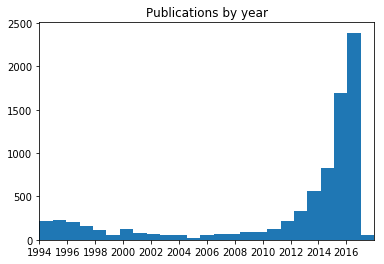

In [37]:
a=df["year"]
plt.hist(a, bins = 2018 - 1994 + 1)
plt.xlim([1994,2018])
plt.xticks(np.arange(1994,2018,2))
plt.title("Publications by year")
plt.savefig("plots/PublicationsByYear")
plt.show()

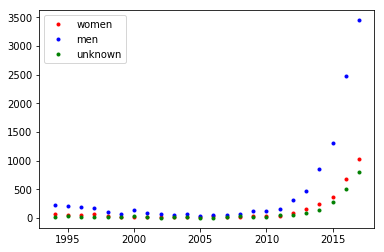

In [51]:
plt.figure()
yrs = []
x = []
y = []
z = []
year_range = [1994,2018]
for i in range(year_range[0],year_range[1]):
    year = df[df["year"] == i]
    yf=0
    ym=0
    yu=0
    auths = set()
    for aths in year["authors"].values:
        split_auths = aths.split("; ")
        auths.update(split_auths)
    for a in auths:
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x.append(yf)
    y.append(ym)
    z.append(yu)
    plt.plot(i,yf, '.r', label="women")
    plt.plot(i,ym, '.b', label="men")
    plt.plot(i,yu, '.g', label="unknown")
plt.legend()
plt.show()

In [47]:
year["authors"].values

array(['Schabes, Yves; Shieber, Stuart M.', 'Shieber, Stuart M.',
       'Shieber, Stuart M.', 'Covington, Michael A.', 'Johnson, Mark',
       'CHANDLER-BURNS, R. M.', 'Bouma, Gosse; van Noord, Gertjan',
       'Shieber, Stuart M.; Schabes, Yves; Pereira, Fernando C. N.',
       'Dalrymple, Mary; Lamping, John; Pereira, Fernando; Saraswat, Vijay',
       'Dalrymple, Mary; Lamping, John; Pereira, Fernando; Saraswat, Vijay',
       'van Noord, Gertjan; Bouma, Gosse',
       'Dagan, Ido; Pereira, Fernando; Lee, Lillian', 'Kehler, Andrew',
       'Hirschberg, Julia', 'Koenig, Esther',
       'Magerman, David M.; Marcus, Mitchell P.',
       'Magerman, David M.; Weir, Carl',
       'Black, Ezra; Jelinek, Fred; Lafferty, John; Magerman, David M.; Mercer, Robert; Roukos, Salim',
       'Sproat, Richard; Shih, Chilin; Gale, William; Chang, Nancy',
       'Magerman, David M.', 'Kehler, Andrew',
       'Chu-Carroll, Jennifer; Carberry, Sandra', 'Hong, Tao',
       'Edmonds, Philip G.', 'Litman,